In [3]:
!pip install finance-datareader

In [4]:
import numpy as np 
import pandas as pd 
import os
import FinanceDataReader as fdr
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler




import warnings
warnings.filterwarnings(action='ignore')

In [5]:
stock_name = ['KOSPI200','SNP500','NASDAQ','KOSDAQ','US_Tech_100','HANGSENG']
stock_code = ['KS200','US500','IXIC','KQ11','USTECH','HSI']

In [6]:
for i in range(len(stock_code)):
    start_date = '2010-01-01'
    end_date = '2021-10-31'
    stock_name[i] = fdr.DataReader(stock_code[i],start=start_date,end=end_date)[['Close','Open','High','Low','Volume','Change']]
    

In [7]:
KOSPI200 = stock_name[0]
SNP500 = stock_name[1]
NASDAQ = stock_name[2]
KOSDAQ = stock_name[3]
USTECH100 = stock_name[4]
HANGSENG = stock_name[5]

In [8]:
# print('KOSPI200\n',KOSPI200)
print('S&P500\n',SNP500)
print('NASDAQ\n',NASDAQ)
print('KOSDAQ\n',KOSDAQ)
print('USTECH100\n',USTECH100)
print('HANGSENG',HANGSENG)

S&P500
               Close     Open     High      Low  Volume  Change
Date                                                          
2010-01-04  1132.99  1116.56  1133.87  1116.56     0.0  0.0160
2010-01-05  1136.52  1132.66  1136.63  1129.66     0.0  0.0031
2010-01-06  1137.14  1135.71  1139.19  1133.95     0.0  0.0005
2010-01-07  1141.69  1136.27  1142.46  1131.32     0.0  0.0040
2010-01-08  1144.98  1140.52  1145.39  1136.22     0.0  0.0029
...             ...      ...      ...      ...     ...     ...
2021-10-25  4566.48  4553.69  4572.62  4537.36     0.0  0.0047
2021-10-26  4574.79  4578.69  4598.53  4569.17     0.0  0.0018
2021-10-27  4551.68  4580.22  4584.57  4551.66     0.0 -0.0051
2021-10-28  4596.42  4562.84  4597.55  4562.84     0.0  0.0098
2021-10-29  4605.38  4572.87  4608.08  4567.59     0.0  0.0019

[2978 rows x 6 columns]
NASDAQ
               Close     Open     High      Low        Volume  Change
Date                                                                
20

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
KOSPI200.hist(bins=50, figsize=(15,10))
plt.savefig("attribute_histogram_plots")
plt.show()

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

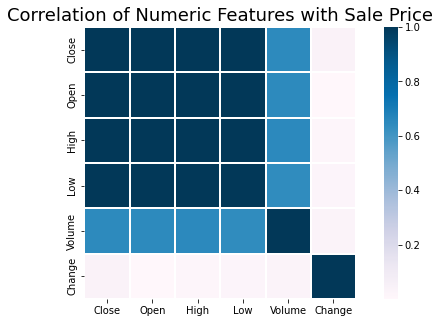

In [10]:
corr_data = KOSPI200[['Close', 'Open', 'High', 'Low', 'Volume', 'Change']]
colormap = plt.cm.PuBu  
f , ax = plt.subplots(figsize = (10,5)) 
plt.title('Correlation of Numeric Features with Close Indices',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.2,
            cmap = colormap, linecolor = "white", vmax=1)

Index(['Close', 'Low', 'High', 'Open', 'Volume', 'Change'], dtype='object')


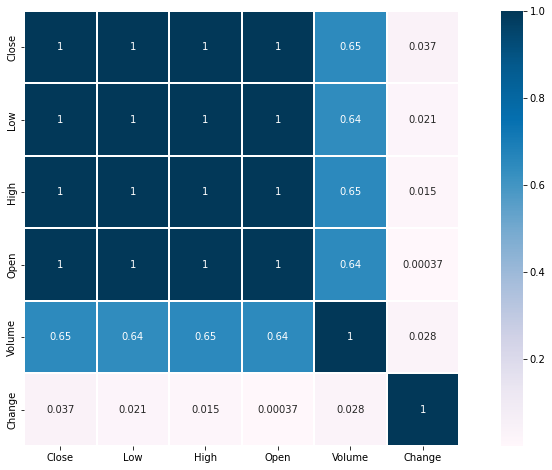

In [11]:
cols = corr_data.corr().nlargest(6,'Close')['Close'].index 
print(cols) 
cm = np.corrcoef(KOSPI200[cols].values.T) 
f , ax = plt.subplots(figsize = (15,8)) 
heatmap = sns.heatmap(cm, vmax=1, linewidths=0.1,square=True,annot=True,cmap=colormap, linecolor="white",xticklabels = cols.values ,yticklabels = cols.values)
plt.savefig('heatmap.png')

In [12]:
KOSPI200.keys()

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

In [13]:
def MA(data):
    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['MA60'] = data['Close'].rolling(window=60).mean()
    data['MA120'] = data['Close'].rolling(window=120).mean()
    data['VMA5'] = data['Volume'].rolling(window=5).mean()
    data['VMA10'] = data['Volume'].rolling(window=10).mean()
    data['VMA20'] = data['Volume'].rolling(window=20).mean()
    data['VMA60'] = data['Volume'].rolling(window=60).mean()
    data['VMA120'] = data['Volume'].rolling(window=120).mean()
    data['std'] = data['Close'].rolling(window=20).std()
    data['20_Upper'] = data['MA20'] + 2 * data['std']
    data['20_Lower'] = data['MA20'] - 2 * data['std']
    data.drop('std',axis=1,inplace=True)
    data.dropna(inplace=True)
    data['Close_MA5'] = data['Close'] / data['MA5']
    data['Close_MA10'] = data['Close'] / data['MA10']
    data['Close_MA20'] = data['Close'] / data['MA20']
    data['Close_MA60'] = data['Close'] / data['MA60']
    data['Close_MA120'] = data['Close'] / data['MA120']
    data['Volume_MA5'] = data['Volume'] / data['VMA5']
    data['Volume_MA10'] = data['Volume'] / data['VMA10']
    data['Volume_MA20'] = data['Volume'] / data['VMA20']
    data['Volume_MA60'] = data['Volume'] / data['VMA60']
    data['Volume_MA120'] = data['Volume'] / data['VMA120']
    return data

In [91]:
KOSPI200 = MA(KOSPI200)
SNP500 = MA(SNP500)
KOSDAQ = MA(KOSDAQ)
USTECH100 = MA(USTECH100)
HANGSENG = MA(HANGSENG[::-1])
NASDAQ = MA(NASDAQ)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

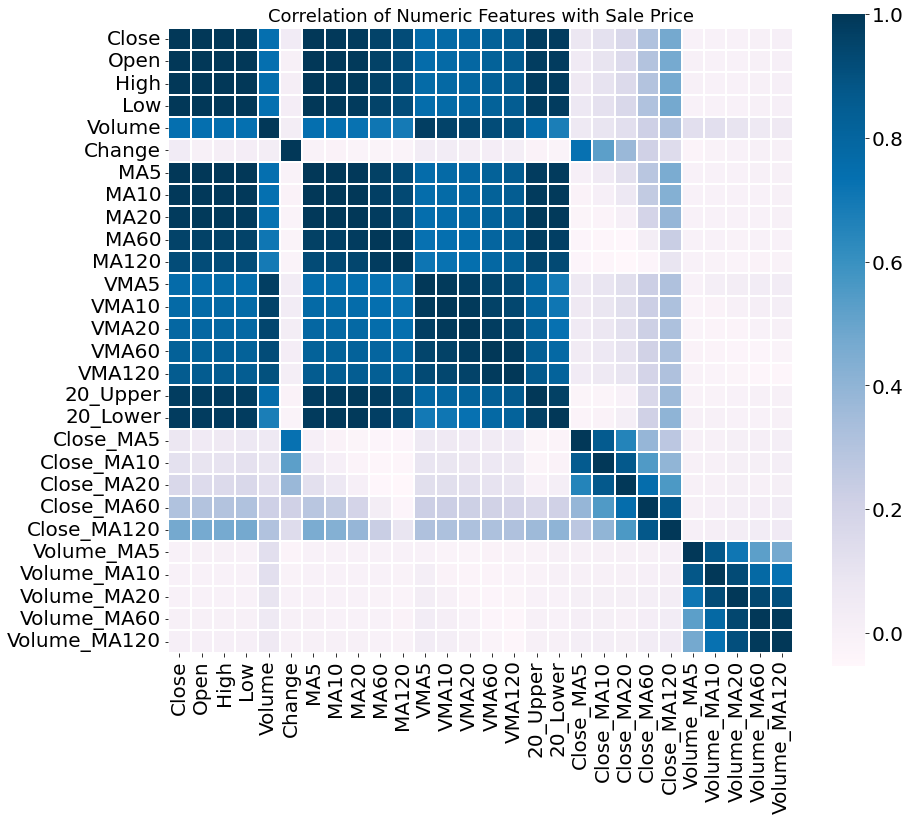

In [92]:
corr_data = KOSPI200[['Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'MA5', 'MA10',
       'MA20', 'MA60', 'MA120', 'VMA5', 'VMA10', 'VMA20', 'VMA60', 'VMA120',
       '20_Upper', '20_Lower', 'Close_MA5', 'Close_MA10', 'Close_MA20',
       'Close_MA60', 'Close_MA120', 'Volume_MA5', 'Volume_MA10', 'Volume_MA20',
       'Volume_MA60', 'Volume_MA120']]
colormap = plt.cm.PuBu  
f , ax = plt.subplots(figsize = (14,12)) 
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.2,
            cmap = colormap, linecolor = "white", vmax=1)

Index(['Close', 'Low', 'High', 'Open', 'MA5', 'MA10', 'MA20', '20_Lower',
       '20_Upper', 'MA60', 'MA120', 'VMA120', 'VMA60', 'VMA20', 'VMA10',
       'VMA5', 'Volume', 'Close_MA120', 'Close_MA60', 'Close_MA20',
       'Close_MA10', 'Close_MA5', 'Change', 'Volume_MA120', 'Volume_MA60',
       'Volume_MA5', 'Volume_MA10'],
      dtype='object')


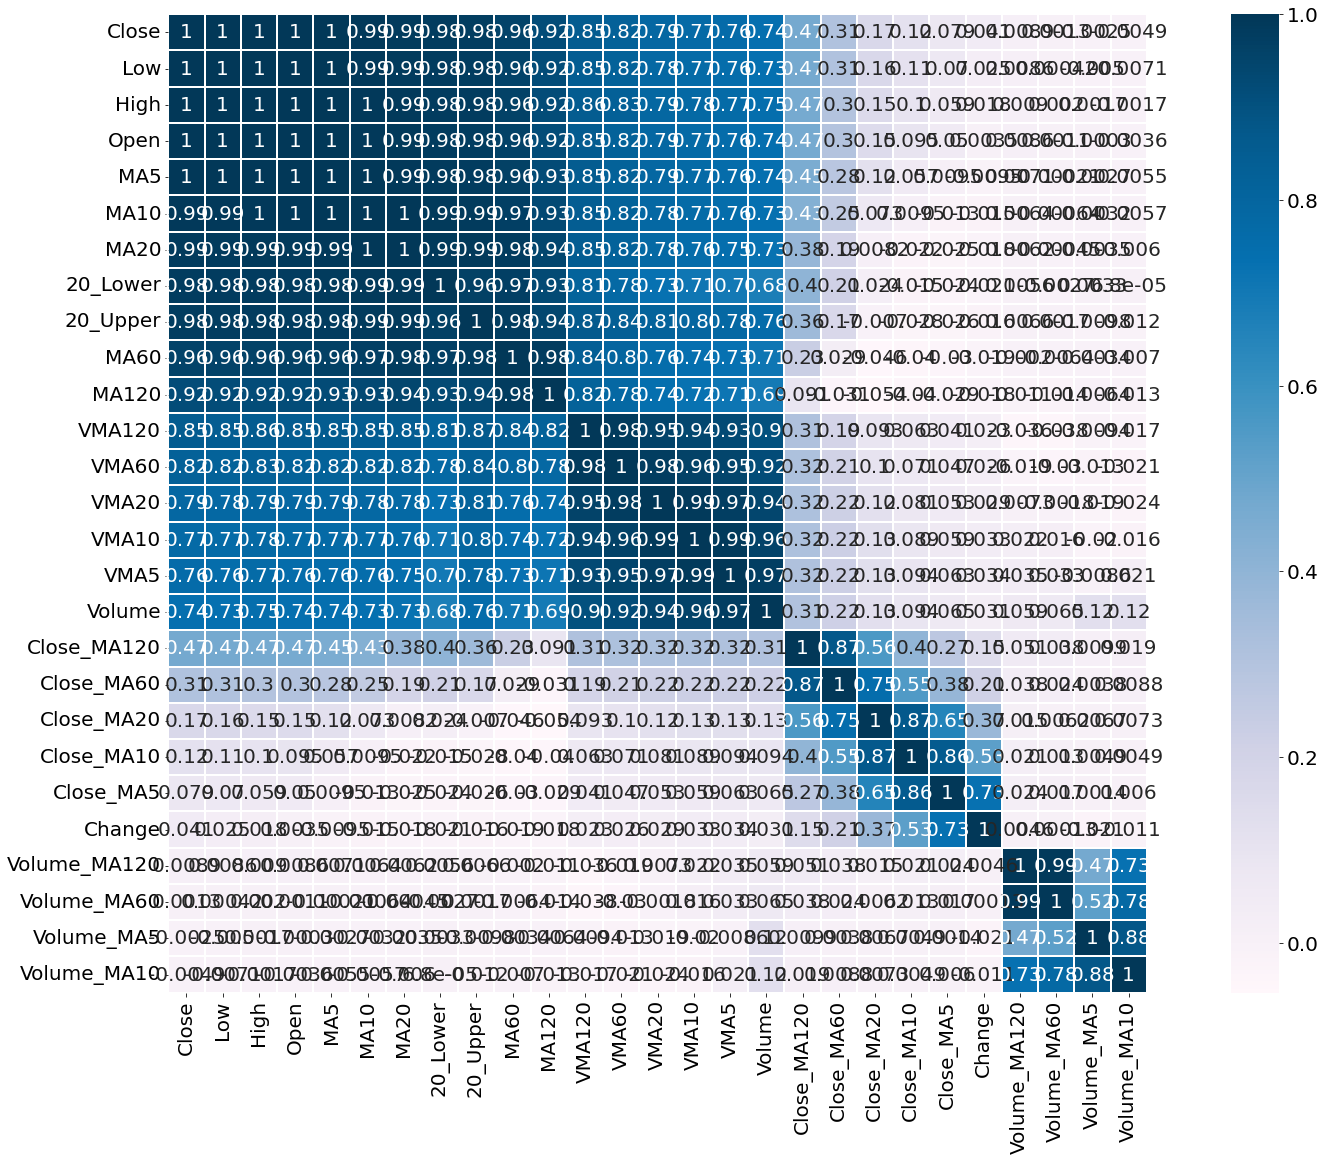

In [93]:
cols = corr_data.corr().nlargest(27,'Close')['Close'].index 
print(cols) 
cm = np.corrcoef(KOSPI200[cols].values.T) 
f , ax = plt.subplots(figsize = (30,18)) 
heatmap = sns.heatmap(cm, vmax=1, linewidths=0.1,square=True,annot=True,cmap=colormap, linecolor="white",xticklabels = cols.values ,yticklabels = cols.values)
plt.savefig('heatmap.png')

In [17]:
KOSPI200.isna().sum()

Close           0
Open            0
High            0
Low             0
Volume          0
Change          0
MA5             0
MA10            0
MA20            0
MA60            0
MA120           0
VMA5            0
VMA10           0
VMA20           0
VMA60           0
VMA120          0
20_Upper        0
20_Lower        0
Close_MA5       0
Close_MA10      0
Close_MA20      0
Close_MA60      0
Close_MA120     0
Volume_MA5      0
Volume_MA10     0
Volume_MA20     0
Volume_MA60     0
Volume_MA120    0
dtype: int64

In [18]:
def plot_MA(data):
    %matplotlib inline
    plt.figure(figsize=(30,10))
    plt.rc('font',size=20)
    plt.plot(data['Close'],label='Close')
    plt.plot(data['MA5'],label='MA5',)
    plt.plot(data['MA10'],label='MA10')
    plt.plot(data['MA20'],label='MA20')
    plt.plot(data['MA60'],label='MA60')
    plt.plot(data['MA120'],label='MA120')
    plt.xlabel('Year')
    plt.ylabel('Indics')
    plt.legend(fontsize=30)
    plt.grid(True)
    return plt.show()
    

In [19]:
def plot_VMA(data):
    %matplotlib inline
    plt.figure(figsize=(30,10))
    plt.rc('font',size=20)
    plt.plot(data['Volume'],label='Volume')
    plt.plot(data['VMA5'],label='VMA5',)
    plt.plot(data['VMA10'],label='VMA10')
    plt.plot(data['VMA20'],label='VMA20')
    plt.plot(data['VMA60'],label='VMA60')
    plt.plot(data['VMA120'],label='VMA120')
    plt.ylabel('Volume')
    plt.xlabel('year')
    plt.legend(fontsize=30)
    plt.grid(True)
    return plt.show()
    

In [20]:
def bol_plot(data):
    plt.figure(figsize=(30,10))
    plt.rc('font',size=20)
    plt.plot(data['Close'],color='black',label='Close_price')
    plt.plot(data['20_Upper'],ls='--',color='red',label='Uper Band')
    plt.plot(data['20_Lower'],ls='--',color='blue',label='Lower Band')
    plt.xlabel('Date')
    plt.ylabel('Indics')
    plt.legend()
    plt.grid(True)
    return plt.show()

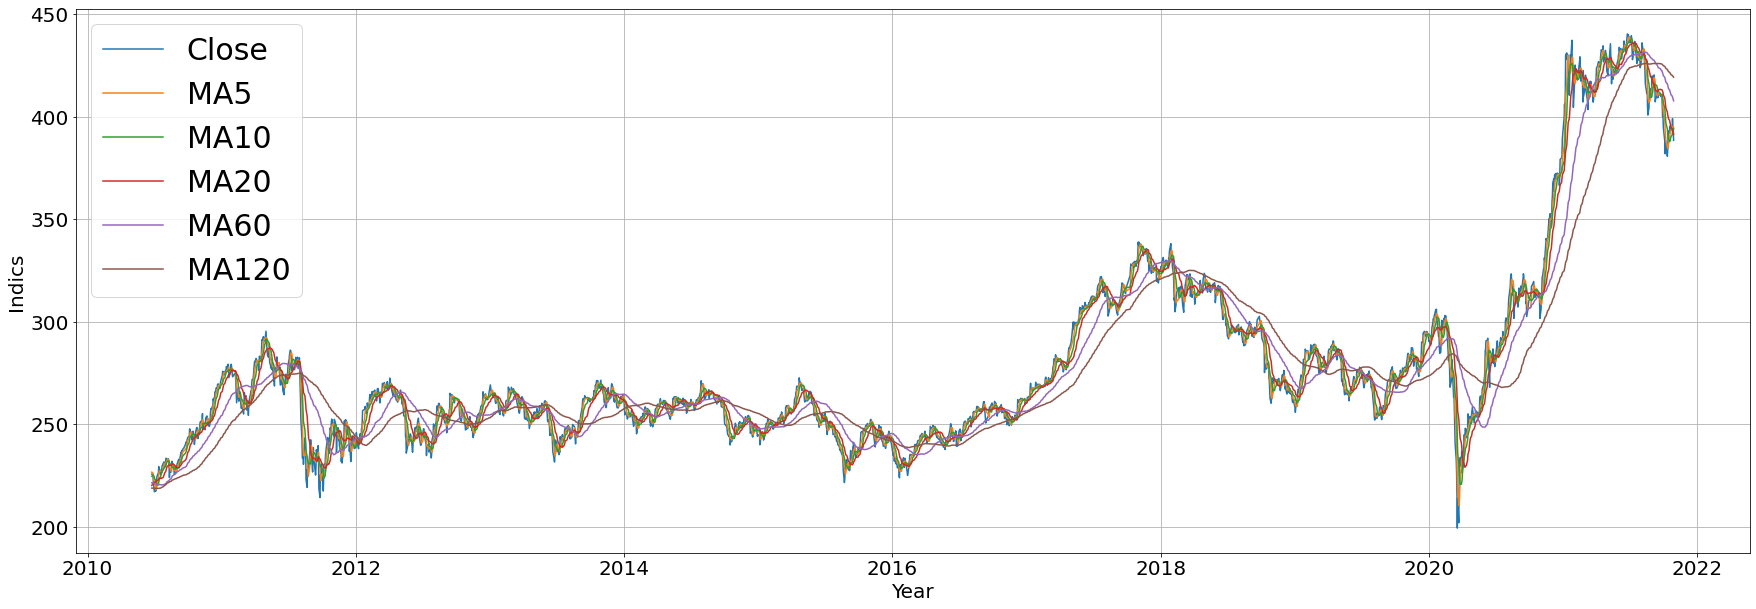

In [21]:
KOSPI200_img = plot_MA(KOSPI200)

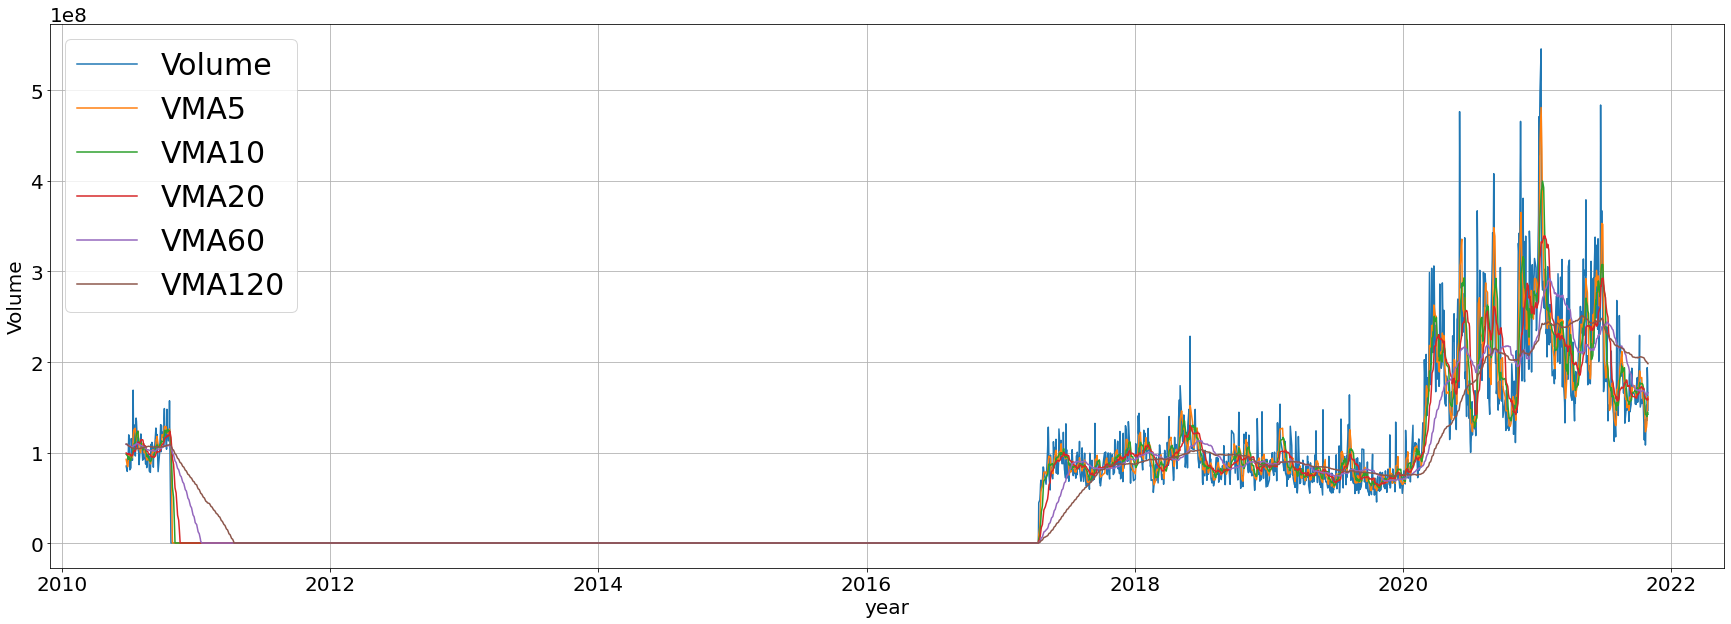

In [22]:
KOSPI200_img = plot_VMA(KOSPI200)

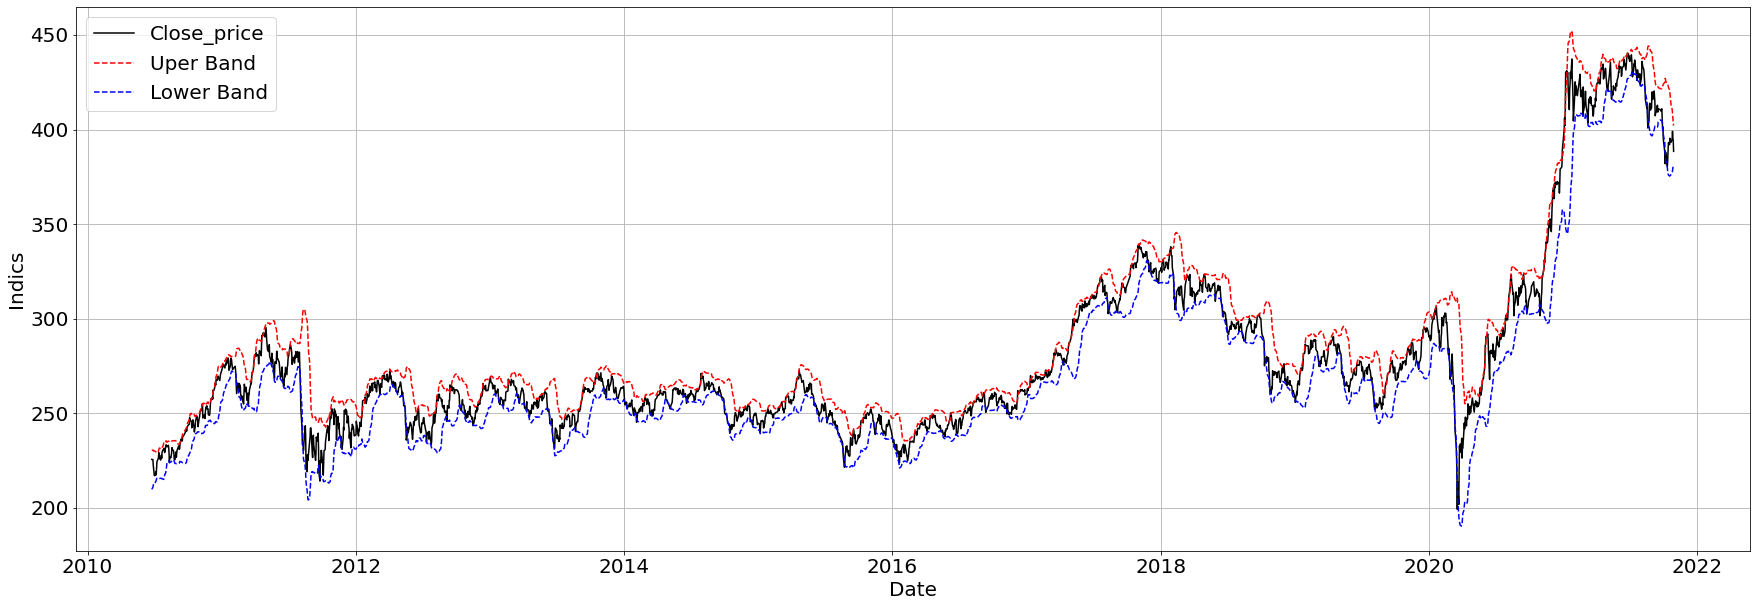

In [23]:
bol_plot(KOSPI200)

# ML Dataset 

In [24]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [113]:
def ML_data_preprocessing(data):
    data.drop(['Volume_MA5','Volume_MA10','Volume_MA20','Volume_MA60','Volume_MA120'],axis=1,inplace=True)
    ML_dataname_train, ML_dataname_test = data[:-10],data[-10:]
    ML_dataname_train = ML_dataname_train.reset_index(drop=True)
    ML_dataname_train_target = ML_dataname_train['Close'] 
    ML_dataname_train = ML_dataname_train.drop('Close',axis=1)
    ML_dataname_test = ML_dataname_test.reset_index(drop=True)
    ML_dataname_test_target = ML_dataname_test['Close']
    ML_dataname_test = ML_dataname_test.drop('Close',axis=1)
    return ML_dataname_train, ML_dataname_train_target,ML_dataname_test, ML_dataname_test_target
    

In [114]:
ML_KOSPI200_train,ML_KOSPI200_target,ML_KOSPI200_test,ML_KOSPI200_test_target = ML_data_preprocessing(KOSPI200)
ML_SNP500_train,ML_SNP500_target,ML_SNP500_test,ML_SNP500_test_target = ML_data_preprocessing(SNP500)
ML_NASDAQ_train,ML_NASDAQ_target,ML_NASDAQ_test,ML_NASDAQ_test_target = ML_data_preprocessing(NASDAQ)
ML_KOSDAQ_train,ML_KOSDAQ_target,ML_KOSDAQ_test,ML_KOSDAQ_test_target = ML_data_preprocessing(KOSDAQ)
ML_USTECH100_train,ML_USTECH100_target,ML_USTECH100_test,ML_USTECH100_test_target = ML_data_preprocessing(USTECH100)
ML_HANGSENG_train,ML_HANGSENG_target,ML_HANGSENG_test,ML_HANGSENG_test_target = ML_data_preprocessing(HANGSENG)

In [ ]:
print(ML_KOSPI200_train.shape)

In [86]:
ML_HANGSENG_train.isna().sum()

Open           0
High           0
Low            0
Volume         0
Change         0
MA5            0
MA10           0
MA20           0
MA60           0
MA120          0
VMA5           0
VMA10          0
VMA20          0
VMA60          0
VMA120         0
20_Upper       0
20_Lower       0
Close_MA5      0
Close_MA10     0
Close_MA20     0
Close_MA60     0
Close_MA120    0
dtype: int64

# ML models

In [28]:
def LGB_Model(x_train,y_train,x_test):
    LGB_models = []
    LGB_result = []
    fold = 1
    kf = KFold(n_splits=5)
    for train_idx,valid_idx in kf.split(x_train,y_train):
        train_x = x_train.values[train_idx]
        train_y = y_train.values[train_idx]
        val_x = x_train.values[valid_idx]
        val_y = y_train.values[valid_idx]
        print(f"------------{fold}----------")
        lgb_model = LGBMRegressor(objective='regression',
                             max_depth=300,
                             n_estimators=8000,
                             learning_rate=0.005,
                             num_leaves=31)
        lgb_model.fit(train_x,train_y,
                 eval_set=[(val_x,val_y)],
                 eval_metric=['rmse'],
                 early_stopping_rounds=500,
                 verbose=500
                 )
        LGB_models.append(lgb_model)
        fold += 1
    for model in LGB_models:
        pred = model.predict(x_test.values)
        LGB_result.append(pred)
    LGB_pred = (LGB_result[0]+LGB_result[1]+LGB_result[2]+LGB_result[3])/4
    return LGB_pred

In [29]:
print('-------KOSPI200----------')
LGB_KOSPI200_pred = LGB_Model(ML_KOSPI200_train,ML_KOSPI200_target,ML_KOSPI200_test)
print('-------S&P500------------')
LGB_SNP_500_pred = LGB_Model(ML_SNP500_train,ML_SNP500_target,ML_SNP500_test)
print('-------KOSDAQ------------')
LGB_KOSDAQ_pred = LGB_Model(ML_KOSDAQ_train,ML_KOSDAQ_target,ML_KOSDAQ_test)
print('----------NASDAQ----------')
LGB_NASDAQ_pred = LGB_Model(ML_NASDAQ_train,ML_NASDAQ_target,ML_NASDAQ_test)
print('----------USTECH100----------')
LGB_USTECH100_pred = LGB_Model(ML_USTECH100_train,ML_USTECH100_target,ML_USTECH100_test)
print('----------HANGSENG----------')
LGB_HANGSENG_pred = LGB_Model(ML_HANGSENG_train,ML_HANGSENG_target,ML_HANGSENG_test)
print('END Training...')

-------KOSPI200----------
------------1----------
Training until validation scores don't improve for 500 rounds
[500]	valid_0's rmse: 3.16445	valid_0's l2: 10.0138
[1000]	valid_0's rmse: 1.49876	valid_0's l2: 2.24628
[1500]	valid_0's rmse: 1.46387	valid_0's l2: 2.14292
[2000]	valid_0's rmse: 1.47983	valid_0's l2: 2.1899
Early stopping, best iteration is:
[1539]	valid_0's rmse: 1.46301	valid_0's l2: 2.14041
------------2----------
Training until validation scores don't improve for 500 rounds
[500]	valid_0's rmse: 2.57689	valid_0's l2: 6.64039
[1000]	valid_0's rmse: 0.723219	valid_0's l2: 0.523046
[1500]	valid_0's rmse: 0.660438	valid_0's l2: 0.436178
[2000]	valid_0's rmse: 0.654719	valid_0's l2: 0.428657
[2500]	valid_0's rmse: 0.651918	valid_0's l2: 0.424997
[3000]	valid_0's rmse: 0.649178	valid_0's l2: 0.421432
[3500]	valid_0's rmse: 0.644216	valid_0's l2: 0.415015
[4000]	valid_0's rmse: 0.642717	valid_0's l2: 0.413086
[4500]	valid_0's rmse: 0.641036	valid_0's l2: 0.410928
[5000]	valid

In [30]:
def RF_model(x_train,y_train,x_test):
    rf_models = []
    rf_result = []
    kf = KFold(n_splits=5) #KFold validation 
    fold = 1
    for train_idx,valid_idx in kf.split(x_train,y_train):
        train_x = x_train.values[train_idx] # 각fold 다른 데이터 셋들을 
        train_y = y_train.values[train_idx] #train과 valid로 나눠서
        val_x = x_train.values[valid_idx]  # 훈련시키게 shuffle
        val_y = y_train.values[valid_idx]
        print(f"--------------------fold:{fold}--------------------")
        rf_model = RandomForestRegressor(n_estimators=300,#트리개수
                                         random_state=0) #random state로 시드 고정
        rf_model.fit(train_x,train_y)  #model train
        prediction = rf_model.predict(val_x) #model valid
        score = np.sqrt(mean_squared_error(prediction,val_y)) #RMSE 
        print(f"RMSE:{score}")  
        rf_models.append(rf_model) #save model
        fold += 1
    for model in rf_models:
        pred = model.predict(x_test.values)
        rf_result.append(pred)
    rf_pred = (rf_result[0]+rf_result[1]+rf_result[2]+rf_result[3])/4
    return rf_pred

In [31]:
print('------KOSPI200---------')
rf_KOSPI200_pred = RF_model(ML_KOSPI200_train,ML_KOSPI200_target,ML_KOSPI200_test)
print('-------S&P500----------')
rf_SNP500_pred = RF_model(ML_SNP500_train,ML_SNP500_target,ML_SNP500_test)
print('-------KOSDAQ----------')
rf_KOSDAQ_pred = RF_model(ML_KOSDAQ_train,ML_KOSDAQ_target,ML_KOSDAQ_test)
print('-------NASDAQ----------')
rf_NASDAQ_pred = RF_model(ML_NASDAQ_train,ML_NASDAQ_target,ML_NASDAQ_test)
print('-------USTECH100----------')
rf_USTECH100_pred = RF_model(ML_USTECH100_train,ML_USTECH100_target,ML_USTECH100_test)
print('-------HANGSENG----------')
rf_HANGSENG_pred = RF_model(ML_HANGSENG_train,ML_HANGSENG_target,ML_HANGSENG_test)

------KOSPI200---------
--------------------fold:1--------------------
RMSE:1.2896138024348454
--------------------fold:2--------------------
RMSE:0.6678172645396494
--------------------fold:3--------------------
RMSE:0.7035830564247176
--------------------fold:4--------------------
RMSE:6.715503744014026
--------------------fold:5--------------------
RMSE:50.73346495561023
-------S&P500----------
--------------------fold:1--------------------
RMSE:163.23934216933384
--------------------fold:2--------------------
RMSE:66.08747004165558
--------------------fold:3--------------------
RMSE:34.44651431086368
--------------------fold:4--------------------
RMSE:57.97849453133901
--------------------fold:5--------------------
RMSE:743.5968068060888
-------KOSDAQ----------
--------------------fold:1--------------------
RMSE:8.52159873211712
--------------------fold:2--------------------
RMSE:3.185152743735239
--------------------fold:3--------------------
RMSE:3.6823164280947864
--------------

In [32]:
def Make_final_pred(pred_1,pred_2):
    final_pred = (pred_1 + pred_2) /2
    return final_pred

In [33]:
KOSPI200_final_pred = Make_final_pred(LGB_KOSPI200_pred,rf_KOSPI200_pred)
SNP500_final_pred = Make_final_pred(LGB_SNP_500_pred,rf_SNP500_pred)
KOSDAQ_final_pred = Make_final_pred(LGB_KOSDAQ_pred,rf_KOSDAQ_pred)
NASDAQ_final_pred = Make_final_pred(LGB_NASDAQ_pred,rf_NASDAQ_pred)
USTECH100_final_pred = Make_final_pred(LGB_USTECH100_pred,rf_USTECH100_pred)
HANGSENG_final_pred = Make_final_pred(LGB_HANGSENG_pred,rf_HANGSENG_pred)

# Compare to real_Indices

In [34]:
for i in range(len(stock_code)):
    start_date = '2021-11-01'
    end_date = '2021-11-12'
    stock_name[i] = fdr.DataReader(stock_code[i],start=start_date,end=end_date)[['Close']]


In [35]:
real_KOSPI200 = stock_name[0]
real_SNP500 = stock_name[1]
real_NASDAQ = stock_name[2]
real_KOSDAQ = stock_name[3]
real_USTECH100 = stock_name[4]
real_HANGSENG = stock_name[5]

In [36]:
def make_datetime(pred):
    pred_start = pd.to_datetime('2021-11-01')
    pred_end = pd.to_datetime('2021-11-12')
    name_pred = pd.DataFrame()
    name_pred.index = pd.date_range(pred_start,pred_end,freq='B')
    name_pred['pred_Close_Indices'] = pred
    return name_pred

In [51]:
ML_KOSPI200_pred = make_datetime(KOSPI200_final_pred)
ML_SNP500_pred = make_datetime(SNP500_final_pred)
ML_KOSDAQ_pred = make_datetime(KOSDAQ_final_pred)
ML_NASDAQ_pred = make_datetime(NASDAQ_final_pred)
ML_USTECH100_pred = make_datetime(USTECH100_final_pred)
ML_HANGSENG_pred = make_datetime(HANGSENG_final_pred)

In [62]:
def plot_result(label,pred,real):
    plt.figure(figsize=(13,10))
    plt.rc('font',size=20)
    plt.title(label)
    plt.plot(pred,ls='-.',label='prediction_Indices',color='black')
    plt.plot(real,label='real_Indices',color='red')
    plt.legend(loc='upper right')
    plt.show()

In [41]:
real_KOSPI200

,Close
Date,
2021-11-01,389.81
2021-11-02,394.82
2021-11-03,389.48
2021-11-04,391.54
2021-11-05,389.86
2021-11-08,389.59
2021-11-09,390.36
2021-11-10,386.24
2021-11-11,385.97


In [42]:
ML_KOSPI200_pred

,pred_Close_Indices
2021-11-01,392.289127
2021-11-02,393.403443
2021-11-03,394.281485
2021-11-04,392.577382
2021-11-05,392.532532
2021-11-08,392.742000
2021-11-09,396.198651
2021-11-10,394.273532
2021-11-11,393.904817
2021-11-12,392.608568


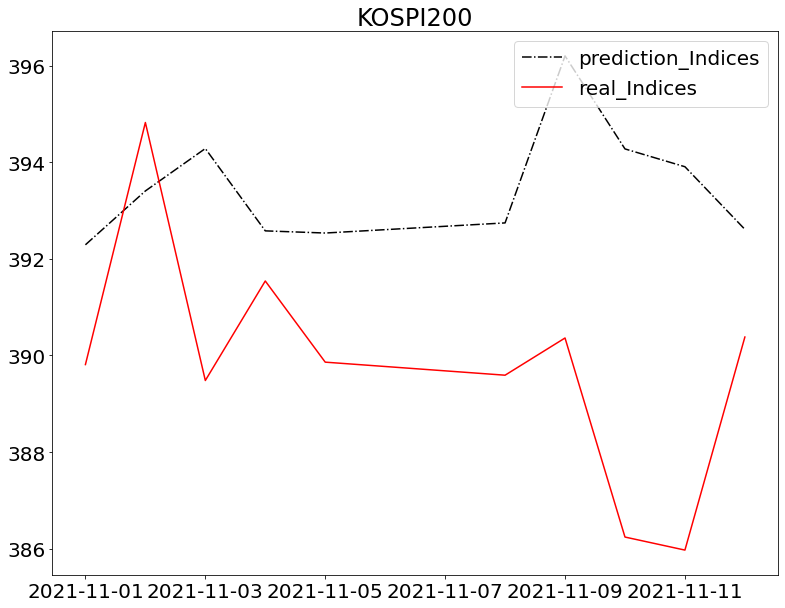

In [63]:
plot_result('KOSPI200',ML_KOSPI200_pred,real_KOSPI200)

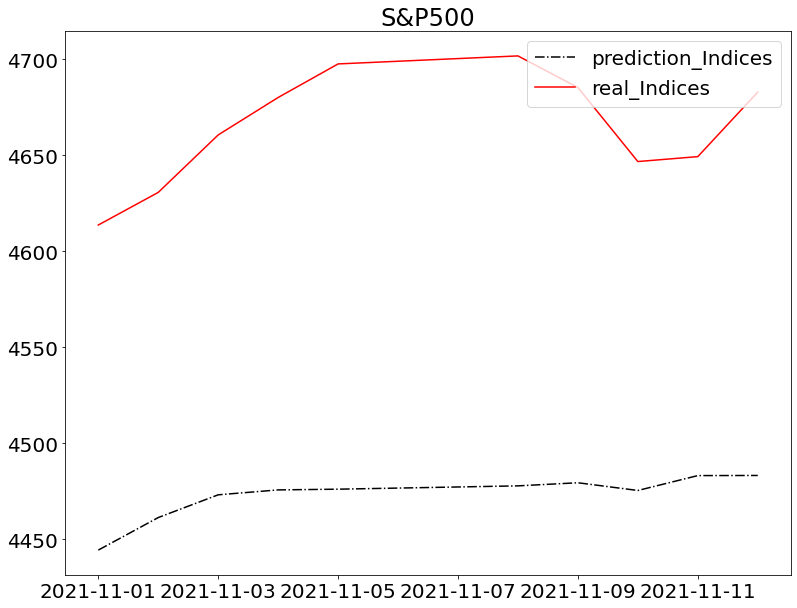

In [64]:
plot_result('S&P500',ML_SNP500_pred,real_SNP500)

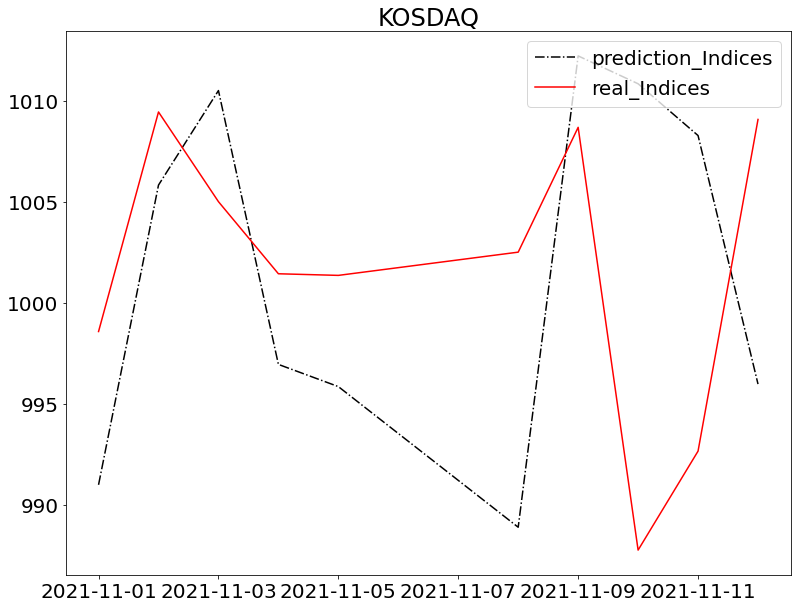

In [65]:
plot_result('KOSDAQ',ML_KOSDAQ_pred,real_KOSDAQ)

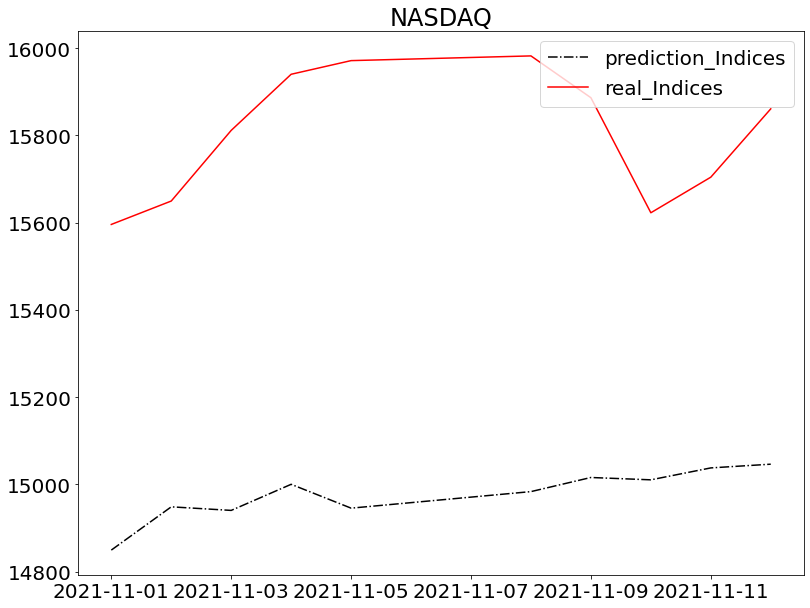

In [66]:
plot_result('NASDAQ',ML_NASDAQ_pred,real_NASDAQ)

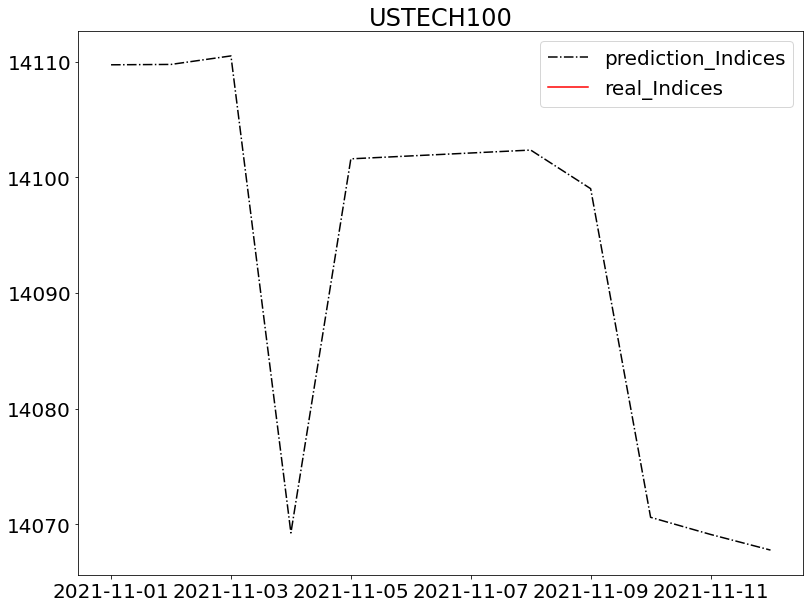

In [67]:
plot_result('USTECH100',ML_USTECH100_pred,real_USTECH100)

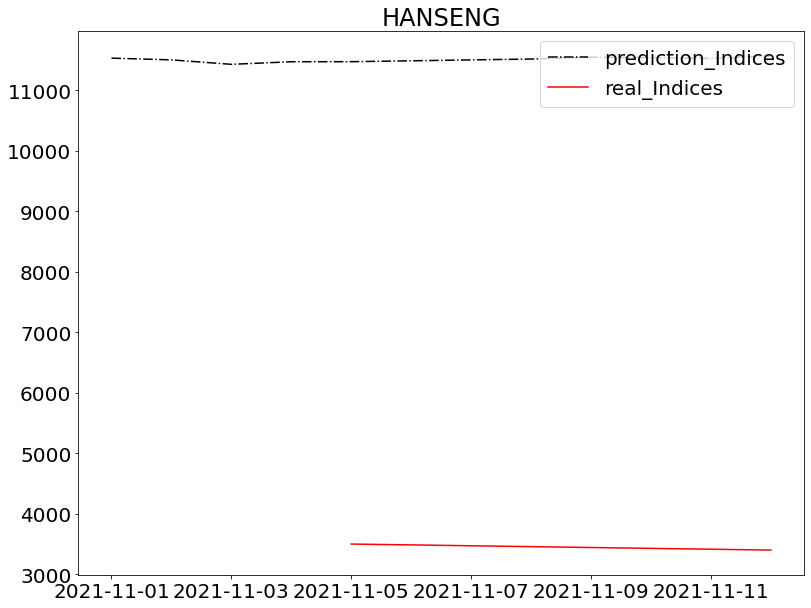

In [68]:
plot_result('HANSENG',ML_HANGSENG_pred,real_HANGSENG)

# Deep Learning Dataset

In [115]:
def deeplr_data(data):
    name_train, name_test = data[:-15], data[-15:]
    name_train = name_train.reset_index(drop=True)
    name_target = name_train['Close']
    name_train.drop('Close',axis=1,inplace=True)
    name_test.reset_index(drop=True)
    name_test_target = name_test['Close']
    name_test.drop('Close',axis=1,inplace=True)
    return name_train ,name_target, name_test, name_test_target
    
    

In [116]:
KOSPI200_train,KOSPI200_target,KOSPI200_test, KOSPI200_test_target = deeplr_data(KOSPI200)
SNP500_train, SNP500_target, SNP500_test, SNP500_test_target = deeplr_data(SNP500)
NASDAQ_train, NASDAQ_target, NASDAQ_test, NASDAQ_test_target = deeplr_data(NASDAQ)
KOSDAQ_train, KOSDAQ_target, KOSDAQ_test, KOSDAQ_test_target = deeplr_data(KOSDAQ)
USTECH100_train, USTECH100_target, USTECH100_test, USTECH100_test_target = deeplr_data(USTECH100)
HANGSENG_train, HANGSENG_target, HANGSENG_test, HANGSENG_test_target = deeplr_data(HANGSENG)

In [118]:
HANGSENG_train

,Open,High,Low,Volume,Change,MA5,MA10,MA20,MA60,MA120,...,VMA20,VMA60,VMA120,20_Upper,20_Lower,Close_MA5,Close_MA10,Close_MA20,Close_MA60,Close_MA120
0,1000,1000,1000,2100.0,0.1111,960.0,950.0,1215.00,1706.666667,2401.666667,...,18779.0,28898.500000,64029.666667,1926.632667,503.367333,1.041667,1.052632,0.823045,0.585938,0.416378
1,900,900,900,300.0,0.0000,940.0,950.0,1175.00,1683.333333,2380.000000,...,15788.0,27840.166667,62723.833333,1861.332741,488.667259,0.957447,0.947368,0.765957,0.534653,0.378151
2,900,900,900,1300.0,0.0000,940.0,940.0,1135.00,1665.000000,2362.500000,...,14504.0,26398.500000,61671.250000,1784.777290,485.222710,0.957447,0.957447,0.792952,0.540541,0.380952
3,900,900,900,2100.0,-0.1000,940.0,940.0,1080.00,1648.333333,2346.666667,...,13846.5,26098.500000,61008.750000,1593.399403,566.600597,0.957447,0.957447,0.833333,0.546006,0.383523
4,900,1000,900,73200.0,0.1111,940.0,950.0,1040.00,1633.333333,2332.500000,...,16682.0,27122.666667,60785.000000,1426.073350,653.926650,1.063830,1.052632,0.961538,0.612245,0.428725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,11424,11424,11040,40640.0,-0.0201,10871.8,10603.4,10070.60,9679.616667,9102.650000,...,45574.5,46900.500000,38450.916667,11421.335223,8719.864777,1.029636,1.055699,1.111552,1.156451,1.229752
1643,11424,11500,11270,39730.0,0.0000,11009.8,10764.4,10166.45,9725.616667,9128.850000,...,46294.5,46837.166667,38542.166667,11617.156467,8715.743533,1.037621,1.061276,1.123696,1.174630,1.251417
1644,11654,11654,11347,33590.0,-0.0197,11086.6,10887.1,10246.95,9765.233333,9155.683333,...,47319.5,46683.833333,38709.833333,11790.985379,8702.914621,1.030433,1.049315,1.114868,1.169865,1.247750
1645,11577,11654,11500,39210.0,0.0000,11270.6,11017.5,10338.95,9806.133333,9184.433333,...,46177.0,47052.000000,38974.666667,11989.932416,8687.967584,1.034018,1.057772,1.127194,1.188440,1.268886


In [119]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [120]:
SNP500.keys()

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'MA5', 'MA10',
       'MA20', 'MA60', 'MA120', 'VMA5', 'VMA10', 'VMA20', 'VMA60', 'VMA120',
       '20_Upper', '20_Lower', 'Close_MA5', 'Close_MA10', 'Close_MA20',
       'Close_MA60', 'Close_MA120'],
      dtype='object')

In [121]:
feature = ['Open', 'High', 'Low', 'Volume', 'Change', 'MA5', 'MA10',
       'MA20', 'MA60', 'MA120', '20_Upper', '20_Lower', 'Close_MA5',
       'Close_MA10', 'Close_MA20', 'Close_MA60', 'Close_MA120']
label = ['Close']
KOSPI200_trainset , KOSPI200_target = make_dataset(KOSPI200_train,KOSPI200_target)
KOSPI200_testset, KOSPI200_test_target = make_dataset(KOSPI200_test,KOSPI200_test_target)

SNP500_trainset, SNP500_target = make_dataset(SNP500_train,SNP500_target)
SNP500_testset, SNP500_test_target = make_dataset(SNP500_test,SNP500_test_target)

KOSDAQ_trainset, KOSDAQ_target = make_dataset(KOSDAQ_train,KOSDAQ_target)
KOSDAQ_testset, KOSDAQ_test_target = make_dataset(KOSDAQ_test,KOSDAQ_test_target)

NASDAQ_trainset, NASDAQ_target = make_dataset(NASDAQ_train,NASDAQ_target)
NASDAQ_testset, NASDAQ_test_target = make_dataset(NASDAQ_test,NASDAQ_test_target)

USTECH100_trainset, USTECH100_target = make_dataset(USTECH100_train,USTECH100_target)
USTECH100_testset, USTECH100_test_target = make_dataset(USTECH100_test,USTECH100_test_target)

HANGSENG_trainset, HANGSENG_target = make_dataset(HANGSENG_train,HANGSENG_target)
HANGSENG_testset, HAnGSENG_test_target = make_dataset(HANGSENG_test,HANGSENG_test_target)



In [122]:
print(HANGSENG_trainset.shape,HANGSENG_target.shape)
print(HANGSENG_testset.shape)

(1642, 5, 22) (1642,)
(10, 5, 22)


In [123]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader,Dataset

In [124]:
class CustomDataset(Dataset):
    def __init__(self,data,label):
        self.data = data
        self.label = label
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        data = torch.tensor(self.data[idx],dtype=torch.float64)
        label = torch.tensor(self.label[idx],dtype=torch.int64)
        return data,label

In [125]:
KOSPI200_train_set = CustomDataset(KOSPI200_trainset,KOSPI200_target)
KOSPI200_test_set = CustomDataset(KOSPI200_testset,KOSPI200_test_target)

SNP500_train_set = CustomDataset(SNP500_trainset,SNP500_target)
SNP500_test_set = CustomDataset(SNP500_testset,SNP500_test_target)

KOSDAQ_train_set = CustomDataset(KOSDAQ_trainset,KOSDAQ_target)
KOSDAQ_test_set = CustomDataset(KOSDAQ_testset,KOSDAQ_test_target)

NASDAQ_train_set = CustomDataset(NASDAQ_trainset,NASDAQ_target)
NASDAQ_test_set = CustomDataset(NASDAQ_testset,NASDAQ_test_target)

USTECH100_train_set = CustomDataset(USTECH100_trainset,USTECH100_target)
USTECH100_test_set = CustomDataset(USTECH100_testset,USTECH100_test_target)

HANGSENG_train_set = CustomDataset(HANGSENG_trainset,HANGSENG_target)
HANGSENG_test_set = CustomDataset(HANGSENG_testset,HANGSENG_test_target)

# Deep Learning Model

In [126]:
import torch
import torch.nn as nn
from torch.utils.data.sampler import SubsetRandomSampler
import tensorflow
from tensorflow.keras.layers import LSTM,Dense,Dropout,Flatten,GRU,LeakyReLU,Conv2D,MaxPool1D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning import Trainer

In [79]:
class CNN2RNN(nn.Module):
    def __init__(self):
        super(CNN2RNN,self).__init__()
        self.conv1 = nn.Conv1d(5,32,3)
        self.bnn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32,64,3)
        self.bnn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(64,128,3)
        self.bnn3 = nn.BatchNorm1d(128)
        self.gru1 = nn.GRU(16,256,1)
        self.gru2 = nn.GRU(256,512,1)
        self.gru3 = nn.GRU(512,256,1)
        self.fc1 = nn.Linear(32768,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,256)
        self.fc4 = nn.Linear(256,1)
        self.flatten = nn.Flatten()
        self.gelu = nn.GELU()
        self.lrelu = nn.LeakyReLU(0.1)
        self.dropout = nn.Dropout(0.25)
        self.swish = nn.Hardswish()
    def forward(self,x):
        x = self.bnn1(self.swish(self.conv1(x)))
        x = self.bnn2(self.swish(self.conv2(x)))
        x = self.bnn3(self.swish(self.conv3(x)))
        x,_ = self.gru1(x)
        x = self.gelu(x)
        x,_ = self.gru2(x)
        x = self.gelu(x)
        x,_ = self.gru3(x)
        x = self.gelu(x)
        x = x.flatten(1)
        x = self.dropout(self.swish(self.fc1(x)))
        x = self.dropout(self.swish(self.fc2(x)))
        x = self.dropout(self.swish(self.fc3(x)))
        output = self.fc4(x)
        output = output.view(-1)
        return output
model = CNN2RNN()
model

CNN2RNN(
  (conv1): Conv1d(5, 32, kernel_size=(3,), stride=(1,))
  (bnn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (bnn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (bnn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (gru1): GRU(16, 256)
  (gru2): GRU(256, 512)
  (gru3): GRU(512, 256)
  (fc1): Linear(in_features=32768, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=1, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (gelu): GELU()
  (lrelu): LeakyReLU(negative_slope=0.1)
  (dropout): Dropout(p=0.25, inplace=False)
  (swish): Hardswish()
)

# Train Session

In [80]:
def train(model,loader,device,criterion,optimizer):
        model.train()
        train_loss = []
        tqdm_train = tqdm(loader)
        for data,label in tqdm_train:
            data,label = data.to(device).float(),label.to(device)
            optimizer.zero_grad()
            logits = model(data)
            label = label.to(torch.float32)
            
            loss = torch.sqrt(criterion(logits,label))
            loss.backward()
            optimizer.step()

            loss_np = loss.detach().cpu().numpy()
            train_loss.append(loss_np)
        train_loss = np.mean(train_loss)
    
        return train_loss

In [81]:
def validation(model,loader,device,criterion):
    model.eval()
    valid_loss = []
    tqdm_valid = tqdm(loader)
    with torch.no_grad():
        for data,label in tqdm_valid:
            
            data,label = data.to(device).float(),label.to(device)
                
            logits = model(data)
            loss = torch.sqrt(criterion(logits,label))
            loss_np = loss.detach().cpu().numpy()
            valid_loss.append(loss_np)
        valid_loss = np.mean(valid_loss)
    return valid_loss
        

In [129]:
def run(stock_name,model,data,lr,epochs):
    
    if torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'
    kf = KFold(n_splits=5,shuffle=True)
    for fold ,(train_idx,valid_idx) in enumerate(kf.split(data)):
        print(f'Fold:{fold+1}')
        train_sampler_kfold = SubsetRandomSampler(train_idx)
        valid_sampler_kfold = SubsetRandomSampler(valid_idx)
        train_loader = torch.utils.data.DataLoader(data,batch_size=64,
                                                   num_workers=0,sampler=train_sampler_kfold,drop_last=True)
        valid_loader = torch.utils.data.DataLoader(data,batch_size=64,
                                              num_workers=0,sampler=valid_sampler_kfold,drop_last=True)
        valid_loss_min = np.Inf
        name_train_loss = []
        name_valid_loss = []
        model = CNN2RNN()
        model.to(device)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adamax(model.parameters(),lr=lr)
        for e in range(epochs):
            train_loss = train(model,train_loader,device,criterion,optimizer)
            valid_loss = validation(model,valid_loader,device,criterion)
            
            name_train_loss.append(train_loss)
            name_valid_loss.append(valid_loss)
            
            print('Epoch:{}\t Training Loss:{:.3f}\t Validation Loss:{:3f}'.format(
                e+1,train_loss,valid_loss))
            if valid_loss < valid_loss_min:
                print('Validation Loss decreased:{:3f} --> {:3f} So saving the model'.format(
                    valid_loss_min,valid_loss))
                valid_loss_min = valid_loss
                torch.save(model,f'{stock_name}_CNN2GRU_{fold}.pt')
                patience = 0
            else:
                patience += 1
                print(f'count patience:{patience} of 10')
                if patience > 10:
                    print(f"Meet Early Stopper so End Training...\n And best Valid_MSE:{valid_loss_min}")
                    break
    return name_train_loss, name_valid_loss
    

In [137]:
print('-------------------KOSPI200---------------------')
KOSPI200_train_loss, KOSPI200_valid_loss = run('KOSPI200',CNN2RNN(),KOSPI200_train_set,lr=0.0003,epochs=100)
print('-------------------S&P500---------------------')
SNP500_train_loss, SNP500_valid_loss = run('SNP500',CNN2RNN(),SNP500_train_set,lr=0.0003,epochs=100)
print('-------------------KOSDAQ---------------------')
KOSDAQ_train_loss, KOSDAQ_valid_loss = run('KOSDAQ',CNN2RNN(),KOSDAQ_train_set,lr=0.0003,epochs=100)
print('-------------------NASDAQ---------------------')
NASDAQ_train_loss, NASDAQ_vaild_loss = run('NASDAQ',CNN2RNN(),NASDAQ_train_set,lr=0.0003,epochs=100)
print('-------------------USTECH100---------------------')
USTECH100_train_loss, USTECH100_valid_loss = run('USTECH100',CNN2RNN(),USTECH100_train_set,lr=0.0003,epochs=100)
print('-------------------HANGSENG---------------------')
HANGSENG_train_loss, HANGSENG_valid_loss = run('HANGSENG',CNN2RNN(),HANGSENG_train_set,lr=0.0003,epochs=100)

-------------------KOSPI200---------------------
Fold:1


100%|██████████| 8/8 [00:00<00:00, 79.80it/s]


Epoch:1	 Training Loss:214.166	 Validation Loss:86.991211
Validation Loss decreased:inf --> 86.991211 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.95it/s]


Epoch:2	 Training Loss:77.697	 Validation Loss:67.785812
Validation Loss decreased:86.991211 --> 67.785812 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.71it/s]


Epoch:3	 Training Loss:68.346	 Validation Loss:60.188465
Validation Loss decreased:67.785812 --> 60.188465 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.91it/s]


Epoch:4	 Training Loss:61.516	 Validation Loss:51.885117
Validation Loss decreased:60.188465 --> 51.885117 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.87it/s]


Epoch:5	 Training Loss:54.492	 Validation Loss:45.560501
Validation Loss decreased:51.885117 --> 45.560501 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.08it/s]


Epoch:6	 Training Loss:46.240	 Validation Loss:36.183319
Validation Loss decreased:45.560501 --> 36.183319 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.80it/s]


Epoch:7	 Training Loss:38.967	 Validation Loss:31.782743
Validation Loss decreased:36.183319 --> 31.782743 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.85it/s]


Epoch:8	 Training Loss:36.993	 Validation Loss:28.814249
Validation Loss decreased:31.782743 --> 28.814249 So saving the model


100%|██████████| 8/8 [00:00<00:00, 18.39it/s]


Epoch:9	 Training Loss:35.700	 Validation Loss:28.763062
Validation Loss decreased:28.814249 --> 28.763062 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.69it/s]


Epoch:10	 Training Loss:34.951	 Validation Loss:27.279488
Validation Loss decreased:28.763062 --> 27.279488 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.58it/s]


Epoch:11	 Training Loss:33.634	 Validation Loss:25.892586
Validation Loss decreased:27.279488 --> 25.892586 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.07it/s]


Epoch:12	 Training Loss:32.656	 Validation Loss:25.769367
Validation Loss decreased:25.892586 --> 25.769367 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.74it/s]


Epoch:13	 Training Loss:32.933	 Validation Loss:25.514641
Validation Loss decreased:25.769367 --> 25.514641 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.39it/s]


Epoch:14	 Training Loss:32.888	 Validation Loss:26.423813
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.01it/s]


Epoch:15	 Training Loss:31.929	 Validation Loss:25.091248
Validation Loss decreased:25.514641 --> 25.091248 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.48it/s]


Epoch:16	 Training Loss:31.295	 Validation Loss:22.357929
Validation Loss decreased:25.091248 --> 22.357929 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.41it/s]


Epoch:17	 Training Loss:31.234	 Validation Loss:22.245844
Validation Loss decreased:22.357929 --> 22.245844 So saving the model


100%|██████████| 8/8 [00:00<00:00, 70.60it/s]


Epoch:18	 Training Loss:31.686	 Validation Loss:24.123566
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.61it/s]


Epoch:19	 Training Loss:30.325	 Validation Loss:21.712433
Validation Loss decreased:22.245844 --> 21.712433 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.51it/s]


Epoch:20	 Training Loss:29.963	 Validation Loss:21.089542
Validation Loss decreased:21.712433 --> 21.089542 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.94it/s]


Epoch:21	 Training Loss:28.990	 Validation Loss:22.516453
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 72.31it/s]


Epoch:22	 Training Loss:30.238	 Validation Loss:21.079544
Validation Loss decreased:21.089542 --> 21.079544 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:23	 Training Loss:29.560	 Validation Loss:20.400394
Validation Loss decreased:21.079544 --> 20.400394 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.23it/s]


Epoch:24	 Training Loss:29.778	 Validation Loss:18.791546
Validation Loss decreased:20.400394 --> 18.791546 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.86it/s]


Epoch:25	 Training Loss:29.210	 Validation Loss:20.072098
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.20it/s]


Epoch:26	 Training Loss:28.890	 Validation Loss:18.877335
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.50it/s]


Epoch:27	 Training Loss:29.283	 Validation Loss:19.313469
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.90it/s]


Epoch:28	 Training Loss:28.575	 Validation Loss:20.397518
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.60it/s]


Epoch:29	 Training Loss:28.038	 Validation Loss:21.269184
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.64it/s]


Epoch:30	 Training Loss:28.936	 Validation Loss:18.809162
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 79.06it/s]


Epoch:31	 Training Loss:29.139	 Validation Loss:18.271156
Validation Loss decreased:18.791546 --> 18.271156 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:32	 Training Loss:28.712	 Validation Loss:22.222416
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:33	 Training Loss:28.421	 Validation Loss:19.287334
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.35it/s]


Epoch:34	 Training Loss:28.418	 Validation Loss:18.599545
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 76.03it/s]


Epoch:35	 Training Loss:29.158	 Validation Loss:18.300411
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.15it/s]


Epoch:36	 Training Loss:29.222	 Validation Loss:17.811441
Validation Loss decreased:18.271156 --> 17.811441 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.78it/s]


Epoch:37	 Training Loss:28.412	 Validation Loss:18.530596
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 75.14it/s]


Epoch:38	 Training Loss:27.757	 Validation Loss:18.211113
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.72it/s]


Epoch:39	 Training Loss:27.318	 Validation Loss:17.841164
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.49it/s]


Epoch:40	 Training Loss:26.894	 Validation Loss:17.730421
Validation Loss decreased:17.811441 --> 17.730421 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.87it/s]


Epoch:41	 Training Loss:26.993	 Validation Loss:19.465626
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 74.21it/s]


Epoch:42	 Training Loss:27.943	 Validation Loss:18.175213
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.34it/s]


Epoch:43	 Training Loss:28.076	 Validation Loss:18.098606
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 73.28it/s]


Epoch:44	 Training Loss:27.950	 Validation Loss:17.597935
Validation Loss decreased:17.730421 --> 17.597935 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.11it/s]


Epoch:45	 Training Loss:26.788	 Validation Loss:17.381763
Validation Loss decreased:17.597935 --> 17.381763 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.71it/s]


Epoch:46	 Training Loss:26.192	 Validation Loss:18.099010
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.82it/s]


Epoch:47	 Training Loss:26.728	 Validation Loss:22.436731
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.54it/s]


Epoch:48	 Training Loss:29.604	 Validation Loss:21.278057
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.70it/s]


Epoch:49	 Training Loss:27.686	 Validation Loss:17.151134
Validation Loss decreased:17.381763 --> 17.151134 So saving the model


100%|██████████| 8/8 [00:00<00:00, 71.64it/s]


Epoch:50	 Training Loss:26.107	 Validation Loss:17.969027
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.40it/s]


Epoch:51	 Training Loss:27.599	 Validation Loss:18.113123
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 76.87it/s]


Epoch:52	 Training Loss:26.834	 Validation Loss:20.919308
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.91it/s]


Epoch:53	 Training Loss:27.266	 Validation Loss:17.451538
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.62it/s]


Epoch:54	 Training Loss:28.596	 Validation Loss:18.639797
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:55	 Training Loss:26.401	 Validation Loss:16.955151
Validation Loss decreased:17.151134 --> 16.955151 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.58it/s]


Epoch:56	 Training Loss:27.197	 Validation Loss:17.351643
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 73.95it/s]


Epoch:57	 Training Loss:26.671	 Validation Loss:16.822693
Validation Loss decreased:16.955151 --> 16.822693 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.01it/s]


Epoch:58	 Training Loss:27.029	 Validation Loss:17.857666
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.66it/s]


Epoch:59	 Training Loss:25.804	 Validation Loss:17.434017
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.57it/s]


Epoch:60	 Training Loss:27.443	 Validation Loss:16.829350
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.24it/s]


Epoch:61	 Training Loss:27.322	 Validation Loss:17.185833
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 72.91it/s]


Epoch:62	 Training Loss:28.871	 Validation Loss:18.362576
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.43it/s]


Epoch:63	 Training Loss:27.390	 Validation Loss:17.959694
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 77.28it/s]


Epoch:64	 Training Loss:25.933	 Validation Loss:18.827734
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 77.37it/s]


Epoch:65	 Training Loss:26.361	 Validation Loss:17.064339
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 77.51it/s]


Epoch:66	 Training Loss:26.279	 Validation Loss:19.925625
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:67	 Training Loss:26.853	 Validation Loss:18.037062
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.00it/s]


Epoch:68	 Training Loss:25.979	 Validation Loss:19.698935
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:16.82269287109375
Fold:2


100%|██████████| 8/8 [00:00<00:00, 80.01it/s]


Epoch:1	 Training Loss:224.563	 Validation Loss:83.159134
Validation Loss decreased:inf --> 83.159134 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.85it/s]


Epoch:2	 Training Loss:81.581	 Validation Loss:70.557182
Validation Loss decreased:83.159134 --> 70.557182 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.97it/s]


Epoch:3	 Training Loss:67.463	 Validation Loss:67.796570
Validation Loss decreased:70.557182 --> 67.796570 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.57it/s]


Epoch:4	 Training Loss:63.003	 Validation Loss:57.336781
Validation Loss decreased:67.796570 --> 57.336781 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.43it/s]


Epoch:5	 Training Loss:57.180	 Validation Loss:49.290836
Validation Loss decreased:57.336781 --> 49.290836 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.61it/s]


Epoch:6	 Training Loss:51.045	 Validation Loss:40.416134
Validation Loss decreased:49.290836 --> 40.416134 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.58it/s]


Epoch:7	 Training Loss:43.649	 Validation Loss:33.372055
Validation Loss decreased:40.416134 --> 33.372055 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.11it/s]


Epoch:8	 Training Loss:39.631	 Validation Loss:32.805267
Validation Loss decreased:33.372055 --> 32.805267 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.91it/s]


Epoch:9	 Training Loss:37.315	 Validation Loss:30.421146
Validation Loss decreased:32.805267 --> 30.421146 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.14it/s]


Epoch:10	 Training Loss:35.951	 Validation Loss:28.053505
Validation Loss decreased:30.421146 --> 28.053505 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.58it/s]


Epoch:11	 Training Loss:34.947	 Validation Loss:29.152771
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:12	 Training Loss:34.554	 Validation Loss:26.390516
Validation Loss decreased:28.053505 --> 26.390516 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.00it/s]


Epoch:13	 Training Loss:34.372	 Validation Loss:28.800100
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.50it/s]


Epoch:14	 Training Loss:33.610	 Validation Loss:25.112446
Validation Loss decreased:26.390516 --> 25.112446 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.74it/s]


Epoch:15	 Training Loss:32.309	 Validation Loss:25.557682
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.86it/s]


Epoch:16	 Training Loss:32.424	 Validation Loss:24.202156
Validation Loss decreased:25.112446 --> 24.202156 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.11it/s]


Epoch:17	 Training Loss:31.792	 Validation Loss:23.431963
Validation Loss decreased:24.202156 --> 23.431963 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.27it/s]


Epoch:18	 Training Loss:30.928	 Validation Loss:24.400097
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:19	 Training Loss:30.646	 Validation Loss:30.301701
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 71.22it/s]


Epoch:20	 Training Loss:31.684	 Validation Loss:22.132956
Validation Loss decreased:23.431963 --> 22.132956 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.41it/s]


Epoch:21	 Training Loss:29.999	 Validation Loss:25.163342
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:22	 Training Loss:31.851	 Validation Loss:24.999348
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.96it/s]


Epoch:23	 Training Loss:30.959	 Validation Loss:22.622353
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.22it/s]


Epoch:24	 Training Loss:29.924	 Validation Loss:22.234783
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.96it/s]


Epoch:25	 Training Loss:30.696	 Validation Loss:21.911102
Validation Loss decreased:22.132956 --> 21.911102 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.38it/s]


Epoch:26	 Training Loss:29.519	 Validation Loss:21.456032
Validation Loss decreased:21.911102 --> 21.456032 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.58it/s]


Epoch:27	 Training Loss:28.680	 Validation Loss:21.309908
Validation Loss decreased:21.456032 --> 21.309908 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.79it/s]


Epoch:28	 Training Loss:29.658	 Validation Loss:20.864437
Validation Loss decreased:21.309908 --> 20.864437 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.12it/s]


Epoch:29	 Training Loss:28.907	 Validation Loss:24.757565
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.56it/s]


Epoch:30	 Training Loss:29.695	 Validation Loss:20.884758
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.98it/s]


Epoch:31	 Training Loss:29.646	 Validation Loss:22.114614
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.49it/s]


Epoch:32	 Training Loss:29.287	 Validation Loss:21.953484
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.96it/s]


Epoch:33	 Training Loss:29.355	 Validation Loss:20.865467
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.62it/s]


Epoch:34	 Training Loss:29.009	 Validation Loss:22.918602
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 77.59it/s]


Epoch:35	 Training Loss:28.416	 Validation Loss:23.538418
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 79.80it/s]


Epoch:36	 Training Loss:30.161	 Validation Loss:21.016336
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.54it/s]


Epoch:37	 Training Loss:31.424	 Validation Loss:20.588402
Validation Loss decreased:20.864437 --> 20.588402 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.81it/s]


Epoch:38	 Training Loss:28.452	 Validation Loss:19.681751
Validation Loss decreased:20.588402 --> 19.681751 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.12it/s]


Epoch:39	 Training Loss:27.035	 Validation Loss:19.655514
Validation Loss decreased:19.681751 --> 19.655514 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.42it/s]


Epoch:40	 Training Loss:29.415	 Validation Loss:25.130108
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.04it/s]


Epoch:41	 Training Loss:28.187	 Validation Loss:21.328085
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:42	 Training Loss:29.094	 Validation Loss:19.465412
Validation Loss decreased:19.655514 --> 19.465412 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.44it/s]


Epoch:43	 Training Loss:28.187	 Validation Loss:20.300606
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.16it/s]


Epoch:44	 Training Loss:28.056	 Validation Loss:24.503265
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.15it/s]


Epoch:45	 Training Loss:29.409	 Validation Loss:19.947046
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 76.61it/s]


Epoch:46	 Training Loss:27.530	 Validation Loss:19.155842
Validation Loss decreased:19.465412 --> 19.155842 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.91it/s]


Epoch:47	 Training Loss:27.462	 Validation Loss:21.804209
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:48	 Training Loss:29.349	 Validation Loss:19.178408
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 73.93it/s]


Epoch:49	 Training Loss:28.214	 Validation Loss:19.944006
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 79.92it/s]


Epoch:50	 Training Loss:28.546	 Validation Loss:19.291348
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.82it/s]


Epoch:51	 Training Loss:26.877	 Validation Loss:20.471222
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.07it/s]


Epoch:52	 Training Loss:27.175	 Validation Loss:19.688465
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 77.60it/s]


Epoch:53	 Training Loss:27.369	 Validation Loss:20.035830
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.42it/s]


Epoch:54	 Training Loss:28.193	 Validation Loss:21.487438
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.34it/s]


Epoch:55	 Training Loss:27.095	 Validation Loss:21.290905
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:56	 Training Loss:27.933	 Validation Loss:19.392303
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:57	 Training Loss:27.609	 Validation Loss:22.087475
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:19.155841827392578
Fold:3


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:1	 Training Loss:218.396	 Validation Loss:84.872162
Validation Loss decreased:inf --> 84.872162 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.80it/s]


Epoch:2	 Training Loss:81.096	 Validation Loss:68.886292
Validation Loss decreased:84.872162 --> 68.886292 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.37it/s]


Epoch:3	 Training Loss:69.260	 Validation Loss:59.604706
Validation Loss decreased:68.886292 --> 59.604706 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.49it/s]


Epoch:4	 Training Loss:62.855	 Validation Loss:53.121227
Validation Loss decreased:59.604706 --> 53.121227 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.70it/s]


Epoch:5	 Training Loss:57.258	 Validation Loss:49.003834
Validation Loss decreased:53.121227 --> 49.003834 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.40it/s]


Epoch:6	 Training Loss:49.807	 Validation Loss:38.850136
Validation Loss decreased:49.003834 --> 38.850136 So saving the model


100%|██████████| 8/8 [00:00<00:00, 72.84it/s]


Epoch:7	 Training Loss:43.731	 Validation Loss:31.940111
Validation Loss decreased:38.850136 --> 31.940111 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.65it/s]


Epoch:8	 Training Loss:40.252	 Validation Loss:29.063812
Validation Loss decreased:31.940111 --> 29.063812 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.27it/s]


Epoch:9	 Training Loss:38.341	 Validation Loss:27.268970
Validation Loss decreased:29.063812 --> 27.268970 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.68it/s]


Epoch:10	 Training Loss:35.666	 Validation Loss:26.888618
Validation Loss decreased:27.268970 --> 26.888618 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:11	 Training Loss:35.802	 Validation Loss:30.147306
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 74.35it/s]


Epoch:12	 Training Loss:33.750	 Validation Loss:24.592249
Validation Loss decreased:26.888618 --> 24.592249 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.81it/s]


Epoch:13	 Training Loss:33.539	 Validation Loss:26.883671
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.59it/s]


Epoch:14	 Training Loss:33.568	 Validation Loss:24.008211
Validation Loss decreased:24.592249 --> 24.008211 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.39it/s]


Epoch:15	 Training Loss:32.071	 Validation Loss:21.910954
Validation Loss decreased:24.008211 --> 21.910954 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.66it/s]


Epoch:16	 Training Loss:32.171	 Validation Loss:21.066902
Validation Loss decreased:21.910954 --> 21.066902 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.66it/s]


Epoch:17	 Training Loss:31.507	 Validation Loss:22.962112
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.18it/s]


Epoch:18	 Training Loss:30.680	 Validation Loss:21.996180
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.78it/s]


Epoch:19	 Training Loss:30.543	 Validation Loss:20.964279
Validation Loss decreased:21.066902 --> 20.964279 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.78it/s]


Epoch:20	 Training Loss:31.566	 Validation Loss:23.215601
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:21	 Training Loss:29.765	 Validation Loss:22.112240
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.08it/s]


Epoch:22	 Training Loss:30.417	 Validation Loss:21.811363
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.49it/s]


Epoch:23	 Training Loss:30.249	 Validation Loss:22.653595
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.68it/s]


Epoch:24	 Training Loss:29.013	 Validation Loss:21.814526
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 62.88it/s]


Epoch:25	 Training Loss:29.687	 Validation Loss:21.678740
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.34it/s]


Epoch:26	 Training Loss:28.767	 Validation Loss:23.985889
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.02it/s]


Epoch:27	 Training Loss:29.230	 Validation Loss:19.723063
Validation Loss decreased:20.964279 --> 19.723063 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.08it/s]


Epoch:28	 Training Loss:28.677	 Validation Loss:19.016293
Validation Loss decreased:19.723063 --> 19.016293 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.40it/s]


Epoch:29	 Training Loss:29.057	 Validation Loss:19.315939
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.08it/s]


Epoch:30	 Training Loss:27.737	 Validation Loss:19.091448
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.69it/s]


Epoch:31	 Training Loss:29.941	 Validation Loss:19.882801
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 60.03it/s]


Epoch:32	 Training Loss:29.015	 Validation Loss:20.500257
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:33	 Training Loss:28.608	 Validation Loss:24.424919
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.31it/s]


Epoch:34	 Training Loss:28.129	 Validation Loss:17.935478
Validation Loss decreased:19.016293 --> 17.935478 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.18it/s]


Epoch:35	 Training Loss:30.184	 Validation Loss:19.147072
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:36	 Training Loss:31.149	 Validation Loss:19.466881
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.79it/s]


Epoch:37	 Training Loss:27.705	 Validation Loss:19.478575
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.10it/s]


Epoch:38	 Training Loss:28.320	 Validation Loss:18.449820
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:39	 Training Loss:27.658	 Validation Loss:19.012363
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:40	 Training Loss:27.058	 Validation Loss:20.916550
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.43it/s]


Epoch:41	 Training Loss:27.724	 Validation Loss:20.077030
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:42	 Training Loss:27.972	 Validation Loss:20.560865
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 77.90it/s]


Epoch:43	 Training Loss:28.952	 Validation Loss:23.490049
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 77.97it/s]


Epoch:44	 Training Loss:30.193	 Validation Loss:18.691357
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.48it/s]


Epoch:45	 Training Loss:27.531	 Validation Loss:19.033958
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:17.93547821044922
Fold:4


100%|██████████| 8/8 [00:00<00:00, 74.61it/s]


Epoch:1	 Training Loss:224.345	 Validation Loss:82.667786
Validation Loss decreased:inf --> 82.667786 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.74it/s]


Epoch:2	 Training Loss:84.096	 Validation Loss:70.268829
Validation Loss decreased:82.667786 --> 70.268829 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.10it/s]


Epoch:3	 Training Loss:71.457	 Validation Loss:62.949795
Validation Loss decreased:70.268829 --> 62.949795 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.00it/s]


Epoch:4	 Training Loss:65.562	 Validation Loss:58.451096
Validation Loss decreased:62.949795 --> 58.451096 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:5	 Training Loss:60.523	 Validation Loss:54.026272
Validation Loss decreased:58.451096 --> 54.026272 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.70it/s]


Epoch:6	 Training Loss:54.178	 Validation Loss:48.086155
Validation Loss decreased:54.026272 --> 48.086155 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.55it/s]


Epoch:7	 Training Loss:44.826	 Validation Loss:38.256683
Validation Loss decreased:48.086155 --> 38.256683 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.68it/s]


Epoch:8	 Training Loss:42.472	 Validation Loss:35.811310
Validation Loss decreased:38.256683 --> 35.811310 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.72it/s]


Epoch:9	 Training Loss:39.988	 Validation Loss:34.670673
Validation Loss decreased:35.811310 --> 34.670673 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.62it/s]


Epoch:10	 Training Loss:39.172	 Validation Loss:32.419250
Validation Loss decreased:34.670673 --> 32.419250 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.60it/s]


Epoch:11	 Training Loss:36.938	 Validation Loss:30.504183
Validation Loss decreased:32.419250 --> 30.504183 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.68it/s]


Epoch:12	 Training Loss:36.723	 Validation Loss:29.197874
Validation Loss decreased:30.504183 --> 29.197874 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:13	 Training Loss:35.872	 Validation Loss:30.080994
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.52it/s]


Epoch:14	 Training Loss:35.359	 Validation Loss:26.894730
Validation Loss decreased:29.197874 --> 26.894730 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.80it/s]


Epoch:15	 Training Loss:32.520	 Validation Loss:27.392523
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.07it/s]


Epoch:16	 Training Loss:33.369	 Validation Loss:26.538639
Validation Loss decreased:26.894730 --> 26.538639 So saving the model


100%|██████████| 8/8 [00:00<00:00, 72.80it/s]


Epoch:17	 Training Loss:33.763	 Validation Loss:25.037981
Validation Loss decreased:26.538639 --> 25.037981 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.86it/s]


Epoch:18	 Training Loss:32.038	 Validation Loss:23.915529
Validation Loss decreased:25.037981 --> 23.915529 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.77it/s]


Epoch:19	 Training Loss:31.840	 Validation Loss:26.186932
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.88it/s]


Epoch:20	 Training Loss:31.506	 Validation Loss:26.056137
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.97it/s]


Epoch:21	 Training Loss:30.629	 Validation Loss:22.966528
Validation Loss decreased:23.915529 --> 22.966528 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.98it/s]


Epoch:22	 Training Loss:32.376	 Validation Loss:23.327999
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.01it/s]


Epoch:23	 Training Loss:32.533	 Validation Loss:23.012924
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.66it/s]


Epoch:24	 Training Loss:30.631	 Validation Loss:22.524273
Validation Loss decreased:22.966528 --> 22.524273 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.87it/s]


Epoch:25	 Training Loss:30.880	 Validation Loss:22.010231
Validation Loss decreased:22.524273 --> 22.010231 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:26	 Training Loss:30.197	 Validation Loss:22.470959
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.76it/s]


Epoch:27	 Training Loss:30.283	 Validation Loss:20.904003
Validation Loss decreased:22.010231 --> 20.904003 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.50it/s]


Epoch:28	 Training Loss:29.538	 Validation Loss:20.576839
Validation Loss decreased:20.904003 --> 20.576839 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.80it/s]


Epoch:29	 Training Loss:31.401	 Validation Loss:22.847115
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.22it/s]


Epoch:30	 Training Loss:30.669	 Validation Loss:21.994123
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.10it/s]


Epoch:31	 Training Loss:28.970	 Validation Loss:22.303295
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:32	 Training Loss:30.550	 Validation Loss:22.211227
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.42it/s]


Epoch:33	 Training Loss:28.440	 Validation Loss:20.279480
Validation Loss decreased:20.576839 --> 20.279480 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:34	 Training Loss:29.235	 Validation Loss:19.672792
Validation Loss decreased:20.279480 --> 19.672792 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.76it/s]


Epoch:35	 Training Loss:30.445	 Validation Loss:22.529047
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.22it/s]


Epoch:36	 Training Loss:30.756	 Validation Loss:20.402126
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.40it/s]


Epoch:37	 Training Loss:27.877	 Validation Loss:19.900543
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.95it/s]


Epoch:38	 Training Loss:29.174	 Validation Loss:18.649536
Validation Loss decreased:19.672792 --> 18.649536 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.11it/s]


Epoch:39	 Training Loss:29.493	 Validation Loss:20.177834
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:40	 Training Loss:29.655	 Validation Loss:19.770386
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.50it/s]


Epoch:41	 Training Loss:28.338	 Validation Loss:22.580727
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:42	 Training Loss:28.306	 Validation Loss:19.368851
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.76it/s]


Epoch:43	 Training Loss:28.776	 Validation Loss:19.845024
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:44	 Training Loss:28.342	 Validation Loss:20.408009
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 77.25it/s]


Epoch:45	 Training Loss:28.278	 Validation Loss:19.029671
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:46	 Training Loss:28.375	 Validation Loss:19.979828
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 79.86it/s]


Epoch:47	 Training Loss:28.819	 Validation Loss:20.142164
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 80.25it/s]


Epoch:48	 Training Loss:27.951	 Validation Loss:20.338915
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:49	 Training Loss:28.737	 Validation Loss:18.994619
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:18.6495361328125
Fold:5


100%|██████████| 8/8 [00:00<00:00, 77.73it/s]


Epoch:1	 Training Loss:219.037	 Validation Loss:79.376343
Validation Loss decreased:inf --> 79.376343 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.41it/s]


Epoch:2	 Training Loss:77.655	 Validation Loss:67.986320
Validation Loss decreased:79.376343 --> 67.986320 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.31it/s]


Epoch:3	 Training Loss:68.252	 Validation Loss:64.362373
Validation Loss decreased:67.986320 --> 64.362373 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.60it/s]


Epoch:4	 Training Loss:62.538	 Validation Loss:58.511620
Validation Loss decreased:64.362373 --> 58.511620 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.72it/s]


Epoch:5	 Training Loss:58.328	 Validation Loss:51.421249
Validation Loss decreased:58.511620 --> 51.421249 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.00it/s]


Epoch:6	 Training Loss:53.340	 Validation Loss:49.515011
Validation Loss decreased:51.421249 --> 49.515011 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.99it/s]


Epoch:7	 Training Loss:47.848	 Validation Loss:40.207767
Validation Loss decreased:49.515011 --> 40.207767 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.54it/s]


Epoch:8	 Training Loss:42.429	 Validation Loss:36.002495
Validation Loss decreased:40.207767 --> 36.002495 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.83it/s]


Epoch:9	 Training Loss:38.689	 Validation Loss:30.676794
Validation Loss decreased:36.002495 --> 30.676794 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.77it/s]


Epoch:10	 Training Loss:38.485	 Validation Loss:28.998981
Validation Loss decreased:30.676794 --> 28.998981 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.37it/s]


Epoch:11	 Training Loss:36.880	 Validation Loss:28.804739
Validation Loss decreased:28.998981 --> 28.804739 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.73it/s]


Epoch:12	 Training Loss:36.058	 Validation Loss:29.470432
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 72.57it/s]


Epoch:13	 Training Loss:35.898	 Validation Loss:27.224800
Validation Loss decreased:28.804739 --> 27.224800 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.41it/s]


Epoch:14	 Training Loss:33.266	 Validation Loss:24.560917
Validation Loss decreased:27.224800 --> 24.560917 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.64it/s]


Epoch:15	 Training Loss:33.008	 Validation Loss:23.248741
Validation Loss decreased:24.560917 --> 23.248741 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.62it/s]


Epoch:16	 Training Loss:33.635	 Validation Loss:23.942051
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.59it/s]


Epoch:17	 Training Loss:33.902	 Validation Loss:24.674034
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.84it/s]


Epoch:18	 Training Loss:31.769	 Validation Loss:23.480576
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.04it/s]


Epoch:19	 Training Loss:31.858	 Validation Loss:25.338839
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:20	 Training Loss:32.258	 Validation Loss:21.602425
Validation Loss decreased:23.248741 --> 21.602425 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.53it/s]


Epoch:21	 Training Loss:31.561	 Validation Loss:22.486656
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.60it/s]


Epoch:22	 Training Loss:30.260	 Validation Loss:21.874186
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 76.89it/s]


Epoch:23	 Training Loss:31.191	 Validation Loss:20.483429
Validation Loss decreased:21.602425 --> 20.483429 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.41it/s]


Epoch:24	 Training Loss:30.800	 Validation Loss:24.514278
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.78it/s]


Epoch:25	 Training Loss:30.803	 Validation Loss:21.568222
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:26	 Training Loss:29.784	 Validation Loss:21.337086
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.61it/s]


Epoch:27	 Training Loss:31.262	 Validation Loss:20.025486
Validation Loss decreased:20.483429 --> 20.025486 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.85it/s]


Epoch:28	 Training Loss:29.323	 Validation Loss:21.341999
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.98it/s]


Epoch:29	 Training Loss:29.622	 Validation Loss:20.064678
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 70.09it/s]


Epoch:30	 Training Loss:28.509	 Validation Loss:20.284050
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:31	 Training Loss:29.396	 Validation Loss:23.252415
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 73.48it/s]


Epoch:32	 Training Loss:29.658	 Validation Loss:21.673977
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.89it/s]


Epoch:33	 Training Loss:29.841	 Validation Loss:20.660408
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 79.82it/s]


Epoch:34	 Training Loss:28.758	 Validation Loss:19.761520
Validation Loss decreased:20.025486 --> 19.761520 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.05it/s]


Epoch:35	 Training Loss:28.261	 Validation Loss:21.325203
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:36	 Training Loss:27.741	 Validation Loss:19.292595
Validation Loss decreased:19.761520 --> 19.292595 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:37	 Training Loss:28.014	 Validation Loss:19.130070
Validation Loss decreased:19.292595 --> 19.130070 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:38	 Training Loss:29.379	 Validation Loss:22.829878
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.09it/s]


Epoch:39	 Training Loss:28.370	 Validation Loss:19.301430
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.92it/s]


Epoch:40	 Training Loss:27.939	 Validation Loss:19.655499
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.89it/s]


Epoch:41	 Training Loss:28.424	 Validation Loss:18.515327
Validation Loss decreased:19.130070 --> 18.515327 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.93it/s]


Epoch:42	 Training Loss:28.184	 Validation Loss:18.688126
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.77it/s]


Epoch:43	 Training Loss:28.233	 Validation Loss:18.481827
Validation Loss decreased:18.515327 --> 18.481827 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.97it/s]


Epoch:44	 Training Loss:27.854	 Validation Loss:18.095898
Validation Loss decreased:18.481827 --> 18.095898 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.74it/s]


Epoch:45	 Training Loss:27.931	 Validation Loss:18.709419
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.00it/s]


Epoch:46	 Training Loss:28.658	 Validation Loss:18.710760
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 76.86it/s]


Epoch:47	 Training Loss:27.082	 Validation Loss:18.860266
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.74it/s]


Epoch:48	 Training Loss:27.544	 Validation Loss:18.790455
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 75.26it/s]


Epoch:49	 Training Loss:26.303	 Validation Loss:18.996111
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 70.09it/s]


Epoch:50	 Training Loss:28.610	 Validation Loss:18.098770
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 77.69it/s]


Epoch:51	 Training Loss:26.827	 Validation Loss:19.474037
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:52	 Training Loss:27.414	 Validation Loss:18.139439
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.67it/s]


Epoch:53	 Training Loss:27.804	 Validation Loss:18.445614
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 79.94it/s]


Epoch:54	 Training Loss:27.011	 Validation Loss:19.833687
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.15it/s]


Epoch:55	 Training Loss:26.901	 Validation Loss:19.667889
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:18.095897674560547
-------------------S&P500---------------------
Fold:1


100%|██████████| 8/8 [00:00<00:00, 77.58it/s]


Epoch:1	 Training Loss:2319.401	 Validation Loss:1577.210938
Validation Loss decreased:inf --> 1577.210938 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.86it/s]


Epoch:2	 Training Loss:1043.640	 Validation Loss:875.744446
Validation Loss decreased:1577.210938 --> 875.744446 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.77it/s]


Epoch:3	 Training Loss:882.843	 Validation Loss:798.854004
Validation Loss decreased:875.744446 --> 798.854004 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.01it/s]


Epoch:4	 Training Loss:863.357	 Validation Loss:810.568237
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.94it/s]


Epoch:5	 Training Loss:854.093	 Validation Loss:789.703613
Validation Loss decreased:798.854004 --> 789.703613 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.27it/s]


Epoch:6	 Training Loss:843.170	 Validation Loss:784.323364
Validation Loss decreased:789.703613 --> 784.323364 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:7	 Training Loss:845.720	 Validation Loss:785.603394
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.00it/s]


Epoch:8	 Training Loss:841.410	 Validation Loss:770.371948
Validation Loss decreased:784.323364 --> 770.371948 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.74it/s]


Epoch:9	 Training Loss:838.791	 Validation Loss:776.042175
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.77it/s]


Epoch:10	 Training Loss:838.462	 Validation Loss:767.997803
Validation Loss decreased:770.371948 --> 767.997803 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.79it/s]


Epoch:11	 Training Loss:830.670	 Validation Loss:767.919617
Validation Loss decreased:767.997803 --> 767.919617 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.53it/s]


Epoch:12	 Training Loss:828.713	 Validation Loss:791.630737
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.61it/s]


Epoch:13	 Training Loss:833.392	 Validation Loss:756.076660
Validation Loss decreased:767.919617 --> 756.076660 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.26it/s]


Epoch:14	 Training Loss:830.144	 Validation Loss:763.114441
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:15	 Training Loss:827.766	 Validation Loss:759.392212
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.88it/s]


Epoch:16	 Training Loss:827.524	 Validation Loss:767.985291
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:17	 Training Loss:822.587	 Validation Loss:756.763367
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.91it/s]


Epoch:18	 Training Loss:828.326	 Validation Loss:774.671936
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:19	 Training Loss:828.521	 Validation Loss:739.707336
Validation Loss decreased:756.076660 --> 739.707336 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.95it/s]


Epoch:20	 Training Loss:826.165	 Validation Loss:764.510315
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:21	 Training Loss:821.878	 Validation Loss:759.334106
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.79it/s]


Epoch:22	 Training Loss:831.371	 Validation Loss:764.677673
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:23	 Training Loss:830.205	 Validation Loss:768.615723
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.47it/s]


Epoch:24	 Training Loss:827.722	 Validation Loss:769.524353
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 80.10it/s]


Epoch:25	 Training Loss:820.980	 Validation Loss:767.699341
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.67it/s]


Epoch:26	 Training Loss:822.777	 Validation Loss:772.937988
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.55it/s]


Epoch:27	 Training Loss:819.671	 Validation Loss:758.877808
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 79.88it/s]


Epoch:28	 Training Loss:822.403	 Validation Loss:759.910095
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 77.78it/s]


Epoch:29	 Training Loss:810.548	 Validation Loss:756.463074
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.14it/s]


Epoch:30	 Training Loss:801.000	 Validation Loss:715.413818
Validation Loss decreased:739.707336 --> 715.413818 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.97it/s]


Epoch:31	 Training Loss:734.116	 Validation Loss:610.505676
Validation Loss decreased:715.413818 --> 610.505676 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.98it/s]


Epoch:32	 Training Loss:596.586	 Validation Loss:413.450256
Validation Loss decreased:610.505676 --> 413.450256 So saving the model


100%|██████████| 8/8 [00:00<00:00, 69.28it/s]


Epoch:33	 Training Loss:427.404	 Validation Loss:267.382416
Validation Loss decreased:413.450256 --> 267.382416 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.76it/s]


Epoch:34	 Training Loss:344.446	 Validation Loss:232.294250
Validation Loss decreased:267.382416 --> 232.294250 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.67it/s]


Epoch:35	 Training Loss:293.996	 Validation Loss:162.617462
Validation Loss decreased:232.294250 --> 162.617462 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.31it/s]


Epoch:36	 Training Loss:271.698	 Validation Loss:126.075577
Validation Loss decreased:162.617462 --> 126.075577 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.73it/s]


Epoch:37	 Training Loss:271.111	 Validation Loss:164.240036
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.30it/s]


Epoch:38	 Training Loss:295.361	 Validation Loss:151.130478
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.10it/s]


Epoch:39	 Training Loss:240.936	 Validation Loss:98.807480
Validation Loss decreased:126.075577 --> 98.807480 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.35it/s]


Epoch:40	 Training Loss:245.525	 Validation Loss:246.254395
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.66it/s]


Epoch:41	 Training Loss:228.955	 Validation Loss:88.144241
Validation Loss decreased:98.807480 --> 88.144241 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.20it/s]


Epoch:42	 Training Loss:211.609	 Validation Loss:198.609375
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 70.33it/s]


Epoch:43	 Training Loss:245.658	 Validation Loss:101.254425
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.45it/s]


Epoch:44	 Training Loss:256.249	 Validation Loss:257.362671
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:45	 Training Loss:217.053	 Validation Loss:89.006516
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.61it/s]


Epoch:46	 Training Loss:218.974	 Validation Loss:110.585365
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 79.96it/s]


Epoch:47	 Training Loss:254.389	 Validation Loss:227.826904
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:48	 Training Loss:218.771	 Validation Loss:98.681641
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 77.14it/s]


Epoch:49	 Training Loss:235.910	 Validation Loss:150.795425
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 74.19it/s]


Epoch:50	 Training Loss:240.513	 Validation Loss:178.827866
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 74.93it/s]


Epoch:51	 Training Loss:216.388	 Validation Loss:56.519653
Validation Loss decreased:88.144241 --> 56.519653 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.66it/s]


Epoch:52	 Training Loss:226.613	 Validation Loss:258.958435
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:53	 Training Loss:256.115	 Validation Loss:63.162163
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 80.10it/s]


Epoch:54	 Training Loss:226.747	 Validation Loss:117.063660
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.49it/s]


Epoch:55	 Training Loss:222.238	 Validation Loss:152.336578
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.24it/s]


Epoch:56	 Training Loss:238.304	 Validation Loss:146.133545
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:57	 Training Loss:238.355	 Validation Loss:84.508392
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:58	 Training Loss:215.469	 Validation Loss:52.686424
Validation Loss decreased:56.519653 --> 52.686424 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.72it/s]


Epoch:59	 Training Loss:215.644	 Validation Loss:85.316078
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.06it/s]


Epoch:60	 Training Loss:206.943	 Validation Loss:55.223400
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 76.42it/s]


Epoch:61	 Training Loss:229.519	 Validation Loss:153.381683
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.37it/s]


Epoch:62	 Training Loss:256.595	 Validation Loss:56.347729
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.05it/s]


Epoch:63	 Training Loss:229.999	 Validation Loss:92.100410
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 76.64it/s]


Epoch:64	 Training Loss:195.859	 Validation Loss:72.969917
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 79.67it/s]


Epoch:65	 Training Loss:201.813	 Validation Loss:87.898468
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:66	 Training Loss:197.465	 Validation Loss:52.093315
Validation Loss decreased:52.686424 --> 52.093315 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.34it/s]


Epoch:67	 Training Loss:209.522	 Validation Loss:211.953949
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:68	 Training Loss:223.592	 Validation Loss:105.933105
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:69	 Training Loss:204.583	 Validation Loss:59.816147
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 69.07it/s]


Epoch:70	 Training Loss:242.444	 Validation Loss:52.642372
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.13it/s]


Epoch:71	 Training Loss:221.560	 Validation Loss:163.504425
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:72	 Training Loss:257.942	 Validation Loss:194.582352
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.10it/s]


Epoch:73	 Training Loss:216.381	 Validation Loss:70.809059
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.37it/s]


Epoch:74	 Training Loss:202.331	 Validation Loss:158.255005
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 80.13it/s]


Epoch:75	 Training Loss:197.350	 Validation Loss:68.447845
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 79.99it/s]


Epoch:76	 Training Loss:211.929	 Validation Loss:162.667389
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 75.38it/s]


Epoch:77	 Training Loss:232.550	 Validation Loss:99.967293
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:52.09331512451172
Fold:2


100%|██████████| 8/8 [00:00<00:00, 78.12it/s]


Epoch:1	 Training Loss:2308.220	 Validation Loss:1580.132324
Validation Loss decreased:inf --> 1580.132324 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:2	 Training Loss:1016.806	 Validation Loss:847.641541
Validation Loss decreased:1580.132324 --> 847.641541 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:3	 Training Loss:872.332	 Validation Loss:846.587891
Validation Loss decreased:847.641541 --> 846.587891 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.38it/s]


Epoch:4	 Training Loss:851.241	 Validation Loss:819.003418
Validation Loss decreased:846.587891 --> 819.003418 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.79it/s]


Epoch:5	 Training Loss:842.001	 Validation Loss:806.768738
Validation Loss decreased:819.003418 --> 806.768738 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.59it/s]


Epoch:6	 Training Loss:839.978	 Validation Loss:807.662354
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:7	 Training Loss:839.429	 Validation Loss:808.772339
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.83it/s]


Epoch:8	 Training Loss:829.282	 Validation Loss:791.289612
Validation Loss decreased:806.768738 --> 791.289612 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:9	 Training Loss:817.178	 Validation Loss:814.896423
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.59it/s]


Epoch:10	 Training Loss:817.609	 Validation Loss:794.298645
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 74.45it/s]


Epoch:11	 Training Loss:819.448	 Validation Loss:795.893799
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.65it/s]


Epoch:12	 Training Loss:815.461	 Validation Loss:797.951416
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.71it/s]


Epoch:13	 Training Loss:823.469	 Validation Loss:798.933655
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.73it/s]


Epoch:14	 Training Loss:821.287	 Validation Loss:800.626221
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 79.67it/s]


Epoch:15	 Training Loss:822.930	 Validation Loss:791.054199
Validation Loss decreased:791.289612 --> 791.054199 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.77it/s]


Epoch:16	 Training Loss:820.969	 Validation Loss:797.751343
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:17	 Training Loss:812.751	 Validation Loss:811.632080
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 74.21it/s]


Epoch:18	 Training Loss:800.782	 Validation Loss:771.742065
Validation Loss decreased:791.054199 --> 771.742065 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.95it/s]


Epoch:19	 Training Loss:789.345	 Validation Loss:745.418274
Validation Loss decreased:771.742065 --> 745.418274 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.55it/s]


Epoch:20	 Training Loss:722.434	 Validation Loss:630.465027
Validation Loss decreased:745.418274 --> 630.465027 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.61it/s]


Epoch:21	 Training Loss:586.113	 Validation Loss:438.258453
Validation Loss decreased:630.465027 --> 438.258453 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:22	 Training Loss:424.709	 Validation Loss:338.288361
Validation Loss decreased:438.258453 --> 338.288361 So saving the model


100%|██████████| 8/8 [00:00<00:00, 70.22it/s]


Epoch:23	 Training Loss:349.411	 Validation Loss:254.622223
Validation Loss decreased:338.288361 --> 254.622223 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:24	 Training Loss:315.947	 Validation Loss:184.718796
Validation Loss decreased:254.622223 --> 184.718796 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.32it/s]


Epoch:25	 Training Loss:269.100	 Validation Loss:159.385559
Validation Loss decreased:184.718796 --> 159.385559 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.17it/s]


Epoch:26	 Training Loss:289.787	 Validation Loss:159.704590
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.98it/s]


Epoch:27	 Training Loss:268.664	 Validation Loss:190.940277
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.39it/s]


Epoch:28	 Training Loss:246.933	 Validation Loss:123.078178
Validation Loss decreased:159.385559 --> 123.078178 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.73it/s]


Epoch:29	 Training Loss:252.120	 Validation Loss:225.779205
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.47it/s]


Epoch:30	 Training Loss:256.135	 Validation Loss:100.063324
Validation Loss decreased:123.078178 --> 100.063324 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:31	 Training Loss:244.716	 Validation Loss:192.620514
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:32	 Training Loss:239.976	 Validation Loss:84.743881
Validation Loss decreased:100.063324 --> 84.743881 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:33	 Training Loss:241.435	 Validation Loss:103.526810
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.77it/s]


Epoch:34	 Training Loss:262.985	 Validation Loss:136.430481
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.92it/s]


Epoch:35	 Training Loss:251.805	 Validation Loss:226.577606
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 79.69it/s]


Epoch:36	 Training Loss:268.037	 Validation Loss:90.370712
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.72it/s]


Epoch:37	 Training Loss:231.457	 Validation Loss:79.856262
Validation Loss decreased:84.743881 --> 79.856262 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.27it/s]


Epoch:38	 Training Loss:238.857	 Validation Loss:118.119339
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:39	 Training Loss:240.313	 Validation Loss:139.452667
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:40	 Training Loss:261.330	 Validation Loss:131.798492
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.67it/s]


Epoch:41	 Training Loss:236.681	 Validation Loss:89.325050
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.85it/s]


Epoch:42	 Training Loss:269.313	 Validation Loss:291.287903
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.32it/s]


Epoch:43	 Training Loss:250.003	 Validation Loss:90.826462
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.86it/s]


Epoch:44	 Training Loss:221.168	 Validation Loss:103.042091
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 75.76it/s]


Epoch:45	 Training Loss:238.770	 Validation Loss:125.438751
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.37it/s]


Epoch:46	 Training Loss:244.478	 Validation Loss:65.388779
Validation Loss decreased:79.856262 --> 65.388779 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.90it/s]


Epoch:47	 Training Loss:290.971	 Validation Loss:71.266586
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 69.00it/s]


Epoch:48	 Training Loss:212.811	 Validation Loss:165.894806
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.08it/s]


Epoch:49	 Training Loss:257.947	 Validation Loss:153.602753
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:50	 Training Loss:288.201	 Validation Loss:79.833954
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.65it/s]


Epoch:51	 Training Loss:212.732	 Validation Loss:80.589462
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 79.75it/s]


Epoch:52	 Training Loss:224.727	 Validation Loss:56.149406
Validation Loss decreased:65.388779 --> 56.149406 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.54it/s]


Epoch:53	 Training Loss:215.844	 Validation Loss:73.310890
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.39it/s]


Epoch:54	 Training Loss:251.891	 Validation Loss:154.215851
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.76it/s]


Epoch:55	 Training Loss:265.930	 Validation Loss:62.412308
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.96it/s]


Epoch:56	 Training Loss:209.868	 Validation Loss:119.039711
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:57	 Training Loss:223.745	 Validation Loss:162.865585
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.94it/s]


Epoch:58	 Training Loss:238.530	 Validation Loss:200.300369
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.77it/s]


Epoch:59	 Training Loss:227.385	 Validation Loss:121.533173
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.73it/s]


Epoch:60	 Training Loss:215.520	 Validation Loss:72.907822
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:61	 Training Loss:235.534	 Validation Loss:80.516907
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.06it/s]


Epoch:62	 Training Loss:223.532	 Validation Loss:98.478615
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 80.02it/s]


Epoch:63	 Training Loss:216.014	 Validation Loss:51.170547
Validation Loss decreased:56.149406 --> 51.170547 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:64	 Training Loss:195.567	 Validation Loss:109.654541
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.58it/s]


Epoch:65	 Training Loss:224.782	 Validation Loss:190.267700
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 67.99it/s]


Epoch:66	 Training Loss:222.789	 Validation Loss:156.151978
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.14it/s]


Epoch:67	 Training Loss:230.957	 Validation Loss:53.871780
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:68	 Training Loss:203.967	 Validation Loss:46.832840
Validation Loss decreased:51.170547 --> 46.832840 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:69	 Training Loss:231.866	 Validation Loss:75.305878
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.92it/s]


Epoch:70	 Training Loss:205.065	 Validation Loss:64.316925
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.93it/s]


Epoch:71	 Training Loss:219.693	 Validation Loss:87.571533
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.30it/s]


Epoch:72	 Training Loss:226.157	 Validation Loss:74.417252
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:73	 Training Loss:212.400	 Validation Loss:108.738358
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.94it/s]


Epoch:74	 Training Loss:206.502	 Validation Loss:177.712921
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 75.89it/s]


Epoch:75	 Training Loss:246.485	 Validation Loss:132.777725
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 79.93it/s]


Epoch:76	 Training Loss:228.107	 Validation Loss:75.006271
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.79it/s]


Epoch:77	 Training Loss:247.938	 Validation Loss:146.926575
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 20.96it/s]


Epoch:78	 Training Loss:230.899	 Validation Loss:235.560547
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.71it/s]


Epoch:79	 Training Loss:223.013	 Validation Loss:62.282303
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:46.83283996582031
Fold:3


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:1	 Training Loss:2338.076	 Validation Loss:1644.765747
Validation Loss decreased:inf --> 1644.765747 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.10it/s]


Epoch:2	 Training Loss:1061.576	 Validation Loss:907.025085
Validation Loss decreased:1644.765747 --> 907.025085 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.14it/s]


Epoch:3	 Training Loss:887.180	 Validation Loss:879.005066
Validation Loss decreased:907.025085 --> 879.005066 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.14it/s]


Epoch:4	 Training Loss:861.497	 Validation Loss:856.575989
Validation Loss decreased:879.005066 --> 856.575989 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.77it/s]


Epoch:5	 Training Loss:855.511	 Validation Loss:845.078979
Validation Loss decreased:856.575989 --> 845.078979 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.26it/s]


Epoch:6	 Training Loss:836.539	 Validation Loss:829.460388
Validation Loss decreased:845.078979 --> 829.460388 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.20it/s]


Epoch:7	 Training Loss:838.182	 Validation Loss:833.874390
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.20it/s]


Epoch:8	 Training Loss:835.235	 Validation Loss:815.454163
Validation Loss decreased:829.460388 --> 815.454163 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.49it/s]


Epoch:9	 Training Loss:823.713	 Validation Loss:825.072693
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.08it/s]


Epoch:10	 Training Loss:825.519	 Validation Loss:840.503235
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.47it/s]


Epoch:11	 Training Loss:814.070	 Validation Loss:823.745728
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:12	 Training Loss:814.564	 Validation Loss:814.178406
Validation Loss decreased:815.454163 --> 814.178406 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.98it/s]


Epoch:13	 Training Loss:817.705	 Validation Loss:816.323364
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 73.35it/s]


Epoch:14	 Training Loss:817.736	 Validation Loss:837.476318
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.23it/s]


Epoch:15	 Training Loss:820.066	 Validation Loss:814.335999
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 80.04it/s]


Epoch:16	 Training Loss:814.804	 Validation Loss:816.864502
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.64it/s]


Epoch:17	 Training Loss:810.593	 Validation Loss:815.949585
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:18	 Training Loss:801.259	 Validation Loss:779.419434
Validation Loss decreased:814.178406 --> 779.419434 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:19	 Training Loss:754.792	 Validation Loss:717.565186
Validation Loss decreased:779.419434 --> 717.565186 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.23it/s]


Epoch:20	 Training Loss:650.112	 Validation Loss:556.749573
Validation Loss decreased:717.565186 --> 556.749573 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.06it/s]


Epoch:21	 Training Loss:484.602	 Validation Loss:362.439453
Validation Loss decreased:556.749573 --> 362.439453 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.27it/s]


Epoch:22	 Training Loss:386.807	 Validation Loss:296.778290
Validation Loss decreased:362.439453 --> 296.778290 So saving the model


100%|██████████| 8/8 [00:00<00:00, 68.40it/s]


Epoch:23	 Training Loss:338.872	 Validation Loss:221.212280
Validation Loss decreased:296.778290 --> 221.212280 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.99it/s]


Epoch:24	 Training Loss:313.239	 Validation Loss:179.006165
Validation Loss decreased:221.212280 --> 179.006165 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.44it/s]


Epoch:25	 Training Loss:283.059	 Validation Loss:310.829346
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.28it/s]


Epoch:26	 Training Loss:284.028	 Validation Loss:255.526947
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.98it/s]


Epoch:27	 Training Loss:289.942	 Validation Loss:278.949036
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.05it/s]


Epoch:28	 Training Loss:312.144	 Validation Loss:335.586975
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.40it/s]


Epoch:29	 Training Loss:290.706	 Validation Loss:111.951164
Validation Loss decreased:179.006165 --> 111.951164 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.74it/s]


Epoch:30	 Training Loss:245.466	 Validation Loss:88.327408
Validation Loss decreased:111.951164 --> 88.327408 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.08it/s]


Epoch:31	 Training Loss:241.115	 Validation Loss:262.774872
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.37it/s]


Epoch:32	 Training Loss:232.673	 Validation Loss:139.075256
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.35it/s]


Epoch:33	 Training Loss:252.059	 Validation Loss:88.220047
Validation Loss decreased:88.327408 --> 88.220047 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.96it/s]


Epoch:34	 Training Loss:244.233	 Validation Loss:217.157776
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.89it/s]


Epoch:35	 Training Loss:277.421	 Validation Loss:118.778633
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.97it/s]


Epoch:36	 Training Loss:250.029	 Validation Loss:99.273880
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.70it/s]


Epoch:37	 Training Loss:238.755	 Validation Loss:168.473160
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.60it/s]


Epoch:38	 Training Loss:221.044	 Validation Loss:100.900169
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.13it/s]


Epoch:39	 Training Loss:276.285	 Validation Loss:133.007477
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 76.43it/s]


Epoch:40	 Training Loss:265.278	 Validation Loss:89.240257
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 76.94it/s]


Epoch:41	 Training Loss:227.453	 Validation Loss:80.370369
Validation Loss decreased:88.220047 --> 80.370369 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.80it/s]


Epoch:42	 Training Loss:265.865	 Validation Loss:156.490631
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.80it/s]


Epoch:43	 Training Loss:237.638	 Validation Loss:169.633331
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.70it/s]


Epoch:44	 Training Loss:235.406	 Validation Loss:72.494820
Validation Loss decreased:80.370369 --> 72.494820 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.94it/s]


Epoch:45	 Training Loss:233.768	 Validation Loss:93.582275
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:46	 Training Loss:243.146	 Validation Loss:103.188087
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.26it/s]


Epoch:47	 Training Loss:271.402	 Validation Loss:189.591385
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.10it/s]


Epoch:48	 Training Loss:226.420	 Validation Loss:125.829399
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:49	 Training Loss:242.454	 Validation Loss:80.610809
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.78it/s]


Epoch:50	 Training Loss:245.014	 Validation Loss:105.343460
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.58it/s]


Epoch:51	 Training Loss:222.862	 Validation Loss:180.134659
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.92it/s]


Epoch:52	 Training Loss:209.456	 Validation Loss:59.799797
Validation Loss decreased:72.494820 --> 59.799797 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.88it/s]


Epoch:53	 Training Loss:214.210	 Validation Loss:59.484570
Validation Loss decreased:59.799797 --> 59.484570 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:54	 Training Loss:245.830	 Validation Loss:110.796982
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:55	 Training Loss:237.378	 Validation Loss:98.034180
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.48it/s]


Epoch:56	 Training Loss:260.005	 Validation Loss:104.363174
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:57	 Training Loss:214.688	 Validation Loss:117.642868
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 73.52it/s]


Epoch:58	 Training Loss:216.080	 Validation Loss:68.116158
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.77it/s]


Epoch:59	 Training Loss:231.785	 Validation Loss:195.422043
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.09it/s]


Epoch:60	 Training Loss:259.873	 Validation Loss:219.896088
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 74.53it/s]


Epoch:61	 Training Loss:230.387	 Validation Loss:88.071045
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.61it/s]


Epoch:62	 Training Loss:213.480	 Validation Loss:62.268066
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 77.62it/s]


Epoch:63	 Training Loss:207.508	 Validation Loss:103.037148
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 77.46it/s]


Epoch:64	 Training Loss:244.263	 Validation Loss:80.052795
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:59.48456954956055
Fold:4


100%|██████████| 8/8 [00:00<00:00, 76.59it/s]


Epoch:1	 Training Loss:2304.897	 Validation Loss:1719.644531
Validation Loss decreased:inf --> 1719.644531 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.96it/s]


Epoch:2	 Training Loss:1006.512	 Validation Loss:914.428345
Validation Loss decreased:1719.644531 --> 914.428345 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:3	 Training Loss:873.363	 Validation Loss:899.262878
Validation Loss decreased:914.428345 --> 899.262878 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.29it/s]


Epoch:4	 Training Loss:844.477	 Validation Loss:865.692139
Validation Loss decreased:899.262878 --> 865.692139 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.72it/s]


Epoch:5	 Training Loss:848.397	 Validation Loss:860.127502
Validation Loss decreased:865.692139 --> 860.127502 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.04it/s]


Epoch:6	 Training Loss:842.407	 Validation Loss:867.705200
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.97it/s]


Epoch:7	 Training Loss:828.545	 Validation Loss:849.857178
Validation Loss decreased:860.127502 --> 849.857178 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.24it/s]


Epoch:8	 Training Loss:823.253	 Validation Loss:849.620728
Validation Loss decreased:849.857178 --> 849.620728 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.53it/s]


Epoch:9	 Training Loss:817.297	 Validation Loss:857.885071
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 75.58it/s]


Epoch:10	 Training Loss:807.611	 Validation Loss:838.661072
Validation Loss decreased:849.620728 --> 838.661072 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.94it/s]


Epoch:11	 Training Loss:803.854	 Validation Loss:826.729370
Validation Loss decreased:838.661072 --> 826.729370 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.36it/s]


Epoch:12	 Training Loss:805.128	 Validation Loss:822.260132
Validation Loss decreased:826.729370 --> 822.260132 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:13	 Training Loss:794.695	 Validation Loss:820.272217
Validation Loss decreased:822.260132 --> 820.272217 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:14	 Training Loss:766.909	 Validation Loss:760.992065
Validation Loss decreased:820.272217 --> 760.992065 So saving the model


100%|██████████| 8/8 [00:00<00:00, 71.92it/s]


Epoch:15	 Training Loss:664.276	 Validation Loss:562.258850
Validation Loss decreased:760.992065 --> 562.258850 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.67it/s]


Epoch:16	 Training Loss:445.597	 Validation Loss:293.266235
Validation Loss decreased:562.258850 --> 293.266235 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.76it/s]


Epoch:17	 Training Loss:341.362	 Validation Loss:280.573700
Validation Loss decreased:293.266235 --> 280.573700 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:18	 Training Loss:321.562	 Validation Loss:247.170044
Validation Loss decreased:280.573700 --> 247.170044 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.52it/s]


Epoch:19	 Training Loss:300.810	 Validation Loss:229.388733
Validation Loss decreased:247.170044 --> 229.388733 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.73it/s]


Epoch:20	 Training Loss:294.495	 Validation Loss:201.250427
Validation Loss decreased:229.388733 --> 201.250427 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.93it/s]


Epoch:21	 Training Loss:297.870	 Validation Loss:217.304092
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.52it/s]


Epoch:22	 Training Loss:260.495	 Validation Loss:147.101944
Validation Loss decreased:201.250427 --> 147.101944 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.79it/s]


Epoch:23	 Training Loss:267.541	 Validation Loss:136.796371
Validation Loss decreased:147.101944 --> 136.796371 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.23it/s]


Epoch:24	 Training Loss:331.632	 Validation Loss:484.681824
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.26it/s]


Epoch:25	 Training Loss:308.498	 Validation Loss:147.938919
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:26	 Training Loss:250.933	 Validation Loss:127.965561
Validation Loss decreased:136.796371 --> 127.965561 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.13it/s]


Epoch:27	 Training Loss:259.147	 Validation Loss:269.918762
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.90it/s]


Epoch:28	 Training Loss:289.714	 Validation Loss:157.291977
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 76.47it/s]


Epoch:29	 Training Loss:276.579	 Validation Loss:123.765388
Validation Loss decreased:127.965561 --> 123.765388 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.08it/s]


Epoch:30	 Training Loss:272.049	 Validation Loss:163.273407
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.50it/s]


Epoch:31	 Training Loss:298.309	 Validation Loss:148.046600
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 76.92it/s]


Epoch:32	 Training Loss:243.258	 Validation Loss:116.503632
Validation Loss decreased:123.765388 --> 116.503632 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.00it/s]


Epoch:33	 Training Loss:244.618	 Validation Loss:193.013214
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.09it/s]


Epoch:34	 Training Loss:251.206	 Validation Loss:270.868958
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.67it/s]


Epoch:35	 Training Loss:233.102	 Validation Loss:100.957657
Validation Loss decreased:116.503632 --> 100.957657 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.50it/s]


Epoch:36	 Training Loss:261.514	 Validation Loss:109.624786
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.33it/s]


Epoch:37	 Training Loss:275.694	 Validation Loss:102.477631
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.89it/s]


Epoch:38	 Training Loss:240.142	 Validation Loss:95.964890
Validation Loss decreased:100.957657 --> 95.964890 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.76it/s]


Epoch:39	 Training Loss:240.569	 Validation Loss:99.631042
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 73.96it/s]


Epoch:40	 Training Loss:223.761	 Validation Loss:158.333786
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 75.13it/s]


Epoch:41	 Training Loss:222.861	 Validation Loss:97.305695
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.61it/s]


Epoch:42	 Training Loss:265.820	 Validation Loss:218.771576
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.26it/s]


Epoch:43	 Training Loss:293.224	 Validation Loss:117.254784
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:44	 Training Loss:243.074	 Validation Loss:87.623108
Validation Loss decreased:95.964890 --> 87.623108 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.66it/s]


Epoch:45	 Training Loss:217.839	 Validation Loss:78.274292
Validation Loss decreased:87.623108 --> 78.274292 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:46	 Training Loss:272.154	 Validation Loss:193.949188
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.00it/s]


Epoch:47	 Training Loss:282.001	 Validation Loss:141.459122
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:48	 Training Loss:224.453	 Validation Loss:94.245583
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.90it/s]


Epoch:49	 Training Loss:234.227	 Validation Loss:93.931351
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.68it/s]


Epoch:50	 Training Loss:254.571	 Validation Loss:99.557701
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:51	 Training Loss:270.022	 Validation Loss:80.035538
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 77.88it/s]


Epoch:52	 Training Loss:267.733	 Validation Loss:85.216660
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.02it/s]


Epoch:53	 Training Loss:215.529	 Validation Loss:88.270432
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.91it/s]


Epoch:54	 Training Loss:216.022	 Validation Loss:81.334656
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:55	 Training Loss:241.037	 Validation Loss:190.496765
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.35it/s]


Epoch:56	 Training Loss:224.200	 Validation Loss:97.108398
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:78.2742919921875
Fold:5


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:1	 Training Loss:2338.696	 Validation Loss:1711.361328
Validation Loss decreased:inf --> 1711.361328 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.84it/s]


Epoch:2	 Training Loss:1037.635	 Validation Loss:852.227478
Validation Loss decreased:1711.361328 --> 852.227478 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.49it/s]


Epoch:3	 Training Loss:887.728	 Validation Loss:825.098083
Validation Loss decreased:852.227478 --> 825.098083 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.44it/s]


Epoch:4	 Training Loss:864.613	 Validation Loss:817.830566
Validation Loss decreased:825.098083 --> 817.830566 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:5	 Training Loss:858.118	 Validation Loss:802.238281
Validation Loss decreased:817.830566 --> 802.238281 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.67it/s]


Epoch:6	 Training Loss:856.923	 Validation Loss:804.240784
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.91it/s]


Epoch:7	 Training Loss:848.943	 Validation Loss:794.808594
Validation Loss decreased:802.238281 --> 794.808594 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.96it/s]


Epoch:8	 Training Loss:833.001	 Validation Loss:777.826172
Validation Loss decreased:794.808594 --> 777.826172 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.81it/s]


Epoch:9	 Training Loss:835.496	 Validation Loss:789.781982
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.63it/s]


Epoch:10	 Training Loss:824.812	 Validation Loss:772.026428
Validation Loss decreased:777.826172 --> 772.026428 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.75it/s]


Epoch:11	 Training Loss:818.465	 Validation Loss:778.256470
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.00it/s]


Epoch:12	 Training Loss:827.840	 Validation Loss:774.410400
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.78it/s]


Epoch:13	 Training Loss:826.740	 Validation Loss:779.863403
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 79.96it/s]


Epoch:14	 Training Loss:824.461	 Validation Loss:780.221436
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:15	 Training Loss:825.877	 Validation Loss:767.845398
Validation Loss decreased:772.026428 --> 767.845398 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.84it/s]


Epoch:16	 Training Loss:828.200	 Validation Loss:774.504700
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:17	 Training Loss:830.583	 Validation Loss:765.491821
Validation Loss decreased:767.845398 --> 765.491821 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.43it/s]


Epoch:18	 Training Loss:830.108	 Validation Loss:783.929443
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 75.02it/s]


Epoch:19	 Training Loss:825.217	 Validation Loss:774.826538
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.40it/s]


Epoch:20	 Training Loss:821.942	 Validation Loss:767.985352
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.26it/s]


Epoch:21	 Training Loss:831.947	 Validation Loss:767.853638
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.12it/s]


Epoch:22	 Training Loss:828.301	 Validation Loss:776.023193
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 80.21it/s]


Epoch:23	 Training Loss:835.160	 Validation Loss:784.500793
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:24	 Training Loss:825.226	 Validation Loss:774.600464
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.77it/s]


Epoch:25	 Training Loss:824.935	 Validation Loss:765.731628
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 79.72it/s]


Epoch:26	 Training Loss:806.193	 Validation Loss:757.045776
Validation Loss decreased:765.491821 --> 757.045776 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.72it/s]


Epoch:27	 Training Loss:779.555	 Validation Loss:724.762451
Validation Loss decreased:757.045776 --> 724.762451 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.42it/s]


Epoch:28	 Training Loss:722.642	 Validation Loss:607.721558
Validation Loss decreased:724.762451 --> 607.721558 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:29	 Training Loss:566.158	 Validation Loss:379.410461
Validation Loss decreased:607.721558 --> 379.410461 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.66it/s]


Epoch:30	 Training Loss:392.402	 Validation Loss:306.580627
Validation Loss decreased:379.410461 --> 306.580627 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.98it/s]


Epoch:31	 Training Loss:326.577	 Validation Loss:173.839600
Validation Loss decreased:306.580627 --> 173.839600 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.72it/s]


Epoch:32	 Training Loss:256.321	 Validation Loss:138.051910
Validation Loss decreased:173.839600 --> 138.051910 So saving the model


100%|██████████| 8/8 [00:00<00:00, 73.61it/s]


Epoch:33	 Training Loss:269.795	 Validation Loss:142.403793
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.35it/s]


Epoch:34	 Training Loss:242.540	 Validation Loss:204.414886
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.70it/s]


Epoch:35	 Training Loss:293.399	 Validation Loss:107.847504
Validation Loss decreased:138.051910 --> 107.847504 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.89it/s]


Epoch:36	 Training Loss:238.247	 Validation Loss:84.057755
Validation Loss decreased:107.847504 --> 84.057755 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:37	 Training Loss:218.744	 Validation Loss:89.780960
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.29it/s]


Epoch:38	 Training Loss:239.805	 Validation Loss:83.025101
Validation Loss decreased:84.057755 --> 83.025101 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.94it/s]


Epoch:39	 Training Loss:225.380	 Validation Loss:75.823296
Validation Loss decreased:83.025101 --> 75.823296 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.20it/s]


Epoch:40	 Training Loss:251.260	 Validation Loss:67.319160
Validation Loss decreased:75.823296 --> 67.319160 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.72it/s]


Epoch:41	 Training Loss:246.851	 Validation Loss:215.913757
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.22it/s]


Epoch:42	 Training Loss:230.928	 Validation Loss:65.620613
Validation Loss decreased:67.319160 --> 65.620613 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.17it/s]


Epoch:43	 Training Loss:237.639	 Validation Loss:123.779449
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.93it/s]


Epoch:44	 Training Loss:263.432	 Validation Loss:62.412643
Validation Loss decreased:65.620613 --> 62.412643 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.29it/s]


Epoch:45	 Training Loss:221.993	 Validation Loss:63.615444
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.55it/s]


Epoch:46	 Training Loss:235.376	 Validation Loss:81.713600
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.90it/s]


Epoch:47	 Training Loss:239.631	 Validation Loss:148.759460
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:48	 Training Loss:300.006	 Validation Loss:76.944107
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.24it/s]


Epoch:49	 Training Loss:246.789	 Validation Loss:108.160690
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:50	 Training Loss:251.581	 Validation Loss:74.341049
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 75.33it/s]


Epoch:51	 Training Loss:227.318	 Validation Loss:130.758301
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 79.74it/s]


Epoch:52	 Training Loss:224.978	 Validation Loss:79.181175
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.34it/s]


Epoch:53	 Training Loss:212.592	 Validation Loss:69.448029
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 79.77it/s]


Epoch:54	 Training Loss:222.671	 Validation Loss:128.932251
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.27it/s]


Epoch:55	 Training Loss:228.891	 Validation Loss:98.582626
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:62.41264343261719
-------------------KOSDAQ---------------------
Fold:1


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:1	 Training Loss:585.474	 Validation Loss:250.533035
Validation Loss decreased:inf --> 250.533035 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:2	 Training Loss:221.695	 Validation Loss:188.323303
Validation Loss decreased:250.533035 --> 188.323303 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:3	 Training Loss:194.354	 Validation Loss:167.169571
Validation Loss decreased:188.323303 --> 167.169571 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.41it/s]


Epoch:4	 Training Loss:181.292	 Validation Loss:156.372711
Validation Loss decreased:167.169571 --> 156.372711 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.75it/s]


Epoch:5	 Training Loss:175.881	 Validation Loss:154.715515
Validation Loss decreased:156.372711 --> 154.715515 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.02it/s]


Epoch:6	 Training Loss:170.025	 Validation Loss:150.459290
Validation Loss decreased:154.715515 --> 150.459290 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.23it/s]


Epoch:7	 Training Loss:161.425	 Validation Loss:131.903122
Validation Loss decreased:150.459290 --> 131.903122 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.35it/s]


Epoch:8	 Training Loss:134.525	 Validation Loss:101.532135
Validation Loss decreased:131.903122 --> 101.532135 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.11it/s]


Epoch:9	 Training Loss:117.841	 Validation Loss:95.863525
Validation Loss decreased:101.532135 --> 95.863525 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.84it/s]


Epoch:10	 Training Loss:111.697	 Validation Loss:88.270973
Validation Loss decreased:95.863525 --> 88.270973 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.30it/s]


Epoch:11	 Training Loss:107.998	 Validation Loss:90.604034
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.49it/s]


Epoch:12	 Training Loss:109.292	 Validation Loss:88.428116
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:13	 Training Loss:105.434	 Validation Loss:92.642509
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 80.08it/s]


Epoch:14	 Training Loss:102.834	 Validation Loss:81.878677
Validation Loss decreased:88.270973 --> 81.878677 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.04it/s]


Epoch:15	 Training Loss:103.950	 Validation Loss:83.188873
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:16	 Training Loss:104.475	 Validation Loss:90.187538
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.70it/s]


Epoch:17	 Training Loss:96.734	 Validation Loss:80.186028
Validation Loss decreased:81.878677 --> 80.186028 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.90it/s]


Epoch:18	 Training Loss:98.004	 Validation Loss:86.312325
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.88it/s]


Epoch:19	 Training Loss:101.097	 Validation Loss:78.369331
Validation Loss decreased:80.186028 --> 78.369331 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.44it/s]


Epoch:20	 Training Loss:97.268	 Validation Loss:86.135010
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.12it/s]


Epoch:21	 Training Loss:97.737	 Validation Loss:89.782364
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:22	 Training Loss:97.574	 Validation Loss:91.188507
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.66it/s]


Epoch:23	 Training Loss:96.554	 Validation Loss:78.111908
Validation Loss decreased:78.369331 --> 78.111908 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.07it/s]


Epoch:24	 Training Loss:100.244	 Validation Loss:79.808594
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.97it/s]


Epoch:25	 Training Loss:103.036	 Validation Loss:82.547150
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.28it/s]


Epoch:26	 Training Loss:92.433	 Validation Loss:78.822891
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:27	 Training Loss:95.722	 Validation Loss:80.420456
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.60it/s]


Epoch:28	 Training Loss:95.283	 Validation Loss:77.404427
Validation Loss decreased:78.111908 --> 77.404427 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.37it/s]


Epoch:29	 Training Loss:91.966	 Validation Loss:83.480423
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:30	 Training Loss:93.801	 Validation Loss:76.535095
Validation Loss decreased:77.404427 --> 76.535095 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.30it/s]


Epoch:31	 Training Loss:94.753	 Validation Loss:79.978287
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:32	 Training Loss:94.796	 Validation Loss:77.321358
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:33	 Training Loss:92.750	 Validation Loss:77.609604
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.33it/s]


Epoch:34	 Training Loss:91.753	 Validation Loss:78.008820
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.65it/s]


Epoch:35	 Training Loss:94.868	 Validation Loss:77.308983
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 79.87it/s]


Epoch:36	 Training Loss:92.986	 Validation Loss:78.925194
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:37	 Training Loss:92.992	 Validation Loss:84.000755
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.65it/s]


Epoch:38	 Training Loss:94.695	 Validation Loss:77.232841
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 77.17it/s]


Epoch:39	 Training Loss:95.567	 Validation Loss:77.208649
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.09it/s]


Epoch:40	 Training Loss:95.325	 Validation Loss:76.548683
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 77.89it/s]


Epoch:41	 Training Loss:95.020	 Validation Loss:81.968010
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:76.53509521484375
Fold:2


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:1	 Training Loss:560.404	 Validation Loss:293.645203
Validation Loss decreased:inf --> 293.645203 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.74it/s]


Epoch:2	 Training Loss:221.322	 Validation Loss:199.261032
Validation Loss decreased:293.645203 --> 199.261032 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.09it/s]


Epoch:3	 Training Loss:192.553	 Validation Loss:182.997162
Validation Loss decreased:199.261032 --> 182.997162 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.21it/s]


Epoch:4	 Training Loss:175.139	 Validation Loss:163.607834
Validation Loss decreased:182.997162 --> 163.607834 So saving the model


100%|██████████| 8/8 [00:00<00:00, 71.77it/s]


Epoch:5	 Training Loss:162.977	 Validation Loss:150.362488
Validation Loss decreased:163.607834 --> 150.362488 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.52it/s]


Epoch:6	 Training Loss:134.543	 Validation Loss:117.416527
Validation Loss decreased:150.362488 --> 117.416527 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.38it/s]


Epoch:7	 Training Loss:111.987	 Validation Loss:102.348366
Validation Loss decreased:117.416527 --> 102.348366 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.79it/s]


Epoch:8	 Training Loss:111.228	 Validation Loss:99.718781
Validation Loss decreased:102.348366 --> 99.718781 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:9	 Training Loss:112.157	 Validation Loss:89.935287
Validation Loss decreased:99.718781 --> 89.935287 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.48it/s]


Epoch:10	 Training Loss:104.615	 Validation Loss:89.124748
Validation Loss decreased:89.935287 --> 89.124748 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.14it/s]


Epoch:11	 Training Loss:102.563	 Validation Loss:84.317902
Validation Loss decreased:89.124748 --> 84.317902 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.98it/s]


Epoch:12	 Training Loss:101.873	 Validation Loss:89.299004
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.55it/s]


Epoch:13	 Training Loss:101.827	 Validation Loss:91.680664
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 74.79it/s]


Epoch:14	 Training Loss:99.871	 Validation Loss:91.886795
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:15	 Training Loss:95.097	 Validation Loss:89.358124
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:16	 Training Loss:96.312	 Validation Loss:86.827194
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 79.88it/s]


Epoch:17	 Training Loss:94.575	 Validation Loss:81.616936
Validation Loss decreased:84.317902 --> 81.616936 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:18	 Training Loss:101.299	 Validation Loss:84.060028
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.70it/s]


Epoch:19	 Training Loss:95.008	 Validation Loss:86.207352
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 80.26it/s]


Epoch:20	 Training Loss:93.981	 Validation Loss:78.016693
Validation Loss decreased:81.616936 --> 78.016693 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.60it/s]


Epoch:21	 Training Loss:93.338	 Validation Loss:77.941269
Validation Loss decreased:78.016693 --> 77.941269 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.04it/s]


Epoch:22	 Training Loss:94.940	 Validation Loss:80.451469
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 72.99it/s]


Epoch:23	 Training Loss:96.177	 Validation Loss:81.379181
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 70.81it/s]


Epoch:24	 Training Loss:92.292	 Validation Loss:103.901764
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.77it/s]


Epoch:25	 Training Loss:97.662	 Validation Loss:79.061401
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.52it/s]


Epoch:26	 Training Loss:94.704	 Validation Loss:84.873993
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:27	 Training Loss:94.279	 Validation Loss:100.603210
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 76.86it/s]


Epoch:28	 Training Loss:94.598	 Validation Loss:101.447388
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 79.73it/s]


Epoch:29	 Training Loss:93.466	 Validation Loss:88.042480
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 74.59it/s]


Epoch:30	 Training Loss:94.489	 Validation Loss:81.439240
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.40it/s]


Epoch:31	 Training Loss:92.777	 Validation Loss:90.642563
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:32	 Training Loss:94.346	 Validation Loss:92.955826
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:77.94126892089844
Fold:3


100%|██████████| 8/8 [00:00<00:00, 78.70it/s]


Epoch:1	 Training Loss:576.611	 Validation Loss:294.229584
Validation Loss decreased:inf --> 294.229584 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.18it/s]


Epoch:2	 Training Loss:227.487	 Validation Loss:189.354584
Validation Loss decreased:294.229584 --> 189.354584 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.64it/s]


Epoch:3	 Training Loss:194.425	 Validation Loss:178.176758
Validation Loss decreased:189.354584 --> 178.176758 So saving the model


100%|██████████| 8/8 [00:00<00:00, 69.91it/s]


Epoch:4	 Training Loss:178.596	 Validation Loss:164.164398
Validation Loss decreased:178.176758 --> 164.164398 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.67it/s]


Epoch:5	 Training Loss:159.127	 Validation Loss:133.426727
Validation Loss decreased:164.164398 --> 133.426727 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.44it/s]


Epoch:6	 Training Loss:129.002	 Validation Loss:110.641693
Validation Loss decreased:133.426727 --> 110.641693 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.79it/s]


Epoch:7	 Training Loss:118.832	 Validation Loss:106.255615
Validation Loss decreased:110.641693 --> 106.255615 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.79it/s]


Epoch:8	 Training Loss:111.874	 Validation Loss:98.597343
Validation Loss decreased:106.255615 --> 98.597343 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.75it/s]


Epoch:9	 Training Loss:107.918	 Validation Loss:100.719345
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 75.97it/s]


Epoch:10	 Training Loss:106.096	 Validation Loss:109.256561
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 76.09it/s]


Epoch:11	 Training Loss:105.428	 Validation Loss:98.385178
Validation Loss decreased:98.597343 --> 98.385178 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.35it/s]


Epoch:12	 Training Loss:103.958	 Validation Loss:87.430954
Validation Loss decreased:98.385178 --> 87.430954 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.22it/s]


Epoch:13	 Training Loss:99.960	 Validation Loss:86.208862
Validation Loss decreased:87.430954 --> 86.208862 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.29it/s]


Epoch:14	 Training Loss:97.674	 Validation Loss:82.430618
Validation Loss decreased:86.208862 --> 82.430618 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.06it/s]


Epoch:15	 Training Loss:100.086	 Validation Loss:96.750755
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.14it/s]


Epoch:16	 Training Loss:97.295	 Validation Loss:84.577682
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.34it/s]


Epoch:17	 Training Loss:95.320	 Validation Loss:83.441345
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.69it/s]


Epoch:18	 Training Loss:92.321	 Validation Loss:87.726288
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.87it/s]


Epoch:19	 Training Loss:95.405	 Validation Loss:81.474808
Validation Loss decreased:82.430618 --> 81.474808 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.04it/s]


Epoch:20	 Training Loss:98.910	 Validation Loss:81.463776
Validation Loss decreased:81.474808 --> 81.463776 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.35it/s]


Epoch:21	 Training Loss:95.045	 Validation Loss:83.827927
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.68it/s]


Epoch:22	 Training Loss:92.549	 Validation Loss:94.695297
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:23	 Training Loss:95.649	 Validation Loss:79.668732
Validation Loss decreased:81.463776 --> 79.668732 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:24	 Training Loss:94.368	 Validation Loss:82.646484
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.31it/s]


Epoch:25	 Training Loss:92.611	 Validation Loss:81.236435
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.86it/s]


Epoch:26	 Training Loss:92.526	 Validation Loss:80.893555
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.27it/s]


Epoch:27	 Training Loss:92.654	 Validation Loss:87.300697
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 77.52it/s]


Epoch:28	 Training Loss:93.350	 Validation Loss:86.692307
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.63it/s]


Epoch:29	 Training Loss:91.391	 Validation Loss:80.451752
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.27it/s]


Epoch:30	 Training Loss:90.205	 Validation Loss:79.306541
Validation Loss decreased:79.668732 --> 79.306541 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.31it/s]


Epoch:31	 Training Loss:91.836	 Validation Loss:79.703674
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.73it/s]


Epoch:32	 Training Loss:94.504	 Validation Loss:83.678871
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.10it/s]


Epoch:33	 Training Loss:91.782	 Validation Loss:83.758949
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 79.76it/s]


Epoch:34	 Training Loss:92.082	 Validation Loss:80.035439
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 76.87it/s]


Epoch:35	 Training Loss:90.987	 Validation Loss:80.342865
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.55it/s]


Epoch:36	 Training Loss:92.118	 Validation Loss:78.743286
Validation Loss decreased:79.306541 --> 78.743286 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.45it/s]


Epoch:37	 Training Loss:90.802	 Validation Loss:78.064133
Validation Loss decreased:78.743286 --> 78.064133 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.23it/s]


Epoch:38	 Training Loss:91.887	 Validation Loss:84.851448
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.75it/s]


Epoch:39	 Training Loss:90.621	 Validation Loss:77.736618
Validation Loss decreased:78.064133 --> 77.736618 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.68it/s]


Epoch:40	 Training Loss:90.263	 Validation Loss:78.845207
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.65it/s]


Epoch:41	 Training Loss:92.088	 Validation Loss:76.716240
Validation Loss decreased:77.736618 --> 76.716240 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.06it/s]


Epoch:42	 Training Loss:89.085	 Validation Loss:79.024063
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.95it/s]


Epoch:43	 Training Loss:90.767	 Validation Loss:77.356331
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.13it/s]


Epoch:44	 Training Loss:91.245	 Validation Loss:80.650322
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.96it/s]


Epoch:45	 Training Loss:88.275	 Validation Loss:80.607391
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.11it/s]


Epoch:46	 Training Loss:91.995	 Validation Loss:82.581055
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.58it/s]


Epoch:47	 Training Loss:91.783	 Validation Loss:79.773659
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 76.79it/s]


Epoch:48	 Training Loss:92.607	 Validation Loss:76.386765
Validation Loss decreased:76.716240 --> 76.386765 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.55it/s]


Epoch:49	 Training Loss:89.455	 Validation Loss:86.065826
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.77it/s]


Epoch:50	 Training Loss:90.698	 Validation Loss:78.093903
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.61it/s]


Epoch:51	 Training Loss:90.753	 Validation Loss:79.977203
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 67.77it/s]


Epoch:52	 Training Loss:89.809	 Validation Loss:77.370667
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.31it/s]


Epoch:53	 Training Loss:90.678	 Validation Loss:78.397888
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:54	 Training Loss:90.625	 Validation Loss:77.042725
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 75.04it/s]


Epoch:55	 Training Loss:92.012	 Validation Loss:79.892548
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 77.80it/s]


Epoch:56	 Training Loss:90.257	 Validation Loss:80.265823
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 77.78it/s]


Epoch:57	 Training Loss:90.790	 Validation Loss:80.021484
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 79.99it/s]


Epoch:58	 Training Loss:89.065	 Validation Loss:78.429596
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.71it/s]


Epoch:59	 Training Loss:90.438	 Validation Loss:77.615921
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:76.38676452636719
Fold:4


100%|██████████| 8/8 [00:00<00:00, 78.48it/s]


Epoch:1	 Training Loss:578.610	 Validation Loss:298.482147
Validation Loss decreased:inf --> 298.482147 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.02it/s]


Epoch:2	 Training Loss:236.638	 Validation Loss:199.988678
Validation Loss decreased:298.482147 --> 199.988678 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.86it/s]


Epoch:3	 Training Loss:191.865	 Validation Loss:180.122299
Validation Loss decreased:199.988678 --> 180.122299 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.14it/s]


Epoch:4	 Training Loss:181.129	 Validation Loss:172.902527
Validation Loss decreased:180.122299 --> 172.902527 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.82it/s]


Epoch:5	 Training Loss:164.228	 Validation Loss:144.999023
Validation Loss decreased:172.902527 --> 144.999023 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.65it/s]


Epoch:6	 Training Loss:135.665	 Validation Loss:119.281975
Validation Loss decreased:144.999023 --> 119.281975 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.44it/s]


Epoch:7	 Training Loss:116.373	 Validation Loss:107.809860
Validation Loss decreased:119.281975 --> 107.809860 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.17it/s]


Epoch:8	 Training Loss:114.966	 Validation Loss:97.505524
Validation Loss decreased:107.809860 --> 97.505524 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:9	 Training Loss:109.509	 Validation Loss:101.157700
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 74.14it/s]


Epoch:10	 Training Loss:109.617	 Validation Loss:96.870087
Validation Loss decreased:97.505524 --> 96.870087 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:11	 Training Loss:106.110	 Validation Loss:94.519722
Validation Loss decreased:96.870087 --> 94.519722 So saving the model


100%|██████████| 8/8 [00:00<00:00, 73.07it/s]


Epoch:12	 Training Loss:103.896	 Validation Loss:102.992844
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 72.84it/s]


Epoch:13	 Training Loss:101.933	 Validation Loss:85.867546
Validation Loss decreased:94.519722 --> 85.867546 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.78it/s]


Epoch:14	 Training Loss:102.592	 Validation Loss:97.645599
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.92it/s]


Epoch:15	 Training Loss:101.826	 Validation Loss:83.693001
Validation Loss decreased:85.867546 --> 83.693001 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.90it/s]


Epoch:16	 Training Loss:96.687	 Validation Loss:86.013474
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.39it/s]


Epoch:17	 Training Loss:101.270	 Validation Loss:83.686760
Validation Loss decreased:83.693001 --> 83.686760 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.99it/s]


Epoch:18	 Training Loss:98.541	 Validation Loss:84.290947
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:19	 Training Loss:95.095	 Validation Loss:83.430298
Validation Loss decreased:83.686760 --> 83.430298 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.94it/s]


Epoch:20	 Training Loss:96.680	 Validation Loss:89.304993
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.76it/s]


Epoch:21	 Training Loss:92.698	 Validation Loss:84.966660
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.92it/s]


Epoch:22	 Training Loss:96.801	 Validation Loss:108.164383
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.69it/s]


Epoch:23	 Training Loss:97.707	 Validation Loss:83.435318
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 80.01it/s]


Epoch:24	 Training Loss:96.998	 Validation Loss:80.719742
Validation Loss decreased:83.430298 --> 80.719742 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.98it/s]


Epoch:25	 Training Loss:95.839	 Validation Loss:92.545021
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.84it/s]


Epoch:26	 Training Loss:94.568	 Validation Loss:90.331406
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 80.37it/s]


Epoch:27	 Training Loss:94.270	 Validation Loss:92.907852
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.81it/s]


Epoch:28	 Training Loss:95.806	 Validation Loss:81.703865
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.23it/s]


Epoch:29	 Training Loss:93.512	 Validation Loss:86.813820
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.60it/s]


Epoch:30	 Training Loss:93.974	 Validation Loss:78.298004
Validation Loss decreased:80.719742 --> 78.298004 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.87it/s]


Epoch:31	 Training Loss:93.686	 Validation Loss:83.074478
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.58it/s]


Epoch:32	 Training Loss:95.390	 Validation Loss:81.565742
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.86it/s]


Epoch:33	 Training Loss:92.912	 Validation Loss:84.599106
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 79.89it/s]


Epoch:34	 Training Loss:92.244	 Validation Loss:80.941124
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:35	 Training Loss:93.908	 Validation Loss:80.545265
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 79.88it/s]


Epoch:36	 Training Loss:93.724	 Validation Loss:79.198273
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.12it/s]


Epoch:37	 Training Loss:91.337	 Validation Loss:81.755760
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.22it/s]


Epoch:38	 Training Loss:93.035	 Validation Loss:82.127548
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 79.82it/s]


Epoch:39	 Training Loss:93.522	 Validation Loss:90.434006
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:40	 Training Loss:96.013	 Validation Loss:91.041428
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 80.32it/s]


Epoch:41	 Training Loss:94.716	 Validation Loss:76.789886
Validation Loss decreased:78.298004 --> 76.789886 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.95it/s]


Epoch:42	 Training Loss:92.421	 Validation Loss:82.168869
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.77it/s]


Epoch:43	 Training Loss:93.101	 Validation Loss:81.255959
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:44	 Training Loss:93.002	 Validation Loss:78.411446
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.48it/s]


Epoch:45	 Training Loss:93.623	 Validation Loss:78.418236
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.86it/s]


Epoch:46	 Training Loss:90.272	 Validation Loss:77.014610
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 79.80it/s]


Epoch:47	 Training Loss:96.520	 Validation Loss:77.508774
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.39it/s]


Epoch:48	 Training Loss:91.346	 Validation Loss:78.396935
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.72it/s]


Epoch:49	 Training Loss:92.256	 Validation Loss:78.563034
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.60it/s]


Epoch:50	 Training Loss:92.263	 Validation Loss:77.942871
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.01it/s]


Epoch:51	 Training Loss:94.208	 Validation Loss:76.192612
Validation Loss decreased:76.789886 --> 76.192612 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.37it/s]


Epoch:52	 Training Loss:92.015	 Validation Loss:77.408249
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.88it/s]


Epoch:53	 Training Loss:91.434	 Validation Loss:81.967468
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.97it/s]


Epoch:54	 Training Loss:92.634	 Validation Loss:74.824921
Validation Loss decreased:76.192612 --> 74.824921 So saving the model


100%|██████████| 8/8 [00:00<00:00, 21.02it/s]


Epoch:55	 Training Loss:91.748	 Validation Loss:81.754913
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.84it/s]


Epoch:56	 Training Loss:91.227	 Validation Loss:76.225349
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.18it/s]


Epoch:57	 Training Loss:91.061	 Validation Loss:80.236465
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 79.05it/s]


Epoch:58	 Training Loss:92.825	 Validation Loss:78.743164
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.86it/s]


Epoch:59	 Training Loss:89.521	 Validation Loss:76.329895
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.98it/s]


Epoch:60	 Training Loss:92.089	 Validation Loss:82.407646
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 75.15it/s]


Epoch:61	 Training Loss:91.634	 Validation Loss:76.446777
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 76.35it/s]


Epoch:62	 Training Loss:92.151	 Validation Loss:76.556183
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 79.74it/s]


Epoch:63	 Training Loss:89.726	 Validation Loss:77.887939
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 80.10it/s]


Epoch:64	 Training Loss:91.388	 Validation Loss:86.730713
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.52it/s]


Epoch:65	 Training Loss:92.856	 Validation Loss:78.685974
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:74.82492065429688
Fold:5


100%|██████████| 8/8 [00:00<00:00, 78.95it/s]


Epoch:1	 Training Loss:582.618	 Validation Loss:277.781372
Validation Loss decreased:inf --> 277.781372 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:2	 Training Loss:233.146	 Validation Loss:192.304047
Validation Loss decreased:277.781372 --> 192.304047 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.04it/s]


Epoch:3	 Training Loss:194.692	 Validation Loss:176.952087
Validation Loss decreased:192.304047 --> 176.952087 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.42it/s]


Epoch:4	 Training Loss:178.759	 Validation Loss:164.175232
Validation Loss decreased:176.952087 --> 164.175232 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:5	 Training Loss:165.127	 Validation Loss:142.218338
Validation Loss decreased:164.175232 --> 142.218338 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.72it/s]


Epoch:6	 Training Loss:136.500	 Validation Loss:110.358208
Validation Loss decreased:142.218338 --> 110.358208 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.87it/s]


Epoch:7	 Training Loss:119.781	 Validation Loss:99.352165
Validation Loss decreased:110.358208 --> 99.352165 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:8	 Training Loss:113.985	 Validation Loss:107.761520
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.86it/s]


Epoch:9	 Training Loss:105.749	 Validation Loss:100.972481
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:10	 Training Loss:107.056	 Validation Loss:95.013779
Validation Loss decreased:99.352165 --> 95.013779 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.93it/s]


Epoch:11	 Training Loss:100.383	 Validation Loss:105.346176
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.69it/s]


Epoch:12	 Training Loss:99.215	 Validation Loss:107.666168
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.79it/s]


Epoch:13	 Training Loss:100.660	 Validation Loss:97.976227
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 79.87it/s]


Epoch:14	 Training Loss:101.314	 Validation Loss:87.160049
Validation Loss decreased:95.013779 --> 87.160049 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.10it/s]


Epoch:15	 Training Loss:101.077	 Validation Loss:93.299133
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.15it/s]


Epoch:16	 Training Loss:97.708	 Validation Loss:99.072067
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:17	 Training Loss:102.267	 Validation Loss:112.526016
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.77it/s]


Epoch:18	 Training Loss:95.242	 Validation Loss:83.772385
Validation Loss decreased:87.160049 --> 83.772385 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.47it/s]


Epoch:19	 Training Loss:96.177	 Validation Loss:99.956253
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.93it/s]


Epoch:20	 Training Loss:95.526	 Validation Loss:82.321556
Validation Loss decreased:83.772385 --> 82.321556 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.77it/s]


Epoch:21	 Training Loss:95.698	 Validation Loss:88.845825
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.72it/s]


Epoch:22	 Training Loss:94.447	 Validation Loss:94.220581
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.93it/s]


Epoch:23	 Training Loss:93.430	 Validation Loss:94.834213
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.52it/s]


Epoch:24	 Training Loss:92.597	 Validation Loss:83.072952
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 70.95it/s]


Epoch:25	 Training Loss:94.103	 Validation Loss:104.608810
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 76.74it/s]


Epoch:26	 Training Loss:96.787	 Validation Loss:79.647369
Validation Loss decreased:82.321556 --> 79.647369 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.77it/s]


Epoch:27	 Training Loss:95.338	 Validation Loss:95.281624
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.12it/s]


Epoch:28	 Training Loss:93.931	 Validation Loss:94.134132
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.98it/s]


Epoch:29	 Training Loss:94.041	 Validation Loss:81.247650
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.25it/s]


Epoch:30	 Training Loss:92.199	 Validation Loss:81.365501
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:31	 Training Loss:92.902	 Validation Loss:85.957840
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.26it/s]


Epoch:32	 Training Loss:91.429	 Validation Loss:85.963570
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.01it/s]


Epoch:33	 Training Loss:91.132	 Validation Loss:92.515671
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.86it/s]


Epoch:34	 Training Loss:93.672	 Validation Loss:80.744034
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.78it/s]


Epoch:35	 Training Loss:93.074	 Validation Loss:83.381889
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.76it/s]


Epoch:36	 Training Loss:91.323	 Validation Loss:79.509308
Validation Loss decreased:79.647369 --> 79.509308 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.84it/s]


Epoch:37	 Training Loss:91.205	 Validation Loss:85.932579
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.67it/s]


Epoch:38	 Training Loss:90.509	 Validation Loss:80.812653
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:39	 Training Loss:94.066	 Validation Loss:85.000893
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.92it/s]


Epoch:40	 Training Loss:91.464	 Validation Loss:79.213562
Validation Loss decreased:79.509308 --> 79.213562 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.34it/s]


Epoch:41	 Training Loss:90.085	 Validation Loss:79.998245
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.26it/s]


Epoch:42	 Training Loss:92.950	 Validation Loss:78.898865
Validation Loss decreased:79.213562 --> 78.898865 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.56it/s]


Epoch:43	 Training Loss:88.545	 Validation Loss:79.072639
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 75.94it/s]


Epoch:44	 Training Loss:92.507	 Validation Loss:84.987099
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.50it/s]


Epoch:45	 Training Loss:92.658	 Validation Loss:79.893463
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.58it/s]


Epoch:46	 Training Loss:94.620	 Validation Loss:79.280106
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.82it/s]


Epoch:47	 Training Loss:93.296	 Validation Loss:82.847610
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 74.07it/s]


Epoch:48	 Training Loss:89.356	 Validation Loss:78.073990
Validation Loss decreased:78.898865 --> 78.073990 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.54it/s]


Epoch:49	 Training Loss:90.766	 Validation Loss:76.222412
Validation Loss decreased:78.073990 --> 76.222412 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.55it/s]


Epoch:50	 Training Loss:91.813	 Validation Loss:80.439781
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.28it/s]


Epoch:51	 Training Loss:88.556	 Validation Loss:78.147339
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.97it/s]


Epoch:52	 Training Loss:93.944	 Validation Loss:82.108246
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.42it/s]


Epoch:53	 Training Loss:90.316	 Validation Loss:79.296974
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.00it/s]


Epoch:54	 Training Loss:92.072	 Validation Loss:86.058228
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.79it/s]


Epoch:55	 Training Loss:91.181	 Validation Loss:81.683876
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.76it/s]


Epoch:56	 Training Loss:88.710	 Validation Loss:80.458725
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 77.98it/s]


Epoch:57	 Training Loss:89.805	 Validation Loss:78.023178
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.44it/s]


Epoch:58	 Training Loss:91.394	 Validation Loss:80.479477
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.43it/s]


Epoch:59	 Training Loss:88.161	 Validation Loss:77.480698
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.00it/s]


Epoch:60	 Training Loss:90.840	 Validation Loss:79.211868
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:76.222412109375
-------------------NASDAQ---------------------
Fold:1


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:1	 Training Loss:6812.802	 Validation Loss:5805.070312
Validation Loss decreased:inf --> 5805.070312 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.15it/s]


Epoch:2	 Training Loss:4165.200	 Validation Loss:3161.862793
Validation Loss decreased:5805.070312 --> 3161.862793 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.51it/s]


Epoch:3	 Training Loss:3302.389	 Validation Loss:3053.107422
Validation Loss decreased:3161.862793 --> 3053.107422 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.29it/s]


Epoch:4	 Training Loss:3272.497	 Validation Loss:3148.401855
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 74.99it/s]


Epoch:5	 Training Loss:3277.732	 Validation Loss:3118.115723
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:6	 Training Loss:3250.826	 Validation Loss:3028.373779
Validation Loss decreased:3053.107422 --> 3028.373779 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.43it/s]


Epoch:7	 Training Loss:3213.282	 Validation Loss:3074.912109
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.74it/s]


Epoch:8	 Training Loss:3224.090	 Validation Loss:3063.944580
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.78it/s]


Epoch:9	 Training Loss:3205.766	 Validation Loss:3040.063477
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.51it/s]


Epoch:10	 Training Loss:3217.729	 Validation Loss:3045.212891
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 80.02it/s]


Epoch:11	 Training Loss:3214.748	 Validation Loss:3055.092285
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.21it/s]


Epoch:12	 Training Loss:3197.213	 Validation Loss:3069.572266
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 79.74it/s]


Epoch:13	 Training Loss:3192.127	 Validation Loss:3063.264893
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 75.40it/s]


Epoch:14	 Training Loss:3197.732	 Validation Loss:3001.380371
Validation Loss decreased:3028.373779 --> 3001.380371 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:15	 Training Loss:3199.810	 Validation Loss:3054.892822
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:16	 Training Loss:3218.643	 Validation Loss:3116.409912
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.88it/s]


Epoch:17	 Training Loss:3199.698	 Validation Loss:3019.390137
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.81it/s]


Epoch:18	 Training Loss:3206.760	 Validation Loss:3069.170654
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.90it/s]


Epoch:19	 Training Loss:3200.035	 Validation Loss:3034.895508
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.74it/s]


Epoch:20	 Training Loss:3192.755	 Validation Loss:3091.413330
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.90it/s]


Epoch:21	 Training Loss:3202.480	 Validation Loss:3029.542480
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 76.65it/s]


Epoch:22	 Training Loss:3212.687	 Validation Loss:3071.163086
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.77it/s]


Epoch:23	 Training Loss:3187.378	 Validation Loss:3099.620605
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.99it/s]


Epoch:24	 Training Loss:3192.693	 Validation Loss:3039.027344
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 77.88it/s]


Epoch:25	 Training Loss:3196.857	 Validation Loss:3104.768799
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:3001.38037109375
Fold:2


100%|██████████| 8/8 [00:00<00:00, 78.40it/s]


Epoch:1	 Training Loss:6745.804	 Validation Loss:5811.302246
Validation Loss decreased:inf --> 5811.302246 So saving the model


100%|██████████| 8/8 [00:00<00:00, 72.23it/s]


Epoch:2	 Training Loss:4051.530	 Validation Loss:3394.495850
Validation Loss decreased:5811.302246 --> 3394.495850 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.99it/s]


Epoch:3	 Training Loss:3350.163	 Validation Loss:3195.997559
Validation Loss decreased:3394.495850 --> 3195.997559 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.38it/s]


Epoch:4	 Training Loss:3265.651	 Validation Loss:3141.735840
Validation Loss decreased:3195.997559 --> 3141.735840 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.77it/s]


Epoch:5	 Training Loss:3251.499	 Validation Loss:3195.198242
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.13it/s]


Epoch:6	 Training Loss:3229.055	 Validation Loss:3133.989258
Validation Loss decreased:3141.735840 --> 3133.989258 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.30it/s]


Epoch:7	 Training Loss:3218.030	 Validation Loss:3075.083496
Validation Loss decreased:3133.989258 --> 3075.083496 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.92it/s]


Epoch:8	 Training Loss:3228.899	 Validation Loss:3082.123047
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.92it/s]


Epoch:9	 Training Loss:3217.548	 Validation Loss:3084.839355
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.10it/s]


Epoch:10	 Training Loss:3201.924	 Validation Loss:3140.631348
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 79.88it/s]


Epoch:11	 Training Loss:3188.188	 Validation Loss:3102.693848
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.71it/s]


Epoch:12	 Training Loss:3195.388	 Validation Loss:3109.447266
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:13	 Training Loss:3189.689	 Validation Loss:3043.761719
Validation Loss decreased:3075.083496 --> 3043.761719 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.11it/s]


Epoch:14	 Training Loss:3187.709	 Validation Loss:3085.709961
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.94it/s]


Epoch:15	 Training Loss:3215.059	 Validation Loss:3104.154053
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.84it/s]


Epoch:16	 Training Loss:3199.219	 Validation Loss:3029.451660
Validation Loss decreased:3043.761719 --> 3029.451660 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.44it/s]


Epoch:17	 Training Loss:3175.478	 Validation Loss:3044.904053
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:18	 Training Loss:3177.312	 Validation Loss:3111.541748
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 73.95it/s]


Epoch:19	 Training Loss:3215.681	 Validation Loss:3069.508301
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.37it/s]


Epoch:20	 Training Loss:3196.902	 Validation Loss:3109.859375
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:21	 Training Loss:3179.790	 Validation Loss:3108.686523
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.19it/s]


Epoch:22	 Training Loss:3191.398	 Validation Loss:3079.042969
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:23	 Training Loss:3199.197	 Validation Loss:3101.500244
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.98it/s]


Epoch:24	 Training Loss:3186.766	 Validation Loss:3049.520020
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 80.23it/s]


Epoch:25	 Training Loss:3189.622	 Validation Loss:3081.965332
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.39it/s]


Epoch:26	 Training Loss:3204.486	 Validation Loss:3108.672852
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:27	 Training Loss:3188.919	 Validation Loss:3050.225098
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:3029.45166015625
Fold:3


100%|██████████| 8/8 [00:00<00:00, 79.80it/s]


Epoch:1	 Training Loss:6679.132	 Validation Loss:6194.476562
Validation Loss decreased:inf --> 6194.476562 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.69it/s]


Epoch:2	 Training Loss:3985.234	 Validation Loss:3459.483398
Validation Loss decreased:6194.476562 --> 3459.483398 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.17it/s]


Epoch:3	 Training Loss:3251.297	 Validation Loss:3371.195068
Validation Loss decreased:3459.483398 --> 3371.195068 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.58it/s]


Epoch:4	 Training Loss:3187.224	 Validation Loss:3373.017822
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.70it/s]


Epoch:5	 Training Loss:3203.898	 Validation Loss:3217.876953
Validation Loss decreased:3371.195068 --> 3217.876953 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:6	 Training Loss:3201.553	 Validation Loss:3364.117188
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.93it/s]


Epoch:7	 Training Loss:3215.478	 Validation Loss:3296.465088
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.84it/s]


Epoch:8	 Training Loss:3188.028	 Validation Loss:3229.212158
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 74.64it/s]


Epoch:9	 Training Loss:3169.024	 Validation Loss:3234.649902
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.24it/s]


Epoch:10	 Training Loss:3164.151	 Validation Loss:3277.618652
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:11	 Training Loss:3175.123	 Validation Loss:3335.781006
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 80.12it/s]


Epoch:12	 Training Loss:3176.357	 Validation Loss:3304.083008
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.28it/s]


Epoch:13	 Training Loss:3160.347	 Validation Loss:3273.635254
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:14	 Training Loss:3147.605	 Validation Loss:3248.783203
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.74it/s]


Epoch:15	 Training Loss:3136.357	 Validation Loss:3297.497070
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.69it/s]


Epoch:16	 Training Loss:3146.827	 Validation Loss:3240.266113
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:3217.876953125
Fold:4


100%|██████████| 8/8 [00:00<00:00, 77.59it/s]


Epoch:1	 Training Loss:6774.506	 Validation Loss:6079.251953
Validation Loss decreased:inf --> 6079.251953 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.90it/s]


Epoch:2	 Training Loss:4267.729	 Validation Loss:3268.036133
Validation Loss decreased:6079.251953 --> 3268.036133 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.80it/s]


Epoch:3	 Training Loss:3302.666	 Validation Loss:3243.926025
Validation Loss decreased:3268.036133 --> 3243.926025 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.36it/s]


Epoch:4	 Training Loss:3253.575	 Validation Loss:3252.982422
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.96it/s]


Epoch:5	 Training Loss:3241.213	 Validation Loss:3158.588379
Validation Loss decreased:3243.926025 --> 3158.588379 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.37it/s]


Epoch:6	 Training Loss:3222.476	 Validation Loss:3141.539551
Validation Loss decreased:3158.588379 --> 3141.539551 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.35it/s]


Epoch:7	 Training Loss:3204.822	 Validation Loss:3132.498047
Validation Loss decreased:3141.539551 --> 3132.498047 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.64it/s]


Epoch:8	 Training Loss:3208.046	 Validation Loss:3150.618652
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 72.25it/s]


Epoch:9	 Training Loss:3197.998	 Validation Loss:3132.724609
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.79it/s]


Epoch:10	 Training Loss:3180.831	 Validation Loss:3157.614258
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 75.07it/s]


Epoch:11	 Training Loss:3211.115	 Validation Loss:3112.482910
Validation Loss decreased:3132.498047 --> 3112.482910 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.68it/s]


Epoch:12	 Training Loss:3199.683	 Validation Loss:3142.808350
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:13	 Training Loss:3187.124	 Validation Loss:3089.071289
Validation Loss decreased:3112.482910 --> 3089.071289 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.01it/s]


Epoch:14	 Training Loss:3156.139	 Validation Loss:3166.219238
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.29it/s]


Epoch:15	 Training Loss:3201.426	 Validation Loss:3117.201172
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:16	 Training Loss:3183.111	 Validation Loss:3134.449707
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.65it/s]


Epoch:17	 Training Loss:3174.589	 Validation Loss:3105.749512
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:18	 Training Loss:3199.469	 Validation Loss:3084.972168
Validation Loss decreased:3089.071289 --> 3084.972168 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:19	 Training Loss:3183.633	 Validation Loss:3113.718994
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.60it/s]


Epoch:20	 Training Loss:3190.290	 Validation Loss:3141.054688
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:21	 Training Loss:3157.872	 Validation Loss:3119.898926
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 74.44it/s]


Epoch:22	 Training Loss:3180.064	 Validation Loss:3068.738770
Validation Loss decreased:3084.972168 --> 3068.738770 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.52it/s]


Epoch:23	 Training Loss:3191.146	 Validation Loss:3158.702393
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:24	 Training Loss:3192.619	 Validation Loss:3092.717529
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.46it/s]


Epoch:25	 Training Loss:3177.642	 Validation Loss:3145.538330
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.57it/s]


Epoch:26	 Training Loss:3188.714	 Validation Loss:3125.735352
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.68it/s]


Epoch:27	 Training Loss:3201.154	 Validation Loss:3131.076172
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.84it/s]


Epoch:28	 Training Loss:3181.773	 Validation Loss:3160.770508
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.22it/s]


Epoch:29	 Training Loss:3159.799	 Validation Loss:3196.041016
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 77.48it/s]


Epoch:30	 Training Loss:3182.190	 Validation Loss:3138.986328
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 77.77it/s]


Epoch:31	 Training Loss:3176.895	 Validation Loss:3149.214111
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 77.83it/s]


Epoch:32	 Training Loss:3191.069	 Validation Loss:3112.463379
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 77.38it/s]


Epoch:33	 Training Loss:3183.179	 Validation Loss:3169.017578
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:3068.73876953125
Fold:5


100%|██████████| 8/8 [00:00<00:00, 77.30it/s]


Epoch:1	 Training Loss:6750.277	 Validation Loss:6045.645508
Validation Loss decreased:inf --> 6045.645508 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.71it/s]


Epoch:2	 Training Loss:4101.882	 Validation Loss:3197.471191
Validation Loss decreased:6045.645508 --> 3197.471191 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.89it/s]


Epoch:3	 Training Loss:3302.508	 Validation Loss:3283.778320
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.16it/s]


Epoch:4	 Training Loss:3239.725	 Validation Loss:3218.350098
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 80.08it/s]


Epoch:5	 Training Loss:3224.533	 Validation Loss:3203.092529
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.41it/s]


Epoch:6	 Training Loss:3202.023	 Validation Loss:3208.036621
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.66it/s]


Epoch:7	 Training Loss:3192.485	 Validation Loss:3211.746338
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.07it/s]


Epoch:8	 Training Loss:3208.328	 Validation Loss:3179.923584
Validation Loss decreased:3197.471191 --> 3179.923584 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.84it/s]


Epoch:9	 Training Loss:3163.304	 Validation Loss:3190.088867
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.80it/s]


Epoch:10	 Training Loss:3181.594	 Validation Loss:3204.633789
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.98it/s]


Epoch:11	 Training Loss:3176.531	 Validation Loss:3273.020020
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.52it/s]


Epoch:12	 Training Loss:3187.956	 Validation Loss:3183.320068
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.56it/s]


Epoch:13	 Training Loss:3170.582	 Validation Loss:3150.528809
Validation Loss decreased:3179.923584 --> 3150.528809 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.79it/s]


Epoch:14	 Training Loss:3173.092	 Validation Loss:3191.887207
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 69.47it/s]


Epoch:15	 Training Loss:3180.883	 Validation Loss:3219.531250
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:16	 Training Loss:3181.942	 Validation Loss:3200.084961
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.01it/s]


Epoch:17	 Training Loss:3175.990	 Validation Loss:3161.133057
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 69.05it/s]


Epoch:18	 Training Loss:3165.177	 Validation Loss:3211.634521
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 80.14it/s]


Epoch:19	 Training Loss:3163.781	 Validation Loss:3177.191895
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.83it/s]


Epoch:20	 Training Loss:3167.274	 Validation Loss:3145.236084
Validation Loss decreased:3150.528809 --> 3145.236084 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.53it/s]


Epoch:21	 Training Loss:3157.492	 Validation Loss:3155.399414
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 73.90it/s]


Epoch:22	 Training Loss:3169.278	 Validation Loss:3198.939941
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.55it/s]


Epoch:23	 Training Loss:3110.842	 Validation Loss:3139.876953
Validation Loss decreased:3145.236084 --> 3139.876953 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:24	 Training Loss:3136.654	 Validation Loss:3140.876953
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.91it/s]


Epoch:25	 Training Loss:3118.404	 Validation Loss:3076.799805
Validation Loss decreased:3139.876953 --> 3076.799805 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.71it/s]


Epoch:26	 Training Loss:3082.824	 Validation Loss:2991.584717
Validation Loss decreased:3076.799805 --> 2991.584717 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:27	 Training Loss:2998.208	 Validation Loss:2957.802002
Validation Loss decreased:2991.584717 --> 2957.802002 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.03it/s]


Epoch:28	 Training Loss:2887.244	 Validation Loss:2873.104004
Validation Loss decreased:2957.802002 --> 2873.104004 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.98it/s]


Epoch:29	 Training Loss:2764.871	 Validation Loss:2675.811279
Validation Loss decreased:2873.104004 --> 2675.811279 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.83it/s]


Epoch:30	 Training Loss:2584.711	 Validation Loss:2516.858643
Validation Loss decreased:2675.811279 --> 2516.858643 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.97it/s]


Epoch:31	 Training Loss:2370.996	 Validation Loss:2212.738037
Validation Loss decreased:2516.858643 --> 2212.738037 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.55it/s]


Epoch:32	 Training Loss:2211.033	 Validation Loss:2070.121826
Validation Loss decreased:2212.738037 --> 2070.121826 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.85it/s]


Epoch:33	 Training Loss:2056.447	 Validation Loss:1941.079468
Validation Loss decreased:2070.121826 --> 1941.079468 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.63it/s]


Epoch:34	 Training Loss:1941.355	 Validation Loss:1836.438599
Validation Loss decreased:1941.079468 --> 1836.438599 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.47it/s]


Epoch:35	 Training Loss:2027.425	 Validation Loss:2092.289551
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.78it/s]


Epoch:36	 Training Loss:1995.960	 Validation Loss:1808.831909
Validation Loss decreased:1836.438599 --> 1808.831909 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.66it/s]


Epoch:37	 Training Loss:1865.230	 Validation Loss:1766.528809
Validation Loss decreased:1808.831909 --> 1766.528809 So saving the model


100%|██████████| 8/8 [00:00<00:00, 56.71it/s]


Epoch:38	 Training Loss:1827.927	 Validation Loss:1711.914795
Validation Loss decreased:1766.528809 --> 1711.914795 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.00it/s]


Epoch:39	 Training Loss:1773.996	 Validation Loss:1685.978760
Validation Loss decreased:1711.914795 --> 1685.978760 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.49it/s]


Epoch:40	 Training Loss:1820.609	 Validation Loss:1780.174683
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.78it/s]


Epoch:41	 Training Loss:1829.912	 Validation Loss:1681.557739
Validation Loss decreased:1685.978760 --> 1681.557739 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.36it/s]


Epoch:42	 Training Loss:1790.179	 Validation Loss:1699.211914
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.47it/s]


Epoch:43	 Training Loss:1752.913	 Validation Loss:1715.330688
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.93it/s]


Epoch:44	 Training Loss:1852.457	 Validation Loss:1721.810303
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.55it/s]


Epoch:45	 Training Loss:1774.262	 Validation Loss:1649.447144
Validation Loss decreased:1681.557739 --> 1649.447144 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.39it/s]


Epoch:46	 Training Loss:1780.151	 Validation Loss:1709.446655
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.59it/s]


Epoch:47	 Training Loss:1732.989	 Validation Loss:1634.818481
Validation Loss decreased:1649.447144 --> 1634.818481 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.66it/s]


Epoch:48	 Training Loss:1781.159	 Validation Loss:1639.174805
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.75it/s]


Epoch:49	 Training Loss:1724.814	 Validation Loss:1647.834961
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 74.82it/s]


Epoch:50	 Training Loss:1756.962	 Validation Loss:1788.442627
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.96it/s]


Epoch:51	 Training Loss:1750.586	 Validation Loss:1695.767578
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.71it/s]


Epoch:52	 Training Loss:1712.312	 Validation Loss:1622.239990
Validation Loss decreased:1634.818481 --> 1622.239990 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.58it/s]


Epoch:53	 Training Loss:1707.511	 Validation Loss:1633.152344
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.59it/s]


Epoch:54	 Training Loss:1728.264	 Validation Loss:1651.211182
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.26it/s]


Epoch:55	 Training Loss:1736.510	 Validation Loss:1659.154297
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.18it/s]


Epoch:56	 Training Loss:1700.038	 Validation Loss:1617.302490
Validation Loss decreased:1622.239990 --> 1617.302490 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.00it/s]


Epoch:57	 Training Loss:1743.264	 Validation Loss:1625.652344
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.48it/s]


Epoch:58	 Training Loss:1690.679	 Validation Loss:1599.304443
Validation Loss decreased:1617.302490 --> 1599.304443 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.19it/s]


Epoch:59	 Training Loss:1681.348	 Validation Loss:1660.659546
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.92it/s]


Epoch:60	 Training Loss:1678.556	 Validation Loss:1639.949463
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.98it/s]


Epoch:61	 Training Loss:1684.235	 Validation Loss:1628.923340
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 80.04it/s]


Epoch:62	 Training Loss:1750.820	 Validation Loss:1642.339111
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 75.37it/s]


Epoch:63	 Training Loss:1736.654	 Validation Loss:1621.122559
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 79.94it/s]


Epoch:64	 Training Loss:1701.290	 Validation Loss:1607.093872
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 79.88it/s]


Epoch:65	 Training Loss:1682.863	 Validation Loss:1619.829834
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:66	 Training Loss:1656.169	 Validation Loss:1774.942871
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 79.58it/s]


Epoch:67	 Training Loss:1731.888	 Validation Loss:1600.879883
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 80.17it/s]


Epoch:68	 Training Loss:1682.054	 Validation Loss:1612.866333
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.48it/s]


Epoch:69	 Training Loss:1653.294	 Validation Loss:1591.412598
Validation Loss decreased:1599.304443 --> 1591.412598 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.12it/s]


Epoch:70	 Training Loss:1647.231	 Validation Loss:1612.126709
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.42it/s]


Epoch:71	 Training Loss:1671.312	 Validation Loss:1617.608032
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.95it/s]


Epoch:72	 Training Loss:1661.474	 Validation Loss:1638.617310
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.32it/s]


Epoch:73	 Training Loss:1708.011	 Validation Loss:1607.434326
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 78.44it/s]


Epoch:74	 Training Loss:1739.757	 Validation Loss:1760.546143
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 80.38it/s]


Epoch:75	 Training Loss:1689.276	 Validation Loss:1600.614990
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 80.08it/s]


Epoch:76	 Training Loss:1663.057	 Validation Loss:1616.701294
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 59.17it/s]


Epoch:77	 Training Loss:1647.683	 Validation Loss:1683.337158
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 79.77it/s]


Epoch:78	 Training Loss:1685.189	 Validation Loss:1582.876709
Validation Loss decreased:1591.412598 --> 1582.876709 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.70it/s]


Epoch:79	 Training Loss:1639.966	 Validation Loss:1563.318604
Validation Loss decreased:1582.876709 --> 1563.318604 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.03it/s]


Epoch:80	 Training Loss:1680.730	 Validation Loss:1708.567139
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.54it/s]


Epoch:81	 Training Loss:1646.169	 Validation Loss:1594.373901
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 80.37it/s]


Epoch:82	 Training Loss:1618.970	 Validation Loss:1585.095215
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 74.93it/s]


Epoch:83	 Training Loss:1607.616	 Validation Loss:1591.426758
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 80.19it/s]


Epoch:84	 Training Loss:1646.381	 Validation Loss:1619.012695
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.95it/s]


Epoch:85	 Training Loss:1678.421	 Validation Loss:1570.178101
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.40it/s]


Epoch:86	 Training Loss:1617.134	 Validation Loss:1573.512451
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 80.33it/s]


Epoch:87	 Training Loss:1691.284	 Validation Loss:1599.178711
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 79.69it/s]


Epoch:88	 Training Loss:1641.686	 Validation Loss:1687.196289
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 80.16it/s]


Epoch:89	 Training Loss:1651.710	 Validation Loss:1582.759888
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 74.01it/s]


Epoch:90	 Training Loss:1613.659	 Validation Loss:1569.807373
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:1563.318603515625
-------------------USTECH100---------------------
Fold:1


100%|██████████| 8/8 [00:00<00:00, 79.81it/s]


Epoch:1	 Training Loss:6155.034	 Validation Loss:5586.883789
Validation Loss decreased:inf --> 5586.883789 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.09it/s]


Epoch:2	 Training Loss:3898.412	 Validation Loss:3106.031250
Validation Loss decreased:5586.883789 --> 3106.031250 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.84it/s]


Epoch:3	 Training Loss:3070.251	 Validation Loss:3044.010254
Validation Loss decreased:3106.031250 --> 3044.010254 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.31it/s]


Epoch:4	 Training Loss:3075.075	 Validation Loss:3005.920898
Validation Loss decreased:3044.010254 --> 3005.920898 So saving the model


100%|██████████| 8/8 [00:00<00:00, 74.36it/s]


Epoch:5	 Training Loss:3065.596	 Validation Loss:3022.718750
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.96it/s]


Epoch:6	 Training Loss:3010.900	 Validation Loss:2964.157715
Validation Loss decreased:3005.920898 --> 2964.157715 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.99it/s]


Epoch:7	 Training Loss:2994.952	 Validation Loss:3002.867676
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.84it/s]


Epoch:8	 Training Loss:2995.623	 Validation Loss:2947.740723
Validation Loss decreased:2964.157715 --> 2947.740723 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.53it/s]


Epoch:9	 Training Loss:2974.027	 Validation Loss:3053.488770
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.26it/s]


Epoch:10	 Training Loss:2995.092	 Validation Loss:2957.700195
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.88it/s]


Epoch:11	 Training Loss:2983.388	 Validation Loss:2981.778809
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 74.70it/s]


Epoch:12	 Training Loss:3004.371	 Validation Loss:2932.643555
Validation Loss decreased:2947.740723 --> 2932.643555 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.40it/s]


Epoch:13	 Training Loss:2980.922	 Validation Loss:2977.823730
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.83it/s]


Epoch:14	 Training Loss:2979.760	 Validation Loss:2973.302734
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.84it/s]


Epoch:15	 Training Loss:2988.211	 Validation Loss:2969.627441
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.26it/s]


Epoch:16	 Training Loss:2995.569	 Validation Loss:2968.714844
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.97it/s]


Epoch:17	 Training Loss:2980.288	 Validation Loss:2985.727539
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 80.12it/s]


Epoch:18	 Training Loss:2977.159	 Validation Loss:3002.333496
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.42it/s]


Epoch:19	 Training Loss:2989.691	 Validation Loss:2975.085938
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 79.88it/s]


Epoch:20	 Training Loss:2989.027	 Validation Loss:2963.604492
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 77.27it/s]


Epoch:21	 Training Loss:2981.877	 Validation Loss:2954.392822
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.95it/s]


Epoch:22	 Training Loss:2979.598	 Validation Loss:2933.703857
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 80.13it/s]


Epoch:23	 Training Loss:2997.258	 Validation Loss:2981.762451
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2932.6435546875
Fold:2


100%|██████████| 8/8 [00:00<00:00, 80.27it/s]


Epoch:1	 Training Loss:6122.099	 Validation Loss:5937.844727
Validation Loss decreased:inf --> 5937.844727 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.76it/s]


Epoch:2	 Training Loss:4157.212	 Validation Loss:3428.152832
Validation Loss decreased:5937.844727 --> 3428.152832 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.79it/s]


Epoch:3	 Training Loss:3119.064	 Validation Loss:3144.188965
Validation Loss decreased:3428.152832 --> 3144.188965 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.55it/s]


Epoch:4	 Training Loss:2996.657	 Validation Loss:3116.158691
Validation Loss decreased:3144.188965 --> 3116.158691 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.05it/s]


Epoch:5	 Training Loss:2968.620	 Validation Loss:3143.103516
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.12it/s]


Epoch:6	 Training Loss:2981.258	 Validation Loss:3115.613281
Validation Loss decreased:3116.158691 --> 3115.613281 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.01it/s]


Epoch:7	 Training Loss:2964.454	 Validation Loss:3183.125732
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.23it/s]


Epoch:8	 Training Loss:2962.093	 Validation Loss:3139.939941
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.43it/s]


Epoch:9	 Training Loss:2972.526	 Validation Loss:3135.250488
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 80.29it/s]


Epoch:10	 Training Loss:2943.342	 Validation Loss:3097.525391
Validation Loss decreased:3115.613281 --> 3097.525391 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.11it/s]


Epoch:11	 Training Loss:2970.054	 Validation Loss:3110.071289
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.01it/s]


Epoch:12	 Training Loss:2951.183	 Validation Loss:3160.402832
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 80.10it/s]


Epoch:13	 Training Loss:2955.083	 Validation Loss:3108.330322
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.55it/s]


Epoch:14	 Training Loss:2956.055	 Validation Loss:3113.528320
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 76.23it/s]


Epoch:15	 Training Loss:2958.046	 Validation Loss:3135.327148
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 80.04it/s]


Epoch:16	 Training Loss:2948.135	 Validation Loss:3133.609375
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.62it/s]


Epoch:17	 Training Loss:2931.631	 Validation Loss:3151.388672
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 80.52it/s]


Epoch:18	 Training Loss:2936.967	 Validation Loss:3127.382324
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 78.28it/s]


Epoch:19	 Training Loss:2952.913	 Validation Loss:3142.343750
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.79it/s]


Epoch:20	 Training Loss:2953.043	 Validation Loss:3106.720215
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.67it/s]


Epoch:21	 Training Loss:2951.944	 Validation Loss:3123.716797
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:3097.525390625
Fold:3


100%|██████████| 8/8 [00:00<00:00, 79.82it/s]


Epoch:1	 Training Loss:6190.500	 Validation Loss:5361.225098
Validation Loss decreased:inf --> 5361.225098 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.66it/s]


Epoch:2	 Training Loss:3914.501	 Validation Loss:2906.843506
Validation Loss decreased:5361.225098 --> 2906.843506 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.25it/s]


Epoch:3	 Training Loss:3093.270	 Validation Loss:2919.706055
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 77.70it/s]


Epoch:4	 Training Loss:3082.470	 Validation Loss:2836.630371
Validation Loss decreased:2906.843506 --> 2836.630371 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.43it/s]


Epoch:5	 Training Loss:3080.198	 Validation Loss:2888.660156
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.08it/s]


Epoch:6	 Training Loss:3063.304	 Validation Loss:2872.362061
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 80.43it/s]


Epoch:7	 Training Loss:3049.688	 Validation Loss:2829.345703
Validation Loss decreased:2836.630371 --> 2829.345703 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.15it/s]


Epoch:8	 Training Loss:3064.015	 Validation Loss:2869.287598
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.92it/s]


Epoch:9	 Training Loss:3052.159	 Validation Loss:2896.219727
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.82it/s]


Epoch:10	 Training Loss:3032.312	 Validation Loss:2902.138184
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 80.14it/s]


Epoch:11	 Training Loss:3047.512	 Validation Loss:2768.653076
Validation Loss decreased:2829.345703 --> 2768.653076 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:12	 Training Loss:3027.777	 Validation Loss:2845.048828
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.16it/s]


Epoch:13	 Training Loss:3023.595	 Validation Loss:2801.913818
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.68it/s]


Epoch:14	 Training Loss:3025.734	 Validation Loss:2767.203125
Validation Loss decreased:2768.653076 --> 2767.203125 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.28it/s]


Epoch:15	 Training Loss:3027.236	 Validation Loss:2827.847656
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 76.82it/s]


Epoch:16	 Training Loss:3021.512	 Validation Loss:2817.775391
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.80it/s]


Epoch:17	 Training Loss:3025.926	 Validation Loss:2857.571777
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.22it/s]


Epoch:18	 Training Loss:3012.250	 Validation Loss:2813.541260
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.70it/s]


Epoch:19	 Training Loss:3040.680	 Validation Loss:2825.225830
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 77.93it/s]


Epoch:20	 Training Loss:3023.770	 Validation Loss:2800.590820
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 78.04it/s]


Epoch:21	 Training Loss:3019.614	 Validation Loss:2847.937012
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.50it/s]


Epoch:22	 Training Loss:3000.928	 Validation Loss:2823.833984
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 74.92it/s]


Epoch:23	 Training Loss:3022.654	 Validation Loss:2848.537109
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.81it/s]


Epoch:24	 Training Loss:3020.079	 Validation Loss:2817.629883
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 78.54it/s]


Epoch:25	 Training Loss:3020.029	 Validation Loss:2829.834717
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2767.203125
Fold:4


100%|██████████| 8/8 [00:00<00:00, 78.71it/s]


Epoch:1	 Training Loss:6165.968	 Validation Loss:5709.558594
Validation Loss decreased:inf --> 5709.558594 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.29it/s]


Epoch:2	 Training Loss:4045.397	 Validation Loss:2988.324219
Validation Loss decreased:5709.558594 --> 2988.324219 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.67it/s]


Epoch:3	 Training Loss:3105.135	 Validation Loss:2959.468750
Validation Loss decreased:2988.324219 --> 2959.468750 So saving the model


100%|██████████| 8/8 [00:00<00:00, 76.87it/s]


Epoch:4	 Training Loss:3062.241	 Validation Loss:2961.687744
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.30it/s]


Epoch:5	 Training Loss:3060.821	 Validation Loss:2921.381836
Validation Loss decreased:2959.468750 --> 2921.381836 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.09it/s]


Epoch:6	 Training Loss:3030.701	 Validation Loss:2939.944336
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 80.62it/s]


Epoch:7	 Training Loss:3037.594	 Validation Loss:2886.072754
Validation Loss decreased:2921.381836 --> 2886.072754 So saving the model


100%|██████████| 8/8 [00:00<00:00, 72.25it/s]


Epoch:8	 Training Loss:3013.311	 Validation Loss:2926.505127
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 79.75it/s]


Epoch:9	 Training Loss:3016.614	 Validation Loss:2921.287598
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 77.41it/s]


Epoch:10	 Training Loss:3005.915	 Validation Loss:2895.205078
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.75it/s]


Epoch:11	 Training Loss:3010.135	 Validation Loss:2927.143066
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 80.03it/s]


Epoch:12	 Training Loss:2992.497	 Validation Loss:2922.735107
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 80.31it/s]


Epoch:13	 Training Loss:2993.379	 Validation Loss:2880.844971
Validation Loss decreased:2886.072754 --> 2880.844971 So saving the model


100%|██████████| 8/8 [00:00<00:00, 80.09it/s]


Epoch:14	 Training Loss:3008.035	 Validation Loss:2925.517090
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 74.01it/s]


Epoch:15	 Training Loss:3014.021	 Validation Loss:2859.602295
Validation Loss decreased:2880.844971 --> 2859.602295 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.67it/s]


Epoch:16	 Training Loss:3008.218	 Validation Loss:2882.147461
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 75.49it/s]


Epoch:17	 Training Loss:3007.441	 Validation Loss:2902.634277
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 78.25it/s]


Epoch:18	 Training Loss:3007.837	 Validation Loss:2911.133301
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.83it/s]


Epoch:19	 Training Loss:3010.111	 Validation Loss:2851.448730
Validation Loss decreased:2859.602295 --> 2851.448730 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.64it/s]


Epoch:20	 Training Loss:3007.499	 Validation Loss:2904.024414
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.76it/s]


Epoch:21	 Training Loss:3000.432	 Validation Loss:2902.950195
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.90it/s]


Epoch:22	 Training Loss:3012.466	 Validation Loss:2896.556152
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 77.06it/s]


Epoch:23	 Training Loss:3003.709	 Validation Loss:2889.074707
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 79.97it/s]


Epoch:24	 Training Loss:3007.620	 Validation Loss:2887.316162
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 79.90it/s]


Epoch:25	 Training Loss:3003.163	 Validation Loss:2892.531738
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 80.32it/s]


Epoch:26	 Training Loss:2998.808	 Validation Loss:2852.138672
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 78.71it/s]


Epoch:27	 Training Loss:2999.083	 Validation Loss:2880.500977
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 80.31it/s]


Epoch:28	 Training Loss:2998.046	 Validation Loss:2888.690674
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.74it/s]


Epoch:29	 Training Loss:2992.474	 Validation Loss:2902.962402
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 79.80it/s]


Epoch:30	 Training Loss:3000.566	 Validation Loss:2890.513916
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2851.44873046875
Fold:5


100%|██████████| 8/8 [00:00<00:00, 79.97it/s]


Epoch:1	 Training Loss:6159.590	 Validation Loss:5560.580078
Validation Loss decreased:inf --> 5560.580078 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.50it/s]


Epoch:2	 Training Loss:3873.791	 Validation Loss:3091.714355
Validation Loss decreased:5560.580078 --> 3091.714355 So saving the model


100%|██████████| 8/8 [00:00<00:00, 79.91it/s]


Epoch:3	 Training Loss:3085.728	 Validation Loss:3086.087402
Validation Loss decreased:3091.714355 --> 3086.087402 So saving the model


100%|██████████| 8/8 [00:00<00:00, 78.33it/s]


Epoch:4	 Training Loss:3062.213	 Validation Loss:3038.514648
Validation Loss decreased:3086.087402 --> 3038.514648 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.87it/s]


Epoch:5	 Training Loss:3003.843	 Validation Loss:3001.795654
Validation Loss decreased:3038.514648 --> 3001.795654 So saving the model


100%|██████████| 8/8 [00:00<00:00, 75.61it/s]


Epoch:6	 Training Loss:2997.604	 Validation Loss:2970.935059
Validation Loss decreased:3001.795654 --> 2970.935059 So saving the model


100%|██████████| 8/8 [00:00<00:00, 77.26it/s]


Epoch:7	 Training Loss:3021.040	 Validation Loss:3033.937988
count patience:1 of 10


100%|██████████| 8/8 [00:00<00:00, 78.50it/s]


Epoch:8	 Training Loss:3029.535	 Validation Loss:3030.950684
count patience:2 of 10


100%|██████████| 8/8 [00:00<00:00, 79.84it/s]


Epoch:9	 Training Loss:3011.010	 Validation Loss:2980.368164
count patience:3 of 10


100%|██████████| 8/8 [00:00<00:00, 78.04it/s]


Epoch:10	 Training Loss:2989.709	 Validation Loss:2974.771240
count patience:4 of 10


100%|██████████| 8/8 [00:00<00:00, 75.33it/s]


Epoch:11	 Training Loss:2968.727	 Validation Loss:2973.213867
count patience:5 of 10


100%|██████████| 8/8 [00:00<00:00, 78.20it/s]


Epoch:12	 Training Loss:2984.190	 Validation Loss:2976.245850
count patience:6 of 10


100%|██████████| 8/8 [00:00<00:00, 79.77it/s]


Epoch:13	 Training Loss:2985.531	 Validation Loss:2997.504150
count patience:7 of 10


100%|██████████| 8/8 [00:00<00:00, 77.88it/s]


Epoch:14	 Training Loss:2976.315	 Validation Loss:2997.686523
count patience:8 of 10


100%|██████████| 8/8 [00:00<00:00, 80.24it/s]


Epoch:15	 Training Loss:2976.595	 Validation Loss:3014.212402
count patience:9 of 10


100%|██████████| 8/8 [00:00<00:00, 78.38it/s]


Epoch:16	 Training Loss:2985.488	 Validation Loss:3007.091797
count patience:10 of 10


100%|██████████| 8/8 [00:00<00:00, 76.99it/s]


Epoch:17	 Training Loss:2970.568	 Validation Loss:3007.785156
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2970.93505859375
-------------------HANGSENG---------------------
Fold:1


100%|██████████| 5/5 [00:00<00:00, 77.08it/s]


Epoch:1	 Training Loss:5404.264	 Validation Loss:5304.469727
Validation Loss decreased:inf --> 5304.469727 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.43it/s]


Epoch:2	 Training Loss:4965.077	 Validation Loss:4059.723145
Validation Loss decreased:5304.469727 --> 4059.723145 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.24it/s]


Epoch:3	 Training Loss:3324.105	 Validation Loss:3220.833984
Validation Loss decreased:4059.723145 --> 3220.833984 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.57it/s]


Epoch:4	 Training Loss:3042.407	 Validation Loss:2972.030762
Validation Loss decreased:3220.833984 --> 2972.030762 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.05it/s]


Epoch:5	 Training Loss:2934.546	 Validation Loss:3014.995850
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 77.42it/s]


Epoch:6	 Training Loss:2909.433	 Validation Loss:2969.039062
Validation Loss decreased:2972.030762 --> 2969.039062 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.59it/s]


Epoch:7	 Training Loss:2926.916	 Validation Loss:3001.983643
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.79it/s]


Epoch:8	 Training Loss:2908.300	 Validation Loss:2901.875244
Validation Loss decreased:2969.039062 --> 2901.875244 So saving the model


100%|██████████| 5/5 [00:00<00:00, 77.56it/s]


Epoch:9	 Training Loss:2916.897	 Validation Loss:2969.700439
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 77.35it/s]


Epoch:10	 Training Loss:2866.912	 Validation Loss:3003.083252
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 78.52it/s]


Epoch:11	 Training Loss:2900.358	 Validation Loss:2976.022949
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 79.35it/s]


Epoch:12	 Training Loss:2871.318	 Validation Loss:2943.906982
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 79.04it/s]


Epoch:13	 Training Loss:2914.239	 Validation Loss:2994.517334
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 79.11it/s]


Epoch:14	 Training Loss:2877.440	 Validation Loss:2959.318848
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 78.83it/s]


Epoch:15	 Training Loss:2890.222	 Validation Loss:2976.886230
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 78.52it/s]


Epoch:16	 Training Loss:2866.225	 Validation Loss:2964.008789
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 78.89it/s]


Epoch:17	 Training Loss:2839.416	 Validation Loss:2894.210938
Validation Loss decreased:2901.875244 --> 2894.210938 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.07it/s]


Epoch:18	 Training Loss:2875.692	 Validation Loss:2923.526611
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.97it/s]


Epoch:19	 Training Loss:2857.756	 Validation Loss:2963.438721
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 79.07it/s]


Epoch:20	 Training Loss:2871.023	 Validation Loss:2931.331787
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 75.22it/s]


Epoch:21	 Training Loss:2873.122	 Validation Loss:2920.761230
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 78.53it/s]


Epoch:22	 Training Loss:2872.819	 Validation Loss:2936.852295
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 76.06it/s]


Epoch:23	 Training Loss:2899.559	 Validation Loss:2955.997314
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 78.46it/s]


Epoch:24	 Training Loss:2863.209	 Validation Loss:2878.985352
Validation Loss decreased:2894.210938 --> 2878.985352 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.90it/s]


Epoch:25	 Training Loss:2853.296	 Validation Loss:2917.555176
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 79.65it/s]


Epoch:26	 Training Loss:2861.268	 Validation Loss:2926.411621
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 71.59it/s]


Epoch:27	 Training Loss:2839.333	 Validation Loss:2922.206543
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 76.46it/s]


Epoch:28	 Training Loss:2845.083	 Validation Loss:2917.891846
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 79.85it/s]


Epoch:29	 Training Loss:2857.569	 Validation Loss:2915.791992
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 78.45it/s]


Epoch:30	 Training Loss:2838.584	 Validation Loss:2921.494629
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 79.47it/s]


Epoch:31	 Training Loss:2848.659	 Validation Loss:2930.503418
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 76.89it/s]


Epoch:32	 Training Loss:2833.937	 Validation Loss:2931.203613
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 79.50it/s]


Epoch:33	 Training Loss:2845.025	 Validation Loss:2925.155518
count patience:9 of 10


100%|██████████| 5/5 [00:00<00:00, 80.11it/s]


Epoch:34	 Training Loss:2851.048	 Validation Loss:2904.264648
count patience:10 of 10


100%|██████████| 5/5 [00:00<00:00, 78.32it/s]


Epoch:35	 Training Loss:2830.653	 Validation Loss:2884.714600
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2878.9853515625
Fold:2


100%|██████████| 5/5 [00:00<00:00, 78.19it/s]


Epoch:1	 Training Loss:5400.880	 Validation Loss:5354.785645
Validation Loss decreased:inf --> 5354.785645 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.45it/s]


Epoch:2	 Training Loss:4920.435	 Validation Loss:3977.332764
Validation Loss decreased:5354.785645 --> 3977.332764 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.79it/s]


Epoch:3	 Training Loss:3238.192	 Validation Loss:2942.503906
Validation Loss decreased:3977.332764 --> 2942.503906 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.30it/s]


Epoch:4	 Training Loss:2994.415	 Validation Loss:2925.017334
Validation Loss decreased:2942.503906 --> 2925.017334 So saving the model


100%|██████████| 5/5 [00:00<00:00, 77.42it/s]


Epoch:5	 Training Loss:2922.126	 Validation Loss:2904.250244
Validation Loss decreased:2925.017334 --> 2904.250244 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.63it/s]


Epoch:6	 Training Loss:2948.789	 Validation Loss:2856.218018
Validation Loss decreased:2904.250244 --> 2856.218018 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.83it/s]


Epoch:7	 Training Loss:2949.378	 Validation Loss:2835.613525
Validation Loss decreased:2856.218018 --> 2835.613525 So saving the model


100%|██████████| 5/5 [00:00<00:00, 77.49it/s]


Epoch:8	 Training Loss:2965.956	 Validation Loss:2866.458008
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 77.46it/s]


Epoch:9	 Training Loss:2934.756	 Validation Loss:2840.267334
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 77.22it/s]


Epoch:10	 Training Loss:2953.287	 Validation Loss:2844.072021
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 78.77it/s]


Epoch:11	 Training Loss:2915.091	 Validation Loss:2820.095215
Validation Loss decreased:2835.613525 --> 2820.095215 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.11it/s]


Epoch:12	 Training Loss:2953.586	 Validation Loss:2781.107910
Validation Loss decreased:2820.095215 --> 2781.107910 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.78it/s]


Epoch:13	 Training Loss:2913.726	 Validation Loss:2771.086426
Validation Loss decreased:2781.107910 --> 2771.086426 So saving the model


100%|██████████| 5/5 [00:00<00:00, 75.46it/s]


Epoch:14	 Training Loss:2917.766	 Validation Loss:2813.914551
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.90it/s]


Epoch:15	 Training Loss:2886.712	 Validation Loss:2762.794434
Validation Loss decreased:2771.086426 --> 2762.794434 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.92it/s]


Epoch:16	 Training Loss:2900.636	 Validation Loss:2784.903809
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 79.45it/s]


Epoch:17	 Training Loss:2920.831	 Validation Loss:2804.675049
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 79.06it/s]


Epoch:18	 Training Loss:2909.754	 Validation Loss:2784.997314
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 74.83it/s]


Epoch:19	 Training Loss:2881.805	 Validation Loss:2786.493652
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 79.03it/s]


Epoch:20	 Training Loss:2902.435	 Validation Loss:2777.911377
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 78.83it/s]


Epoch:21	 Training Loss:2920.304	 Validation Loss:2768.514648
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 78.80it/s]


Epoch:22	 Training Loss:2874.608	 Validation Loss:2797.771240
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 77.85it/s]


Epoch:23	 Training Loss:2906.639	 Validation Loss:2776.047363
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 78.69it/s]


Epoch:24	 Training Loss:2915.939	 Validation Loss:2732.975098
Validation Loss decreased:2762.794434 --> 2732.975098 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.99it/s]


Epoch:25	 Training Loss:2891.583	 Validation Loss:2741.970459
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.55it/s]


Epoch:26	 Training Loss:2897.359	 Validation Loss:2750.667480
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 77.99it/s]


Epoch:27	 Training Loss:2886.965	 Validation Loss:2759.303955
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 78.53it/s]


Epoch:28	 Training Loss:2878.871	 Validation Loss:2797.793457
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 78.80it/s]


Epoch:29	 Training Loss:2895.720	 Validation Loss:2743.665527
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 76.40it/s]


Epoch:30	 Training Loss:2886.132	 Validation Loss:2745.648926
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 78.57it/s]


Epoch:31	 Training Loss:2899.699	 Validation Loss:2745.456787
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 78.69it/s]


Epoch:32	 Training Loss:2912.092	 Validation Loss:2751.673340
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 78.89it/s]


Epoch:33	 Training Loss:2864.780	 Validation Loss:2763.560547
count patience:9 of 10


100%|██████████| 5/5 [00:00<00:00, 78.95it/s]


Epoch:34	 Training Loss:2874.062	 Validation Loss:2735.170166
count patience:10 of 10


100%|██████████| 5/5 [00:00<00:00, 78.68it/s]


Epoch:35	 Training Loss:2887.574	 Validation Loss:2753.807129
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2732.97509765625
Fold:3


100%|██████████| 5/5 [00:00<00:00, 80.05it/s]


Epoch:1	 Training Loss:5391.546	 Validation Loss:5407.381836
Validation Loss decreased:inf --> 5407.381836 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.06it/s]


Epoch:2	 Training Loss:4964.434	 Validation Loss:4167.138672
Validation Loss decreased:5407.381836 --> 4167.138672 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.79it/s]


Epoch:3	 Training Loss:3283.284	 Validation Loss:3058.496094
Validation Loss decreased:4167.138672 --> 3058.496094 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.00it/s]


Epoch:4	 Training Loss:3014.344	 Validation Loss:2895.936035
Validation Loss decreased:3058.496094 --> 2895.936035 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.86it/s]


Epoch:5	 Training Loss:2928.190	 Validation Loss:2863.357178
Validation Loss decreased:2895.936035 --> 2863.357178 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.67it/s]


Epoch:6	 Training Loss:2938.458	 Validation Loss:2811.725830
Validation Loss decreased:2863.357178 --> 2811.725830 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.81it/s]


Epoch:7	 Training Loss:2923.038	 Validation Loss:2860.230713
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 79.51it/s]


Epoch:8	 Training Loss:2885.405	 Validation Loss:2903.858398
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 77.57it/s]


Epoch:9	 Training Loss:2908.505	 Validation Loss:2913.618408
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 79.44it/s]


Epoch:10	 Training Loss:2890.132	 Validation Loss:2874.648682
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 78.38it/s]


Epoch:11	 Training Loss:2904.697	 Validation Loss:2850.111328
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 79.04it/s]


Epoch:12	 Training Loss:2908.614	 Validation Loss:2833.780518
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 80.54it/s]


Epoch:13	 Training Loss:2905.081	 Validation Loss:2845.362549
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 77.04it/s]


Epoch:14	 Training Loss:2900.097	 Validation Loss:2874.165283
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 79.10it/s]


Epoch:15	 Training Loss:2863.697	 Validation Loss:2796.215576
Validation Loss decreased:2811.725830 --> 2796.215576 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.83it/s]


Epoch:16	 Training Loss:2873.214	 Validation Loss:2824.509766
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 79.36it/s]


Epoch:17	 Training Loss:2894.566	 Validation Loss:2853.211670
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 78.76it/s]


Epoch:18	 Training Loss:2879.738	 Validation Loss:2837.645020
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 79.40it/s]


Epoch:19	 Training Loss:2863.900	 Validation Loss:2829.250977
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 77.32it/s]


Epoch:20	 Training Loss:2883.190	 Validation Loss:2808.929199
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 78.19it/s]


Epoch:21	 Training Loss:2883.246	 Validation Loss:2793.594971
Validation Loss decreased:2796.215576 --> 2793.594971 So saving the model


100%|██████████| 5/5 [00:00<00:00, 80.06it/s]


Epoch:22	 Training Loss:2853.236	 Validation Loss:2804.907227
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.89it/s]


Epoch:23	 Training Loss:2867.482	 Validation Loss:2804.762207
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 78.76it/s]


Epoch:24	 Training Loss:2860.377	 Validation Loss:2823.564941
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 80.50it/s]


Epoch:25	 Training Loss:2874.530	 Validation Loss:2821.937744
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 79.77it/s]


Epoch:26	 Training Loss:2869.948	 Validation Loss:2814.285645
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 77.74it/s]


Epoch:27	 Training Loss:2904.532	 Validation Loss:2808.928955
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 79.39it/s]


Epoch:28	 Training Loss:2872.386	 Validation Loss:2828.739258
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 79.29it/s]


Epoch:29	 Training Loss:2862.861	 Validation Loss:2805.523926
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 78.28it/s]


Epoch:30	 Training Loss:2860.965	 Validation Loss:2797.443604
count patience:9 of 10


100%|██████████| 5/5 [00:00<00:00, 79.31it/s]


Epoch:31	 Training Loss:2863.267	 Validation Loss:2817.839600
count patience:10 of 10


100%|██████████| 5/5 [00:00<00:00, 78.92it/s]


Epoch:32	 Training Loss:2860.906	 Validation Loss:2815.214355
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2793.594970703125
Fold:4


100%|██████████| 5/5 [00:00<00:00, 79.22it/s]


Epoch:1	 Training Loss:5354.456	 Validation Loss:5455.460938
Validation Loss decreased:inf --> 5455.460938 So saving the model


100%|██████████| 5/5 [00:00<00:00, 80.06it/s]


Epoch:2	 Training Loss:4847.625	 Validation Loss:3981.604736
Validation Loss decreased:5455.460938 --> 3981.604736 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.22it/s]


Epoch:3	 Training Loss:3179.040	 Validation Loss:3004.296631
Validation Loss decreased:3981.604736 --> 3004.296631 So saving the model


100%|██████████| 5/5 [00:00<00:00, 76.99it/s]


Epoch:4	 Training Loss:2970.370	 Validation Loss:3024.424316
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.07it/s]


Epoch:5	 Training Loss:2938.271	 Validation Loss:2964.102051
Validation Loss decreased:3004.296631 --> 2964.102051 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.18it/s]


Epoch:6	 Training Loss:2934.950	 Validation Loss:2965.017822
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 79.22it/s]


Epoch:7	 Training Loss:2911.077	 Validation Loss:2974.956055
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 79.05it/s]


Epoch:8	 Training Loss:2934.414	 Validation Loss:2948.213379
Validation Loss decreased:2964.102051 --> 2948.213379 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.40it/s]


Epoch:9	 Training Loss:2913.767	 Validation Loss:2920.862305
Validation Loss decreased:2948.213379 --> 2920.862305 So saving the model


100%|██████████| 5/5 [00:00<00:00, 80.71it/s]


Epoch:10	 Training Loss:2910.751	 Validation Loss:2935.921387
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.59it/s]


Epoch:11	 Training Loss:2885.016	 Validation Loss:2961.769043
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 78.70it/s]


Epoch:12	 Training Loss:2906.714	 Validation Loss:2925.156738
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 78.60it/s]


Epoch:13	 Training Loss:2874.814	 Validation Loss:2966.574951
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 79.81it/s]


Epoch:14	 Training Loss:2879.503	 Validation Loss:2923.877197
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 79.09it/s]


Epoch:15	 Training Loss:2866.760	 Validation Loss:2938.378418
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 80.06it/s]


Epoch:16	 Training Loss:2875.491	 Validation Loss:2945.165039
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 79.12it/s]


Epoch:17	 Training Loss:2859.128	 Validation Loss:2927.825439
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 78.60it/s]


Epoch:18	 Training Loss:2878.285	 Validation Loss:2940.492188
count patience:9 of 10


100%|██████████| 5/5 [00:00<00:00, 71.94it/s]


Epoch:19	 Training Loss:2908.208	 Validation Loss:2910.339844
Validation Loss decreased:2920.862305 --> 2910.339844 So saving the model


100%|██████████| 5/5 [00:00<00:00, 75.63it/s]


Epoch:20	 Training Loss:2888.541	 Validation Loss:2899.335449
Validation Loss decreased:2910.339844 --> 2899.335449 So saving the model


100%|██████████| 5/5 [00:00<00:00, 80.09it/s]


Epoch:21	 Training Loss:2859.940	 Validation Loss:2897.090332
Validation Loss decreased:2899.335449 --> 2897.090332 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.04it/s]


Epoch:22	 Training Loss:2858.300	 Validation Loss:2922.049316
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.02it/s]


Epoch:23	 Training Loss:2871.495	 Validation Loss:2933.397949
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 77.82it/s]


Epoch:24	 Training Loss:2837.113	 Validation Loss:2905.114502
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 79.56it/s]


Epoch:25	 Training Loss:2857.588	 Validation Loss:2905.982910
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 79.24it/s]


Epoch:26	 Training Loss:2855.973	 Validation Loss:2916.985596
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 78.92it/s]


Epoch:27	 Training Loss:2876.077	 Validation Loss:2921.969238
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 79.64it/s]


Epoch:28	 Training Loss:2864.493	 Validation Loss:2893.755371
Validation Loss decreased:2897.090332 --> 2893.755371 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.47it/s]


Epoch:29	 Training Loss:2836.755	 Validation Loss:2900.446533
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 79.47it/s]


Epoch:30	 Training Loss:2849.521	 Validation Loss:2916.565430
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 78.98it/s]


Epoch:31	 Training Loss:2846.815	 Validation Loss:2905.290527
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 79.25it/s]


Epoch:32	 Training Loss:2845.628	 Validation Loss:2883.115234
Validation Loss decreased:2893.755371 --> 2883.115234 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.12it/s]


Epoch:33	 Training Loss:2856.887	 Validation Loss:2913.925537
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.87it/s]


Epoch:34	 Training Loss:2833.701	 Validation Loss:2879.862305
Validation Loss decreased:2883.115234 --> 2879.862305 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.65it/s]


Epoch:35	 Training Loss:2855.744	 Validation Loss:2899.103027
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 79.00it/s]


Epoch:36	 Training Loss:2871.450	 Validation Loss:2917.671143
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 80.31it/s]


Epoch:37	 Training Loss:2832.522	 Validation Loss:2890.358887
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 79.18it/s]


Epoch:38	 Training Loss:2856.675	 Validation Loss:2893.651855
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 77.31it/s]


Epoch:39	 Training Loss:2835.100	 Validation Loss:2906.358643
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 76.28it/s]


Epoch:40	 Training Loss:2837.934	 Validation Loss:2897.600098
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 79.44it/s]


Epoch:41	 Training Loss:2814.483	 Validation Loss:2900.924561
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 79.58it/s]


Epoch:42	 Training Loss:2822.055	 Validation Loss:2914.362061
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 78.87it/s]


Epoch:43	 Training Loss:2847.000	 Validation Loss:2900.601074
count patience:9 of 10


100%|██████████| 5/5 [00:00<00:00, 79.97it/s]


Epoch:44	 Training Loss:2862.110	 Validation Loss:2894.798584
count patience:10 of 10


100%|██████████| 5/5 [00:00<00:00, 79.42it/s]


Epoch:45	 Training Loss:2869.103	 Validation Loss:2926.394043
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2879.8623046875
Fold:5


100%|██████████| 5/5 [00:00<00:00, 79.79it/s]


Epoch:1	 Training Loss:5401.370	 Validation Loss:5304.141602
Validation Loss decreased:inf --> 5304.141602 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.38it/s]


Epoch:2	 Training Loss:4967.130	 Validation Loss:4072.945801
Validation Loss decreased:5304.141602 --> 4072.945801 So saving the model


100%|██████████| 5/5 [00:00<00:00, 74.22it/s]


Epoch:3	 Training Loss:3344.167	 Validation Loss:3064.185059
Validation Loss decreased:4072.945801 --> 3064.185059 So saving the model


100%|██████████| 5/5 [00:00<00:00, 77.10it/s]


Epoch:4	 Training Loss:2962.010	 Validation Loss:2988.421875
Validation Loss decreased:3064.185059 --> 2988.421875 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.61it/s]


Epoch:5	 Training Loss:2969.839	 Validation Loss:2928.990967
Validation Loss decreased:2988.421875 --> 2928.990967 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.28it/s]


Epoch:6	 Training Loss:2990.113	 Validation Loss:2941.024902
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 76.26it/s]


Epoch:7	 Training Loss:2950.906	 Validation Loss:2858.105469
Validation Loss decreased:2928.990967 --> 2858.105469 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.07it/s]


Epoch:8	 Training Loss:2925.675	 Validation Loss:2822.957520
Validation Loss decreased:2858.105469 --> 2822.957520 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.93it/s]


Epoch:9	 Training Loss:2927.778	 Validation Loss:2902.365723
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.40it/s]


Epoch:10	 Training Loss:2929.780	 Validation Loss:2872.532227
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 78.89it/s]


Epoch:11	 Training Loss:2937.654	 Validation Loss:2928.801514
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 78.99it/s]


Epoch:12	 Training Loss:2922.475	 Validation Loss:2869.820801
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 79.06it/s]


Epoch:13	 Training Loss:2912.768	 Validation Loss:2840.637207
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 78.27it/s]


Epoch:14	 Training Loss:2923.671	 Validation Loss:2860.636963
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 77.10it/s]


Epoch:15	 Training Loss:2909.151	 Validation Loss:2875.809570
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 77.88it/s]


Epoch:16	 Training Loss:2885.038	 Validation Loss:2820.642822
Validation Loss decreased:2822.957520 --> 2820.642822 So saving the model


100%|██████████| 5/5 [00:00<00:00, 77.31it/s]


Epoch:17	 Training Loss:2895.396	 Validation Loss:2845.123535
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.46it/s]


Epoch:18	 Training Loss:2890.509	 Validation Loss:2872.192627
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 79.67it/s]


Epoch:19	 Training Loss:2904.338	 Validation Loss:2856.445068
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 79.12it/s]


Epoch:20	 Training Loss:2915.012	 Validation Loss:2843.666504
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 76.74it/s]


Epoch:21	 Training Loss:2885.762	 Validation Loss:2832.738281
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 78.96it/s]


Epoch:22	 Training Loss:2896.275	 Validation Loss:2829.482910
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 78.54it/s]


Epoch:23	 Training Loss:2870.233	 Validation Loss:2847.706299
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 76.34it/s]


Epoch:24	 Training Loss:2886.903	 Validation Loss:2832.174316
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 78.32it/s]


Epoch:25	 Training Loss:2874.274	 Validation Loss:2808.724854
Validation Loss decreased:2820.642822 --> 2808.724854 So saving the model


100%|██████████| 5/5 [00:00<00:00, 79.49it/s]


Epoch:26	 Training Loss:2875.349	 Validation Loss:2862.925781
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 78.74it/s]


Epoch:27	 Training Loss:2858.425	 Validation Loss:2849.399658
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 78.51it/s]


Epoch:28	 Training Loss:2895.838	 Validation Loss:2827.417480
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 78.44it/s]


Epoch:29	 Training Loss:2884.276	 Validation Loss:2815.377441
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 78.20it/s]


Epoch:30	 Training Loss:2880.322	 Validation Loss:2863.110107
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 77.63it/s]


Epoch:31	 Training Loss:2867.357	 Validation Loss:2816.732910
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 78.82it/s]


Epoch:32	 Training Loss:2880.305	 Validation Loss:2797.428955
Validation Loss decreased:2808.724854 --> 2797.428955 So saving the model


100%|██████████| 5/5 [00:00<00:00, 78.64it/s]


Epoch:33	 Training Loss:2863.450	 Validation Loss:2826.194824
count patience:1 of 10


100%|██████████| 5/5 [00:00<00:00, 79.40it/s]


Epoch:34	 Training Loss:2894.276	 Validation Loss:2836.530273
count patience:2 of 10


100%|██████████| 5/5 [00:00<00:00, 78.25it/s]


Epoch:35	 Training Loss:2861.785	 Validation Loss:2821.296387
count patience:3 of 10


100%|██████████| 5/5 [00:00<00:00, 78.02it/s]


Epoch:36	 Training Loss:2837.208	 Validation Loss:2832.033936
count patience:4 of 10


100%|██████████| 5/5 [00:00<00:00, 78.28it/s]


Epoch:37	 Training Loss:2827.862	 Validation Loss:2813.462158
count patience:5 of 10


100%|██████████| 5/5 [00:00<00:00, 78.29it/s]


Epoch:38	 Training Loss:2853.355	 Validation Loss:2843.032715
count patience:6 of 10


100%|██████████| 5/5 [00:00<00:00, 77.38it/s]


Epoch:39	 Training Loss:2861.263	 Validation Loss:2821.135254
count patience:7 of 10


100%|██████████| 5/5 [00:00<00:00, 78.48it/s]


Epoch:40	 Training Loss:2870.451	 Validation Loss:2849.912598
count patience:8 of 10


100%|██████████| 5/5 [00:00<00:00, 69.73it/s]


Epoch:41	 Training Loss:2877.191	 Validation Loss:2827.538330
count patience:9 of 10


100%|██████████| 5/5 [00:00<00:00, 73.59it/s]


Epoch:42	 Training Loss:2882.657	 Validation Loss:2839.840576
count patience:10 of 10


100%|██████████| 5/5 [00:00<00:00, 79.27it/s]

Epoch:43	 Training Loss:2866.203	 Validation Loss:2825.954590
count patience:11 of 10
Meet Early Stopper so End Training...
 And best Valid_MSE:2797.428955078125


In [138]:
def plot_loss(name,train_loss,val_loss):
    plt.figure(figsize=(20,10))
    plt.plot(np.sqrt(train_loss),label='train_RMSE')
    plt.plot(np.sqrt(val_loss),label='valid_RMSE')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    return plt.show()

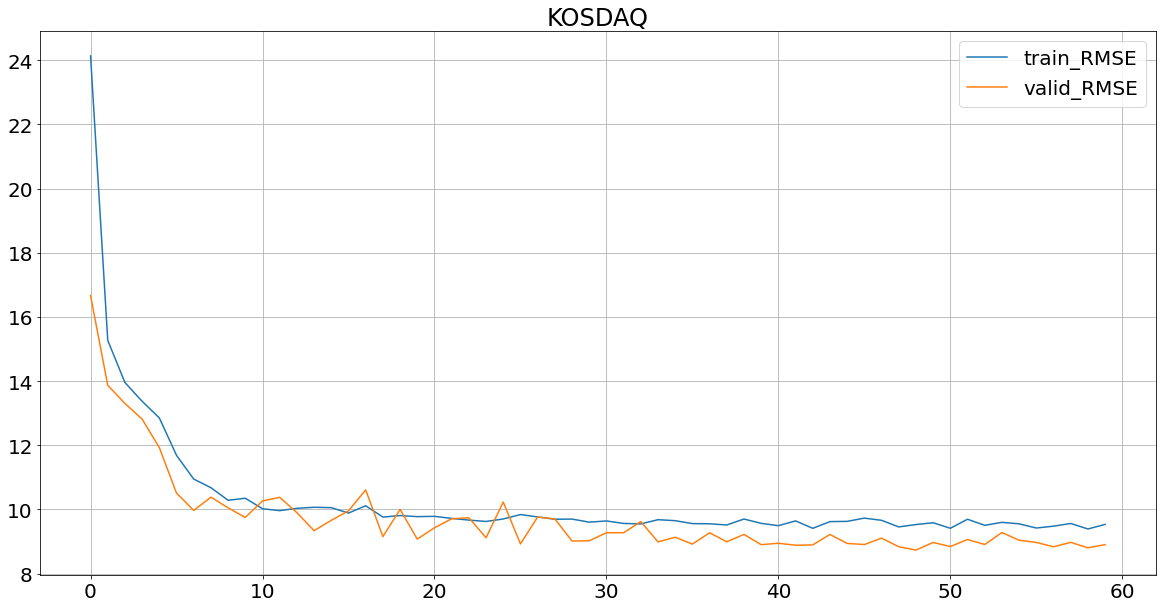

In [139]:
plot_loss('KOSDAQ',KOSDAQ_train_loss,KOSDAQ_valid_loss)

In [140]:
KOSPI200_test_loader = DataLoader(KOSPI200_test_set,batch_size=len(KOSPI200_test_set),num_workers=0)
SNP500_test_loader = DataLoader(SNP500_test_set,batch_size=len(SNP500_test_set),num_workers=0)
KOSDAQ_test_loader = DataLoader(KOSDAQ_test_set,batch_size=len(KOSDAQ_test_set),num_workers=0)
NASDAQ_test_loader = DataLoader(NASDAQ_test_set,batch_size=len(NASDAQ_test_set),num_workers=0)
USTECH100_test_loader = DataLoader(USTECH100_test_set,batch_size=len(USTECH100_test_set),num_workers=0)
HANGSENG_test_loader = DataLoader(HANGSENG_test_set,batch_size=len(HANGSENG_test_set),num_workers=0)

In [141]:
def eval_model(name,loader):
    CNN_GRU_pred = []
    for i in range(5):
        device = ('cuda' if torch.cuda.is_available() else 'cpu')
        model = torch.load(f'./{name}_CNN2GRU_{i}.pt')
        model.to(device)
        model.eval()
        with torch.no_grad():
            for data,label in loader:
                data,label = data.to(device).float(),label.to(device)  
                pred = model(data).detach().cpu()
                CNN_GRU_pred.append(pred)
    pred = np.array((CNN_GRU_pred[0]+CNN_GRU_pred[1]+CNN_GRU_pred[2]+CNN_GRU_pred[3]+CNN_GRU_pred[4])/5)
    return pred
        
    
        

In [142]:
deep_KOSPI200_pred = eval_model('KOSPI200',KOSPI200_test_loader)
deep_SNP500_pred = eval_model('SNP500',SNP500_test_loader)
deep_KOSDAQ_pred = eval_model('KOSDAQ',KOSDAQ_test_loader)
deep_NASDAQ_pred = eval_model('NASDAQ',NASDAQ_test_loader)
deep_USTECH100_pred = eval_model('USTECH100',USTECH100_test_loader)
deep_HANGSENG_pred = eval_model('HANGSENG',HANGSENG_test_loader)

In [151]:
Deep_KOSPI200_pred = make_datetime(deep_KOSPI200_pred)
Deep_SNP500_pred = make_datetime(deep_SNP500_pred)
Deep_KOSDAQ_pred = make_datetime(deep_KOSDAQ_pred)
Deep_NASDAQ_pred = make_datetime(deep_NASDAQ_pred)
# Deep_KOSPI200_pred = make_datetime(deep_KOSPI200_pred)
# Deep_KOSPI200_pred = make_datetime(deep_KOSPI200_pred)

In [152]:
KOSPI200_ensemble = (Deep_KOSPI200_pred+ML_KOSPI200_pred)/2
SNP500_ensemble = (Deep_SNP500_pred+ML_SNP500_pred)/2
KOSDAQ_ensemble = (Deep_KOSDAQ_pred+ML_KOSDAQ_pred)/2
NASDAQ_ensemble = (Deep_NASDAQ_pred+ML_NASDAQ_pred)/2

In [146]:
def final_plot_result(real_indices,pred):
    plt.figure(figsize=(20,10))
    plt.rc('font',size=20)
    plt.plot(pred,ls='-.',label='prediction_Indices',color='black')
    plt.plot(real_indices,label='real_Indices',color='red')
    plt.legend()
    return plt.show()

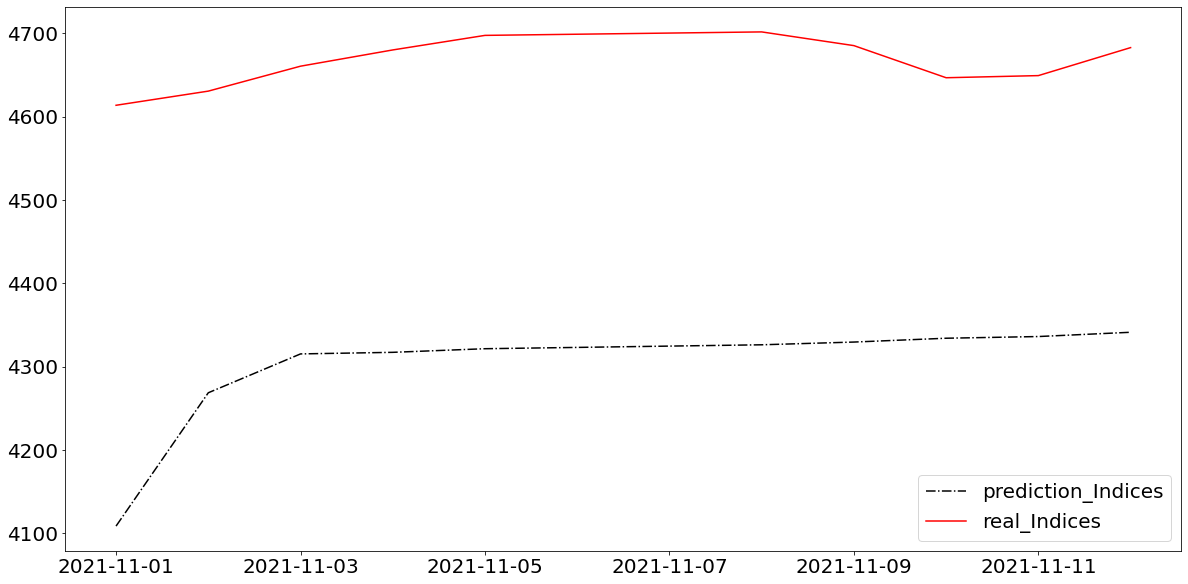

In [160]:
final_plot_result(real_SNP500,Deep_SNP500_pred)

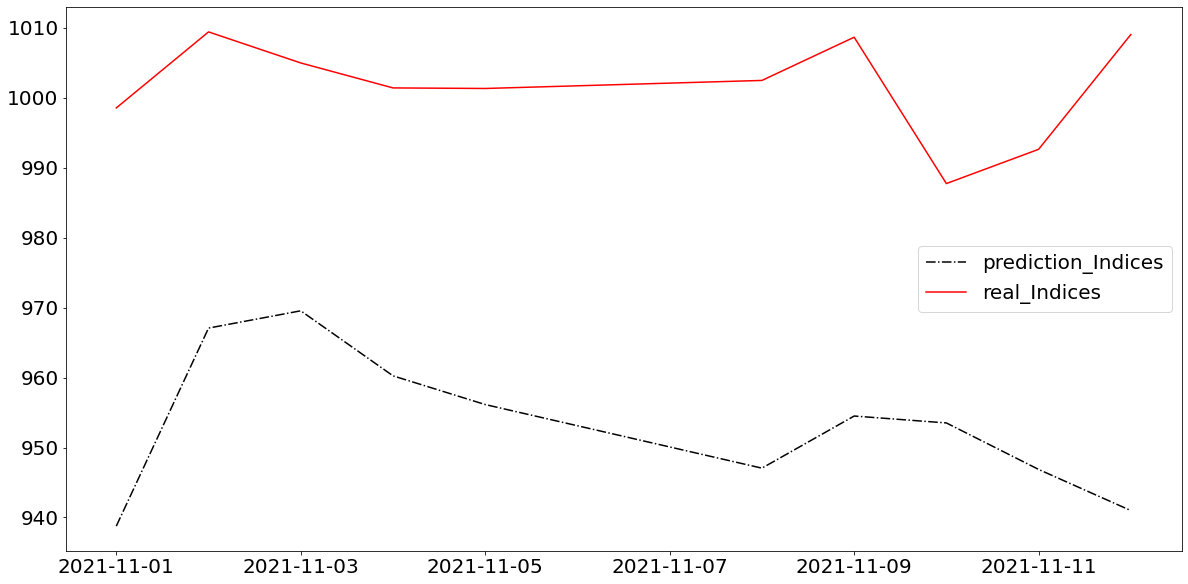

In [163]:
final_plot_result(real_KOSDAQ,KOSDAQ_ensemble)

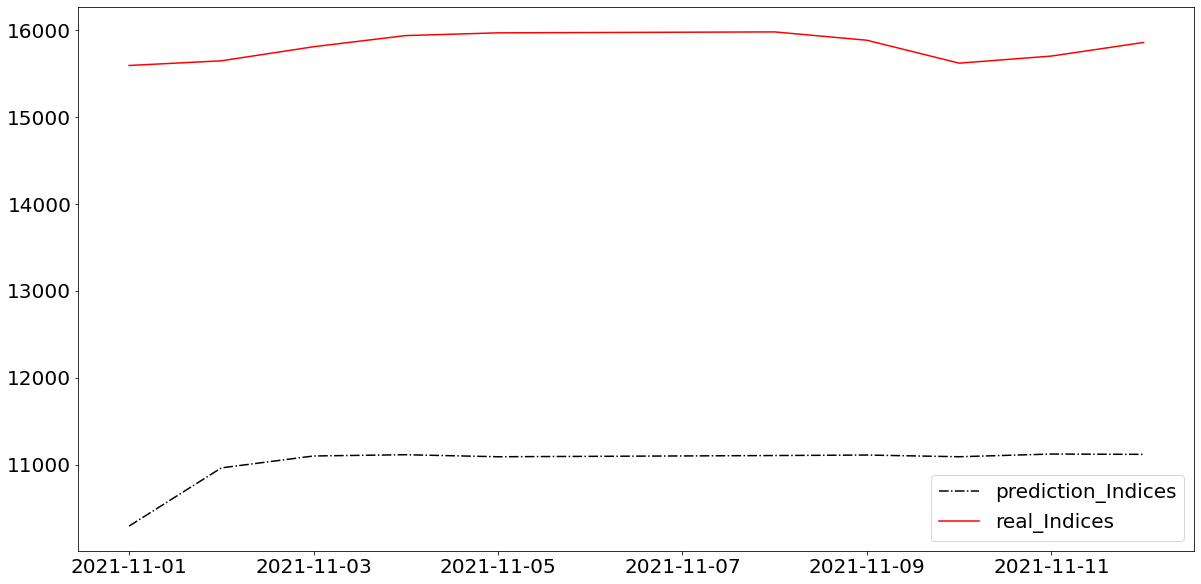

In [161]:
final_plot_result(real_NASDAQ,NASDAQ_ensemble)

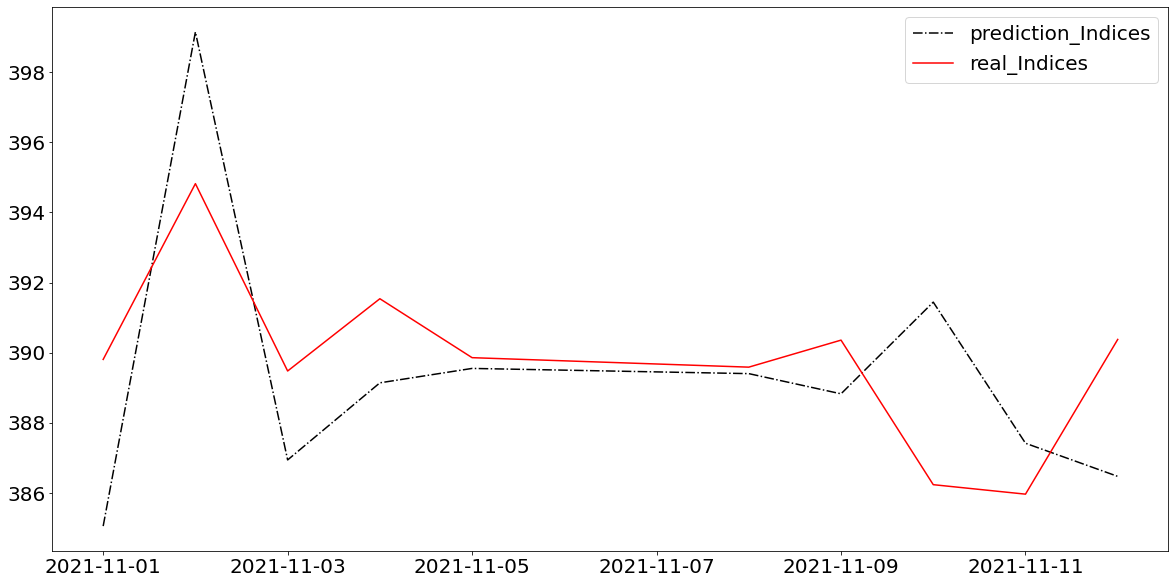

In [164]:
final_plot_result(real_KOSPI200,KOSPI200_ensemble)

In [150]:
def plot_real_n_pred(first_data,real_data,ensemble_data):
    train = first_data[:-10]
    test = first_data[-10:]
    plt.figure(figsize=(20,10))
    plt.title('KOSPI200_Prediction')
    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Indices',fontsize=12)
    plt.plot(train['Close'],label='train_close',color='blue')
    plt.plot(test['Close'],label='test_close',color='yellow')
    plt.plot(real_data['Close'],label='Real_Close',color='green')
    plt.plot(ensemble_data,label='pred_close',color='black')
    plt.legend()
    plt.grid()
    return plt.show()
    

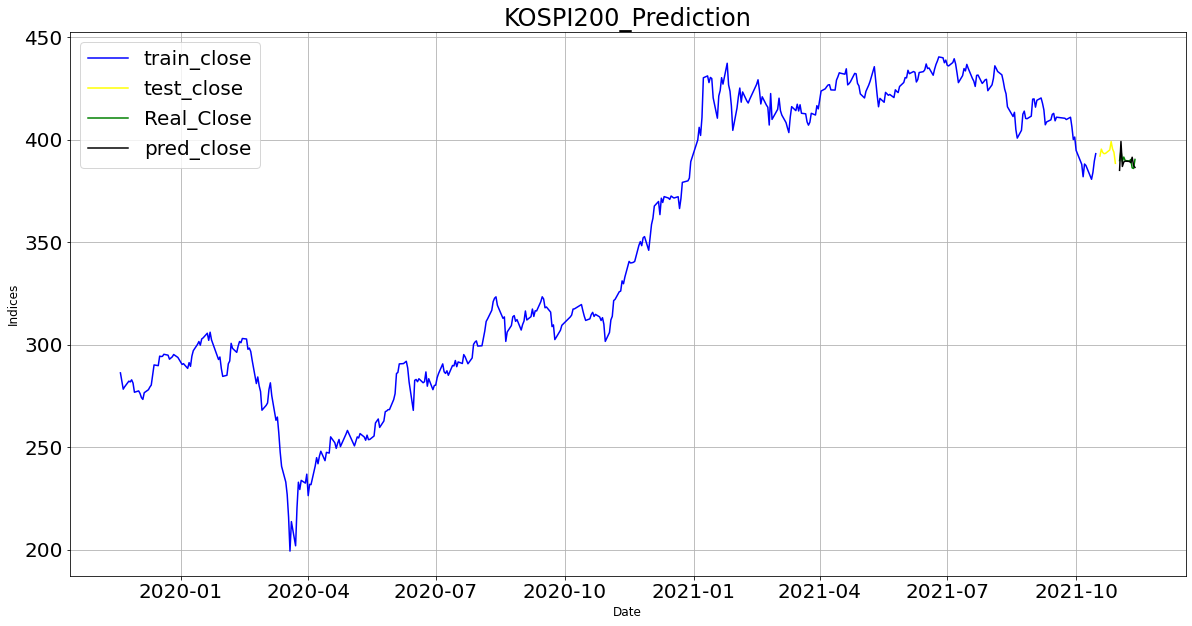

In [171]:
plot_real_n_pred(KOSPI200[2200:],real_KOSPI200,KOSPI200_ensemble)